# Importing packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt
from datetime import datetime
from fbprophet import Prophet

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.cluster import KMeans 
from sklearn.pipeline import make_pipeline

from sklearn.preprocessing import normalize
from sklearn.metrics import classification_report
from scipy.cluster.hierarchy import linkage, dendrogram 

import sys
sys.path.append('/mnt/home/roopa.sondur_outlook/custom-packages/python3')
import stockstats
from stockstats import StockDataFrame as Sdf

from nsepy import get_history
from datetime import date

import Technical_Indicators_v4 as ti

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

#import random
#random.seed(7)

# PORTFOLIO CREATION

### Importing pandas_datareader and fix_yahoo_finance packages to download financial data from yahoo finance

In [2]:
from pandas_datareader import data as pdr

""" Yahoo! finance has decommissioned their historical data API, causing many programs that relied on it to stop working.
fix-yahoo-finance offers a temporary fix to the problem by scraping the data from Yahoo! finance and returns a 
Pandas DataFrame/Panel in the same format as pandas_datareader's get_data_yahoo() """

import fix_yahoo_finance as yf

""" Changing the functionality/implementation of pandas_datareader's get_data_yahoo() method 
of superclass by overriding in the subclass """

yf.pdr_override() 

### ind_nifty50list.csv contains the list of stocks for NIFTY50 index

In [3]:
df = pd.read_csv ('ind_nifty50list.csv')

# Sector-wise sorted list of stocks 
df.sort_values(by='Industry')

Company Name                  Industry  \
18                            Hero MotoCorp Ltd.                AUTOMOBILE   
14                            Eicher Motors Ltd.                AUTOMOBILE   
41                              Tata Motors Ltd.                AUTOMOBILE   
10                                    Bosch Ltd.                AUTOMOBILE   
33                      Maruti Suzuki India Ltd.                AUTOMOBILE   
5                                Bajaj Auto Ltd.                AUTOMOBILE   
32                      Mahindra & Mahindra Ltd.                AUTOMOBILE   
45                         UltraTech Cement Ltd.  CEMENT & CEMENT PRODUCTS   
1                            Ambuja Cements Ltd.  CEMENT & CEMENT PRODUCTS   
30                          Larsen & Toubro Ltd.              CONSTRUCTION   
2                              Asian Paints Ltd.            CONSUMER GOODS   
23                                    I T C Ltd.            CONSUMER GOODS   
21                       Hindustan Unilever Ltd.            CONSUMER GOODS   
20          Hindustan Petroleum Corporation Ltd.                    ENERGY   
34                                     NTPC Ltd.                    ENERGY   
26                   Indian Oil Corporation Ltd.                    ENERGY   
37                      Reliance Industries Ltd.                    ENERGY   
35            Oil & Natural Gas Corporation Ltd.                    ENERGY   
36          Power Grid Corporation of India Ltd.                    ENERGY   
15                             GAIL (India) Ltd.                    ENERGY   
7              Bharat Petroleum Corporation Ltd.                    ENERGY   
44                                      UPL Ltd.  FERTILISERS & PESTICIDES   
38                           State Bank of India        FINANCIAL SERVICES   
4                                 Axis Bank Ltd.        FINANCIAL SERVICES   
6                             Bajaj Finance Ltd.        FINANCIAL SERVICES   
29                      Kotak Mahindra Bank Ltd.        FINANCIAL SERVICES   
17                                HDFC Bank Ltd.        FINANCIAL SERVICES   
27                            IndusInd Bank Ltd.        FINANCIAL SERVICES   
25               Indiabulls Housing Finance Ltd.        FINANCIAL SERVICES   
48                                 Yes Bank Ltd.        FINANCIAL SERVICES   
22  Housing Development Finance Corporation Ltd.        FINANCIAL SERVICES   
24                               ICICI Bank Ltd.        FINANCIAL SERVICES   
28                                  Infosys Ltd.                        IT   
40                Tata Consultancy Services Ltd.                        IT   
16                         HCL Technologies Ltd.                        IT   
47                                    Wipro Ltd.                        IT   
43                            Tech Mahindra Ltd.                        IT   
49            Zee Entertainment Enterprises Ltd.     MEDIA & ENTERTAINMENT   
19                      Hindalco Industries Ltd.                    METALS   
12                               Coal India Ltd.                    METALS   
42                               Tata Steel Ltd.                    METALS   
46                                  Vedanta Ltd.                    METALS   
39            Sun Pharmaceutical Industries Ltd.                    PHARMA   
13                 Dr. Reddy's Laboratories Ltd.                    PHARMA   
11                                    Cipla Ltd.                    PHARMA   
3                          Aurobindo Pharma Ltd.                    PHARMA   
31                                    Lupin Ltd.                    PHARMA   
0     Adani Ports and Special Economic Zone Ltd.                  SERVICES   
9                           Bharti Infratel Ltd.                   TELECOM   
8                             Bharti Airtel Ltd.                   TELECOM   

        Symbol Series     ISIN Code  
18  HEROMOTOCO     

### For yahoo data source adding .NS for NSE stock exchange prices 

In [4]:
list_stocks = df['Symbol'].values

tickers  =  []
for ticker in list_stocks:
    tickers = tickers +  [ticker + '.NS']
tickers

['ADANIPORTS.NS',
 'AMBUJACEM.NS',
 'ASIANPAINT.NS',
 'AUROPHARMA.NS',
 'AXISBANK.NS',
 'BAJAJ-AUTO.NS',
 'BAJFINANCE.NS',
 'BPCL.NS',
 'BHARTIARTL.NS',
 'INFRATEL.NS',
 'BOSCHLTD.NS',
 'CIPLA.NS',
 'COALINDIA.NS',
 'DRREDDY.NS',
 'EICHERMOT.NS',
 'GAIL.NS',
 'HCLTECH.NS',
 'HDFCBANK.NS',
 'HEROMOTOCO.NS',
 'HINDALCO.NS',
 'HINDPETRO.NS',
 'HINDUNILVR.NS',
 'HDFC.NS',
 'ITC.NS',
 'ICICIBANK.NS',
 'IBULHSGFIN.NS',
 'IOC.NS',
 'INDUSINDBK.NS',
 'INFY.NS',
 'KOTAKBANK.NS',
 'LT.NS',
 'LUPIN.NS',
 'M&M.NS',
 'MARUTI.NS',
 'NTPC.NS',
 'ONGC.NS',
 'POWERGRID.NS',
 'RELIANCE.NS',
 'SBIN.NS',
 'SUNPHARMA.NS',
 'TCS.NS',
 'TATAMOTORS.NS',
 'TATASTEEL.NS',
 'TECHM.NS',
 'UPL.NS',
 'ULTRACEMCO.NS',
 'VEDL.NS',
 'WIPRO.NS',
 'YESBANK.NS',
 'ZEEL.NS']

In [ ]:
""" Taking 5 years historic data for creating clusters based on daily-returns of stocks for NIFTY50 """

# Date format is 'yyyy-mm-dd'

start_date = '2013-01-01' 
end_date = '2018-01-01' 

In [ ]:
panel_data =  pdr.get_data_yahoo(tickers, start_date, end_date)

[*********************100%***********************]  50 of 50 downloaded


In [ ]:
panel_data

<class 'pandas.core.panel.Panel'>
Dimensions: 6 (items) x 1233 (major_axis) x 50 (minor_axis)
Items axis: Open to Volume
Major_axis axis: 2013-01-01 00:00:00 to 2018-01-01 00:00:00
Minor_axis axis: ADANIPORTS.NS to ZEEL.NS

### Getting the 'Adjusted Close' prices and creating a dataframe

In [ ]:
adj_close = panel_data.loc['Adj Close']
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     393.388977      91.947716   
2013-01-02     135.441299    186.749207     388.844116      95.868973   
2013-01-03     135.294571    188.760681     391.045349      96.106636   
2013-01-04     134.511963    188.440704     391.516754      95.845215   
2013-01-07     137.006561    186.383499     390.836365      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01  1168.437134            NaN     101.747940     312.294800   
2013-01-02   237.828903            NaN     100.630241     311.276733   
2013-01-03  1191.802490            NaN     103.339737     318.015167   
2013-01-04   236.474152            NaN     103.388054     317.045593   
2013-01-07   235.428085            NaN     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

In [ ]:
# Check for missing values
print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS      0
AMBUJACEM.NS       0
ASIANPAINT.NS      0
AUROPHARMA.NS      0
AXISBANK.NS       58
BAJAJ-AUTO.NS    493
BAJFINANCE.NS      0
BHARTIARTL.NS      0
BOSCHLTD.NS        0
BPCL.NS            0
CIPLA.NS           0
COALINDIA.NS       0
DRREDDY.NS         0
EICHERMOT.NS       0
GAIL.NS            0
HCLTECH.NS         0
HDFC.NS            0
HDFCBANK.NS        0
HEROMOTOCO.NS      0
HINDALCO.NS        0
HINDPETRO.NS       0
HINDUNILVR.NS      0
IBULHSGFIN.NS    140
ICICIBANK.NS       0
INDUSINDBK.NS      0
INFRATEL.NS        0
INFY.NS            0
IOC.NS             0
ITC.NS             0
KOTAKBANK.NS       0
LT.NS              0
LUPIN.NS           0
M&M.NS             0
MARUTI.NS          0
NTPC.NS            0
ONGC.NS            0
POWERGRID.NS       0
RELIANCE.NS        0
SBIN.NS           18
SUNPHARMA.NS       0
TATAMOTORS.NS      0
TATASTEEL.NS       0
TCS.NS             0
TECHM.NS           0
ULTRACEMCO.NS      0
UPL.NS       

### Filling the missing data with the forward and backward fill methods

In [ ]:
# Forward fill
adj_close = adj_close.fillna(method='ffill')

# Backward fill
adj_close = adj_close.fillna(method = 'bfill')

In [ ]:
# Check for missing values
print('Number of missing values across columns:\n', adj_close.isnull().sum())

Number of missing values across columns:
 ADANIPORTS.NS    0
AMBUJACEM.NS     0
ASIANPAINT.NS    0
AUROPHARMA.NS    0
AXISBANK.NS      0
BAJAJ-AUTO.NS    0
BAJFINANCE.NS    0
BHARTIARTL.NS    0
BOSCHLTD.NS      0
BPCL.NS          0
CIPLA.NS         0
COALINDIA.NS     0
DRREDDY.NS       0
EICHERMOT.NS     0
GAIL.NS          0
HCLTECH.NS       0
HDFC.NS          0
HDFCBANK.NS      0
HEROMOTOCO.NS    0
HINDALCO.NS      0
HINDPETRO.NS     0
HINDUNILVR.NS    0
IBULHSGFIN.NS    0
ICICIBANK.NS     0
INDUSINDBK.NS    0
INFRATEL.NS      0
INFY.NS          0
IOC.NS           0
ITC.NS           0
KOTAKBANK.NS     0
LT.NS            0
LUPIN.NS         0
M&M.NS           0
MARUTI.NS        0
NTPC.NS          0
ONGC.NS          0
POWERGRID.NS     0
RELIANCE.NS      0
SBIN.NS          0
SUNPHARMA.NS     0
TATAMOTORS.NS    0
TATASTEEL.NS     0
TCS.NS           0
TECHM.NS         0
ULTRACEMCO.NS    0
UPL.NS           0
VEDL.NS          0
WIPRO.NS         0
YESBANK.NS       0
ZEEL.NS          0
dtype: i

In [ ]:
adj_close.to_csv('stocks_adj_close.csv')
adj_close.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01     134.805450    184.509155     393.388977      91.947716   
2013-01-02     135.441299    186.749207     388.844116      95.868973   
2013-01-03     135.294571    188.760681     391.045349      96.106636   
2013-01-04     134.511963    188.440704     391.516754      95.845215   
2013-01-07     137.006561    186.383499     390.836365      95.821457   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01  1168.437134    2300.317871     101.747940     312.294800   
2013-01-02   237.828903    2300.317871     100.630241     311.276733   
2013-01-03  1191.802490    2300.317871     103.339737     318.015167   
2013-01-04   236.474152    2300.317871     103.388054     317.045593   
2013-01-07   235.428085    2300.317871     103.235405     316.851685   

            BOSCHLTD.NS    BPCL.NS     ...      TATAMOTORS.NS  TATASTEEL.NS  \
Date                                   ...                                    
2013-01-01  9097.167969  75.284569     ...         309.782898    368.073029   
2013-01-02  9182.201172  77.429001     ...         311.004669    368.031586   
2013-01-03  9117.710938  77.386528     ...         311.102509    371.516693   
2013-01-04  9056.904297  79.024475     ...         308.462219    364.125061   
2013-01-07  9040.283203  81.454163     ...         306.359711    370.341492   

                TCS.NS    TECHM.NS  ULTRACEMCO.NS      UPL.NS     VEDL.NS  \
Date                                                                        
2013-01-01  520.680603  207.830673    1989.694824  125.031273  158.064438   
2013-01-02  520.330505  209.176956    2001.941284  124.370239  161.486786   
2013-01-03  527.456116  209.543823    1991.711304  129.186417  162.680618   
2013-01-04  535.117126  209.800262    2008.482422  128.336487  160.531693   
2013-01-07  533.325439  206.360641    2007.301880  129.611343  161.287842   

              WIPRO.NS  YESBANK.NS     ZEEL.NS  
Date                                            
2013-01-01  168.577484   71.661201  215.358032  
2013-01-02  167.239594   73.291229  222.878937  
2013-01-03  168.959763   73.944748  222.927155  
2013-01-04  171.444412   73.471512  218.925644  
2013-01-07  171.996628   74.853645  215.261612  

[5 rows x 50 columns]

### Caluclating daily-returns 

In [ ]:
daily_returns = pd.DataFrame()

In [ ]:
daily_returns = adj_close.pct_change()
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01            NaN           NaN            NaN            NaN   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01          NaN            NaN            NaN            NaN   
2013-01-02    -0.796456            0.0      -0.010985      -0.003260   
2013-01-03     4.011176            0.0       0.026925       0.021648   
2013-01-04    -0.801583            0.0       0.000468      -0.003049   
2013-01-07    -0.004424            0.0      -0.001476      -0.000612   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
Date                                 ...                                   
2013-01-01          NaN       NaN    ...               NaN           NaN   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-07    -0.001835  0.030746    ...         -0.006816      0.017072   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
Date                                                                          
2013-01-01       NaN       NaN            NaN       NaN       NaN       NaN   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-07 -0.003348 -0.016395      -0.000588  0.009934  0.004710  0.003221   

            YESBANK.NS   ZEEL.NS  
Date                              
2013-01-01         NaN       NaN  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-07    0.018812 -0.016736  

[5 rows x 50 columns]

### Replace all the NaNs in the first row with zero (as there is no previous value to calculate daily-returns)

In [ ]:
daily_returns.iloc[0, :] = 0
daily_returns.head()

ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
Date                                                                    
2013-01-01       0.000000      0.000000       0.000000       0.000000   
2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2013-01-03      -0.001083      0.010771       0.005661       0.002479   
2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

            AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  \
Date                                                                   
2013-01-01     0.000000            0.0       0.000000       0.000000   
2013-01-02    -0.796456            0.0      -0.010985      -0.003260   
2013-01-03     4.011176            0.0       0.026925       0.021648   
2013-01-04    -0.801583            0.0       0.000468      -0.003049   
2013-01-07    -0.004424            0.0      -0.001476      -0.000612   

            BOSCHLTD.NS   BPCL.NS    ...     TATAMOTORS.NS  TATASTEEL.NS  \
Date                                 ...                                   
2013-01-01     0.000000  0.000000    ...          0.000000      0.000000   
2013-01-02     0.009347  0.028484    ...          0.003944     -0.000113   
2013-01-03    -0.007023 -0.000549    ...          0.000315      0.009470   
2013-01-04    -0.006669  0.021166    ...         -0.008487     -0.019896   
2013-01-07    -0.001835  0.030746    ...         -0.006816      0.017072   

              TCS.NS  TECHM.NS  ULTRACEMCO.NS    UPL.NS   VEDL.NS  WIPRO.NS  \
Date                                                                          
2013-01-01  0.000000  0.000000       0.000000  0.000000  0.000000  0.000000   
2013-01-02 -0.000672  0.006478       0.006155 -0.005287  0.021652 -0.007936   
2013-01-03  0.013694  0.001754      -0.005110  0.038725  0.007393  0.010286   
2013-01-04  0.014524  0.001224       0.008420 -0.006579 -0.013209  0.014706   
2013-01-07 -0.003348 -0.016395      -0.000588  0.009934  0.004710  0.003221   

            YESBANK.NS   ZEEL.NS  
Date                              
2013-01-01    0.000000  0.000000  
2013-01-02    0.022746  0.034923  
2013-01-03    0.008917  0.000216  
2013-01-04   -0.006400 -0.017950  
2013-01-07    0.018812 -0.016736  

[5 rows x 50 columns]

In [ ]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

Date  ADANIPORTS.NS  AMBUJACEM.NS  ASIANPAINT.NS  AUROPHARMA.NS  \
0 2013-01-01       0.000000      0.000000       0.000000       0.000000   
1 2013-01-02       0.004717      0.012141      -0.011553       0.042647   
2 2013-01-03      -0.001083      0.010771       0.005661       0.002479   
3 2013-01-04      -0.005784     -0.001695       0.001205      -0.002720   
4 2013-01-07       0.018546     -0.010917      -0.001738      -0.000248   

   AXISBANK.NS  BAJAJ-AUTO.NS  BAJFINANCE.NS  BHARTIARTL.NS  BOSCHLTD.NS  \
0     0.000000            0.0       0.000000       0.000000     0.000000   
1    -0.796456            0.0      -0.010985      -0.003260     0.009347   
2     4.011176            0.0       0.026925       0.021648    -0.007023   
3    -0.801583            0.0       0.000468      -0.003049    -0.006669   
4    -0.004424            0.0      -0.001476      -0.000612    -0.001835   

     ...     TATAMOTORS.NS  TATASTEEL.NS    TCS.NS  TECHM.NS  ULTRACEMCO.NS  \
0    ...          0.000000      0.000000  0.000000  0.000000       0.000000   
1    ...          0.003944     -0.000113 -0.000672  0.006478       0.006155   
2    ...          0.000315      0.009470  0.013694  0.001754      -0.005110   
3    ...         -0.008487     -0.019896  0.014524  0.001224       0.008420   
4    ...         -0.006816      0.017072 -0.003348 -0.016395      -0.000588   

     UPL.NS   VEDL.NS  WIPRO.NS  YESBANK.NS   ZEEL.NS  
0  0.000000  0.000000  0.000000    0.000000  0.000000  
1 -0.005287  0.021652 -0.007936    0.022746  0.034923  
2  0.038725  0.007393  0.010286    0.008917  0.000216  
3 -0.006579 -0.013209  0.014706   -0.006400 -0.017950  
4  0.009934  0.004710  0.003221    0.018812 -0.016736  

[5 rows x 51 columns]

In [ ]:
daily_returns = daily_returns.T
daily_returns.head()

0                    1                    2     \
Date           2013-01-01 00:00:00  2013-01-02 00:00:00  2013-01-03 00:00:00   
ADANIPORTS.NS                    0           0.00471679          -0.00108333   
AMBUJACEM.NS                     0            0.0121406             0.010771   
ASIANPAINT.NS                    0           -0.0115531           0.00566097   
AUROPHARMA.NS                    0            0.0426466           0.00247904   

                              3                    4                    5     \
Date           2013-01-04 00:00:00  2013-01-07 00:00:00  2013-01-08 00:00:00   
ADANIPORTS.NS          -0.00578447            0.0185455           -0.0185649   
AMBUJACEM.NS           -0.00169515            -0.010917          -0.00907528   
ASIANPAINT.NS            0.0012055          -0.00173783          -5.6768e-05   
AUROPHARMA.NS          -0.00272011         -0.000247879          -0.00446434   

                              6                    7                    8     \
Date           2013-01-09 00:00:00  2013-01-10 00:00:00  2013-01-11 00:00:00   
ADANIPORTS.NS           -0.0167334           0.00480974           -0.0301915   
AMBUJACEM.NS            -0.0247525           -0.0266497           -0.0279009   
ASIANPAINT.NS          -0.00681599          -0.00033242           -0.0144978   
AUROPHARMA.NS           -0.0209268           -0.0287531           -0.0332722   

                              9            ...                          1223  \
Date           2013-01-14 00:00:00         ...           2017-12-18 00:00:00   
ADANIPORTS.NS            0.0349278         ...                    0.00809767   
AMBUJACEM.NS             0.0195815         ...                   -0.00151284   
ASIANPAINT.NS             0.015374         ...                     0.0164924   
AUROPHARMA.NS            0.0409214         ...                    0.00674051   

                              1224                 1225                 1226  \
Date           2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
ADANIPORTS.NS           0.00296585          -0.00344996          -0.00519289   
AMBUJACEM.NS             0.0251893           -0.0118233           0.00429979   
ASIANPAINT.NS          0.000483601          -0.00193368           0.00211363   
AUROPHARMA.NS            0.0200863           0.00313592          -0.00581602   

                              1227                 1228                 1229  \
Date           2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
ADANIPORTS.NS         -0.000372841           0.00596791           -0.0008651   
AMBUJACEM.NS           -0.00372301            0.0213005          -0.00731797   
ASIANPAINT.NS          8.78601e-05            0.0112039          -0.00147725   
AUROPHARMA.NS          -0.00358319           0.00352266            0.0103115   

                              1230                 1231                 1232  
Date           2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
ADANIPORTS.NS           -0.0136071            0.0174316           -0.0147911  
AMBUJACEM.NS            0.00110574           0.00165684           -0.0147032  
ASIANPAINT.NS          -0.00404684            0.0123208           -0.0128183  
AUROPHARMA.NS           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1233 columns]

In [ ]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

index                    0                    1  \
0           Date  2013-01-01 00:00:00  2013-01-02 00:00:00   
1  ADANIPORTS.NS                    0           0.00471679   
2   AMBUJACEM.NS                    0            0.0121406   
3  ASIANPAINT.NS                    0           -0.0115531   
4  AUROPHARMA.NS                    0            0.0426466   

                     2                    3                    4  \
0  2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00   
1          -0.00108333          -0.00578447            0.0185455   
2             0.010771          -0.00169515            -0.010917   
3           0.00566097            0.0012055          -0.00173783   
4           0.00247904          -0.00272011         -0.000247879   

                     5                    6                    7  \
0  2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00   
1           -0.0185649           -0.0167334           0.00480974   
2          -0.00907528           -0.0247525           -0.0266497   
3          -5.6768e-05          -0.00681599          -0.00033242   
4          -0.00446434           -0.0209268           -0.0287531   

                     8         ...                          1223  \
0  2013-01-11 00:00:00         ...           2017-12-18 00:00:00   
1           -0.0301915         ...                    0.00809767   
2           -0.0279009         ...                   -0.00151284   
3           -0.0144978         ...                     0.0164924   
4           -0.0332722         ...                    0.00674051   

                  1224                 1225                 1226  \
0  2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
1           0.00296585          -0.00344996          -0.00519289   
2            0.0251893           -0.0118233           0.00429979   
3          0.000483601          -0.00193368           0.00211363   
4            0.0200863           0.00313592          -0.00581602   

                  1227                 1228                 1229  \
0  2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
1         -0.000372841           0.00596791           -0.0008651   
2          -0.00372301            0.0213005          -0.00731797   
3          8.78601e-05            0.0112039          -0.00147725   
4          -0.00358319           0.00352266            0.0103115   

                  1230                 1231                 1232  
0  2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
1           -0.0136071            0.0174316           -0.0147911  
2           0.00110574           0.00165684           -0.0147032  
3          -0.00404684            0.0123208           -0.0128183  
4           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1234 columns]

In [ ]:
column_names = daily_returns.iloc[0]
#column_names

In [ ]:
daily_returns = daily_returns.rename(columns=column_names)
daily_returns.head()

Date  2013-01-01 00:00:00  2013-01-02 00:00:00  \
0           Date  2013-01-01 00:00:00  2013-01-02 00:00:00   
1  ADANIPORTS.NS                    0           0.00471679   
2   AMBUJACEM.NS                    0            0.0121406   
3  ASIANPAINT.NS                    0           -0.0115531   
4  AUROPHARMA.NS                    0            0.0426466   

   2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00  \
0  2013-01-03 00:00:00  2013-01-04 00:00:00  2013-01-07 00:00:00   
1          -0.00108333          -0.00578447            0.0185455   
2             0.010771          -0.00169515            -0.010917   
3           0.00566097            0.0012055          -0.00173783   
4           0.00247904          -0.00272011         -0.000247879   

   2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00  \
0  2013-01-08 00:00:00  2013-01-09 00:00:00  2013-01-10 00:00:00   
1           -0.0185649           -0.0167334           0.00480974   
2          -0.00907528           -0.0247525           -0.0266497   
3          -5.6768e-05          -0.00681599          -0.00033242   
4          -0.00446434           -0.0209268           -0.0287531   

   2013-01-11 00:00:00         ...           2017-12-18 00:00:00  \
0  2013-01-11 00:00:00         ...           2017-12-18 00:00:00   
1           -0.0301915         ...                    0.00809767   
2           -0.0279009         ...                   -0.00151284   
3           -0.0144978         ...                     0.0164924   
4           -0.0332722         ...                    0.00674051   

   2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00  \
0  2017-12-19 00:00:00  2017-12-20 00:00:00  2017-12-21 00:00:00   
1           0.00296585          -0.00344996          -0.00519289   
2            0.0251893           -0.0118233           0.00429979   
3          0.000483601          -0.00193368           0.00211363   
4            0.0200863           0.00313592          -0.00581602   

   2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00  \
0  2017-12-22 00:00:00  2017-12-26 00:00:00  2017-12-27 00:00:00   
1         -0.000372841           0.00596791           -0.0008651   
2          -0.00372301            0.0213005          -0.00731797   
3          8.78601e-05            0.0112039          -0.00147725   
4          -0.00358319           0.00352266            0.0103115   

   2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
0  2017-12-28 00:00:00  2017-12-29 00:00:00  2018-01-01 00:00:00  
1           -0.0136071            0.0174316           -0.0147911  
2           0.00110574           0.00165684           -0.0147032  
3          -0.00404684            0.0123208           -0.0128183  
4           -0.0106405           0.00665786          -0.00581441  

[5 rows x 1234 columns]

In [ ]:
daily_returns = daily_returns.drop(daily_returns.index[[0]])
daily_returns.head()

Date 2013-01-01 00:00:00 2013-01-02 00:00:00 2013-01-03 00:00:00  \
1  ADANIPORTS.NS                   0          0.00471679         -0.00108333   
2   AMBUJACEM.NS                   0           0.0121406            0.010771   
3  ASIANPAINT.NS                   0          -0.0115531          0.00566097   
4  AUROPHARMA.NS                   0           0.0426466          0.00247904   
5    AXISBANK.NS                   0           -0.796456             4.01118   

  2013-01-04 00:00:00 2013-01-07 00:00:00 2013-01-08 00:00:00  \
1         -0.00578447           0.0185455          -0.0185649   
2         -0.00169515           -0.010917         -0.00907528   
3           0.0012055         -0.00173783         -5.6768e-05   
4         -0.00272011        -0.000247879         -0.00446434   
5           -0.801583          -0.0044236         -0.00914167   

  2013-01-09 00:00:00 2013-01-10 00:00:00 2013-01-11 00:00:00  \
1          -0.0167334          0.00480974          -0.0301915   
2          -0.0247525          -0.0266497          -0.0279009   
3         -0.00681599         -0.00033242          -0.0144978   
4          -0.0209268          -0.0287531          -0.0332722   
5             3.96085           0.0135961         -0.00285085   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
1         ...                  0.00809767          0.00296585   
2         ...                 -0.00151284           0.0251893   
3         ...                   0.0164924         0.000483601   
4         ...                  0.00674051           0.0200863   
5         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
1         -0.00344996         -0.00519289        -0.000372841   
2          -0.0118233          0.00429979         -0.00372301   
3         -0.00193368          0.00211363         8.78601e-05   
4          0.00313592         -0.00581602         -0.00358319   
5          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
1          0.00596791          -0.0008651          -0.0136071   
2           0.0213005         -0.00731797          0.00110574   
3           0.0112039         -0.00147725         -0.00404684   
4          0.00352266           0.0103115          -0.0106405   
5          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
1           0.0174316          -0.0147911  
2          0.00165684          -0.0147032  
3           0.0123208          -0.0128183  
4          0.00665786         -0.00581441  
5           0.0312701          0.00274845  

[5 rows x 1234 columns]

In [ ]:
daily_returns = daily_returns.reset_index()
daily_returns.head()

index           Date 2013-01-01 00:00:00 2013-01-02 00:00:00  \
0      1  ADANIPORTS.NS                   0          0.00471679   
1      2   AMBUJACEM.NS                   0           0.0121406   
2      3  ASIANPAINT.NS                   0          -0.0115531   
3      4  AUROPHARMA.NS                   0           0.0426466   
4      5    AXISBANK.NS                   0           -0.796456   

  2013-01-03 00:00:00 2013-01-04 00:00:00 2013-01-07 00:00:00  \
0         -0.00108333         -0.00578447           0.0185455   
1            0.010771         -0.00169515           -0.010917   
2          0.00566097           0.0012055         -0.00173783   
3          0.00247904         -0.00272011        -0.000247879   
4             4.01118           -0.801583          -0.0044236   

  2013-01-08 00:00:00 2013-01-09 00:00:00 2013-01-10 00:00:00  \
0          -0.0185649          -0.0167334          0.00480974   
1         -0.00907528          -0.0247525          -0.0266497   
2         -5.6768e-05         -0.00681599         -0.00033242   
3         -0.00446434          -0.0209268          -0.0287531   
4         -0.00914167             3.96085           0.0135961   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164924         0.000483601   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193368          0.00211363         8.78601e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147725         -0.00404684   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123208          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1235 columns]

In [ ]:
daily_returns.loc[:,'index'] = daily_returns.iloc[:,1] 

In [ ]:
daily_returns.head()

index           Date 2013-01-01 00:00:00 2013-01-02 00:00:00  \
0  ADANIPORTS.NS  ADANIPORTS.NS                   0          0.00471679   
1   AMBUJACEM.NS   AMBUJACEM.NS                   0           0.0121406   
2  ASIANPAINT.NS  ASIANPAINT.NS                   0          -0.0115531   
3  AUROPHARMA.NS  AUROPHARMA.NS                   0           0.0426466   
4    AXISBANK.NS    AXISBANK.NS                   0           -0.796456   

  2013-01-03 00:00:00 2013-01-04 00:00:00 2013-01-07 00:00:00  \
0         -0.00108333         -0.00578447           0.0185455   
1            0.010771         -0.00169515           -0.010917   
2          0.00566097           0.0012055         -0.00173783   
3          0.00247904         -0.00272011        -0.000247879   
4             4.01118           -0.801583          -0.0044236   

  2013-01-08 00:00:00 2013-01-09 00:00:00 2013-01-10 00:00:00  \
0          -0.0185649          -0.0167334          0.00480974   
1         -0.00907528          -0.0247525          -0.0266497   
2         -5.6768e-05         -0.00681599         -0.00033242   
3         -0.00446434          -0.0209268          -0.0287531   
4         -0.00914167             3.96085           0.0135961   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164924         0.000483601   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193368          0.00211363         8.78601e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147725         -0.00404684   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123208          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1235 columns]

In [ ]:
daily_returns = daily_returns.drop(daily_returns.columns[[1]], axis=1)
daily_returns.head()

index 2013-01-01 00:00:00 2013-01-02 00:00:00 2013-01-03 00:00:00  \
0  ADANIPORTS.NS                   0          0.00471679         -0.00108333   
1   AMBUJACEM.NS                   0           0.0121406            0.010771   
2  ASIANPAINT.NS                   0          -0.0115531          0.00566097   
3  AUROPHARMA.NS                   0           0.0426466          0.00247904   
4    AXISBANK.NS                   0           -0.796456             4.01118   

  2013-01-04 00:00:00 2013-01-07 00:00:00 2013-01-08 00:00:00  \
0         -0.00578447           0.0185455          -0.0185649   
1         -0.00169515           -0.010917         -0.00907528   
2           0.0012055         -0.00173783         -5.6768e-05   
3         -0.00272011        -0.000247879         -0.00446434   
4           -0.801583          -0.0044236         -0.00914167   

  2013-01-09 00:00:00 2013-01-10 00:00:00 2013-01-11 00:00:00  \
0          -0.0167334          0.00480974          -0.0301915   
1          -0.0247525          -0.0266497          -0.0279009   
2         -0.00681599         -0.00033242          -0.0144978   
3          -0.0209268          -0.0287531          -0.0332722   
4             3.96085           0.0135961         -0.00285085   

          ...         2017-12-18 00:00:00 2017-12-19 00:00:00  \
0         ...                  0.00809767          0.00296585   
1         ...                 -0.00151284           0.0251893   
2         ...                   0.0164924         0.000483601   
3         ...                  0.00674051           0.0200863   
4         ...                  0.00127751          0.00911328   

  2017-12-20 00:00:00 2017-12-21 00:00:00 2017-12-22 00:00:00  \
0         -0.00344996         -0.00519289        -0.000372841   
1          -0.0118233          0.00429979         -0.00372301   
2         -0.00193368          0.00211363         8.78601e-05   
3          0.00313592         -0.00581602         -0.00358319   
4          0.00153522           -0.010009          0.00847065   

  2017-12-26 00:00:00 2017-12-27 00:00:00 2017-12-28 00:00:00  \
0          0.00596791          -0.0008651          -0.0136071   
1           0.0213005         -0.00731797          0.00110574   
2           0.0112039         -0.00147725         -0.00404684   
3          0.00352266           0.0103115          -0.0106405   
4          0.00252895        -0.000720764           -0.013974   

  2017-12-29 00:00:00 2018-01-01 00:00:00  
0           0.0174316          -0.0147911  
1          0.00165684          -0.0147032  
2           0.0123208          -0.0128183  
3          0.00665786         -0.00581441  
4           0.0312701          0.00274845  

[5 rows x 1234 columns]

In [ ]:
companies = daily_returns['index']
companies

0     ADANIPORTS.NS
1      AMBUJACEM.NS
2     ASIANPAINT.NS
3     AUROPHARMA.NS
4       AXISBANK.NS
5     BAJAJ-AUTO.NS
6     BAJFINANCE.NS
7     BHARTIARTL.NS
8       BOSCHLTD.NS
9           BPCL.NS
10         CIPLA.NS
11     COALINDIA.NS
12       DRREDDY.NS
13     EICHERMOT.NS
14          GAIL.NS
15       HCLTECH.NS
16          HDFC.NS
17      HDFCBANK.NS
18    HEROMOTOCO.NS
19      HINDALCO.NS
20     HINDPETRO.NS
21    HINDUNILVR.NS
22    IBULHSGFIN.NS
23     ICICIBANK.NS
24    INDUSINDBK.NS
25      INFRATEL.NS
26          INFY.NS
27           IOC.NS
28           ITC.NS
29     KOTAKBANK.NS
30            LT.NS
31         LUPIN.NS
32           M&M.NS
33        MARUTI.NS
34          NTPC.NS
35          ONGC.NS
36     POWERGRID.NS
37      RELIANCE.NS
38          SBIN.NS
39     SUNPHARMA.NS
40    TATAMOTORS.NS
41     TATASTEEL.NS
42           TCS.NS
43         TECHM.NS
44    ULTRACEMCO.NS
45           UPL.NS
46          VEDL.NS
47         WIPRO.NS
48       YESBANK.NS
49          ZEEL.NS


In [ ]:
daily_returns = daily_returns.drop('index', axis=1)
daily_returns.head()

2013-01-01  2013-01-02  2013-01-03  2013-01-04   2013-01-07  2013-01-08  \
0          0  0.00471679 -0.00108333 -0.00578447    0.0185455  -0.0185649   
1          0   0.0121406    0.010771 -0.00169515    -0.010917 -0.00907528   
2          0  -0.0115531  0.00566097   0.0012055  -0.00173783 -5.6768e-05   
3          0   0.0426466  0.00247904 -0.00272011 -0.000247879 -0.00446434   
4          0   -0.796456     4.01118   -0.801583   -0.0044236 -0.00914167   

   2013-01-09  2013-01-10  2013-01-11 2013-01-14     ...      2017-12-18  \
0  -0.0167334  0.00480974  -0.0301915  0.0349278     ...      0.00809767   
1  -0.0247525  -0.0266497  -0.0279009  0.0195815     ...     -0.00151284   
2 -0.00681599 -0.00033242  -0.0144978   0.015374     ...       0.0164924   
3  -0.0209268  -0.0287531  -0.0332722  0.0409214     ...      0.00674051   
4     3.96085   0.0135961 -0.00285085  0.0161279     ...      0.00127751   

    2017-12-19  2017-12-20  2017-12-21   2017-12-22  2017-12-26   2017-12-27  \
0   0.00296585 -0.00344996 -0.00519289 -0.000372841  0.00596791   -0.0008651   
1    0.0251893  -0.0118233  0.00429979  -0.00372301   0.0213005  -0.00731797   
2  0.000483601 -0.00193368  0.00211363  8.78601e-05   0.0112039  -0.00147725   
3    0.0200863  0.00313592 -0.00581602  -0.00358319  0.00352266    0.0103115   
4   0.00911328  0.00153522   -0.010009   0.00847065  0.00252895 -0.000720764   

   2017-12-28  2017-12-29  2018-01-01  
0  -0.0136071   0.0174316  -0.0147911  
1  0.00110574  0.00165684  -0.0147032  
2 -0.00404684   0.0123208  -0.0128183  
3  -0.0106405  0.00665786 -0.00581441  
4   -0.013974   0.0312701  0.00274845  

[5 rows x 1233 columns]

In [ ]:
daily_returns.shape

(50, 1233)

### Data preparation for Unsupervised Learning 

### To create a diversified portfolio of stocks we will cluster them and then identify one stock from each cluster that is closest to the centroid of the respective cluster 

## CLUSTERING - based on ONLY daily returns of the stocks

In [ ]:
from sklearn import preprocessing
# normalize the data row-wise(sample-wise) for each stock's daily returns
dr_norm = preprocessing.normalize(daily_returns)
dr_norm

array([[ 0.        ,  0.00552943, -0.00126998, ..., -0.01595144,
         0.02043483, -0.01733937],
       [ 0.        ,  0.01962536,  0.01741137, ...,  0.00178744,
         0.00267829, -0.0237678 ],
       [ 0.        , -0.01986233,  0.00973245, ..., -0.00695742,
         0.02118226, -0.02203746],
       ...,
       [ 0.        , -0.01501664,  0.01946185, ...,  0.0086399 ,
         0.03839567,  0.01384835],
       [ 0.        ,  0.02568903,  0.01007031, ..., -0.00591291,
         0.00594403, -0.00913817],
       [ 0.        ,  0.05257221,  0.00032568, ..., -0.00384451,
        -0.01040674, -0.00672733]])

In [ ]:
# Clustering

cluster_range = range(1, 15)
cluster_errors = []

for num in cluster_range:
    k_means = KMeans(n_clusters=num, random_state=7)
    k_means.fit(dr_norm)
    cluster_errors.append(k_means.inertia_) # within sum of square errors

clusters_df = pd.DataFrame({"num_of_clusters":cluster_range, "cluster_errors":cluster_errors})
clusters_df

cluster_errors  num_of_clusters
0        38.661570                1
1        36.027744                2
2        34.220817                3
3        32.903143                4
4        31.585702                5
5        30.504070                6
6        29.076992                7
7        28.323324                8
8        27.426050                9
9        26.261940               10
10       25.343503               11
11       24.570115               12
12       23.400238               13
13       22.653818               14

Text(0.5,1,'Cluster_errors v/s No. of clusters')

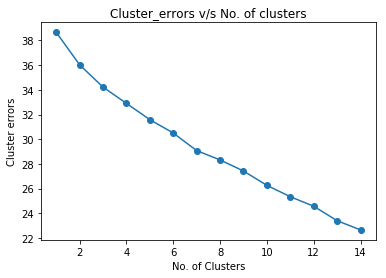

In [ ]:
# Elbow plot to find the optimal number of clusters
plt.plot(clusters_df.num_of_clusters, clusters_df.cluster_errors, marker = "o" )

# Title and axis
plt.xlabel('No. of Clusters')
plt.ylabel('Cluster errors')
plt.title('Cluster_errors v/s No. of clusters')

In [ ]:
# After No. of clusters=5, the cluster errors converge

num_clusters = 5  

k_means = KMeans(n_clusters=num_clusters, random_state=7)
k_means.fit(dr_norm)

# Cluster label for each stock
labels = k_means.labels_
cluster_labels = labels.tolist()
print('\ncluster_labels\n', cluster_labels)

# To find unique labels
unique_labels = list(set(cluster_labels))
print('\nunique_labels\n', unique_labels)

# Cluster centroids
cluster_centroids = np.array(k_means.cluster_centers_)
print('\n(x,y) coordinates of cluster_centroids \n', cluster_centroids)

# results
results = pd.DataFrame([daily_returns.index, labels]).T
results.columns = ['Ticker_index', 'Cluster_label']


# Dataframe with Ticker_name, Ticker_index, Cluster_label
ticker_df = pd.DataFrame({'Ticker_name':tickers})
result_df = pd.DataFrame()
result_df = pd.concat([ticker_df, results], axis=1)
#result_df

# Sort result_df by cluster label
sorted_df = result_df.sort_values('Cluster_label')
sorted_df



cluster_labels
 [2, 2, 2, 3, 0, 0, 2, 2, 2, 1, 3, 2, 3, 2, 1, 4, 2, 2, 2, 0, 1, 2, 2, 2, 2, 0, 4, 1, 2, 2, 2, 3, 2, 2, 0, 1, 2, 2, 2, 3, 0, 0, 4, 4, 2, 0, 0, 4, 2, 2]

unique_labels
 [0, 1, 2, 3, 4]

(x,y) coordinates of cluster_centroids 
 [[ 0.          0.00584719  0.02026095 ...  0.0070998   0.01048798
  -0.01574221]
 [ 0.          0.03226525  0.00474117 ... -0.00917196 -0.01238874
  -0.01114309]
 [ 0.          0.00927908  0.00295203 ... -0.005127    0.00748589
  -0.01384246]
 [ 0.          0.01356413  0.00040208 ... -0.00432515  0.00396827
  -0.00013006]
 [ 0.          0.00053622  0.01429    ... -0.00338519  0.03068451
  -0.01296602]]


Ticker_name  Ticker_index  Cluster_label
25  IBULHSGFIN.NS            25              0
46        VEDL.NS            46              0
45  ULTRACEMCO.NS            45              0
4     AXISBANK.NS             4              0
5   BAJAJ-AUTO.NS             5              0
41  TATAMOTORS.NS            41              0
40         TCS.NS            40              0
34        NTPC.NS            34              0
19    HINDALCO.NS            19              0
14   EICHERMOT.NS            14              1
35        ONGC.NS            35              1
20   HINDPETRO.NS            20              1
9     INFRATEL.NS             9              1
27  INDUSINDBK.NS            27              1
29   KOTAKBANK.NS            29              2
28        INFY.NS            28              2
30          LT.NS            30              2
0   ADANIPORTS.NS             0              2
33      MARUTI.NS            33              2
37    RELIANCE.NS            37              2
38        SBIN.NS            38              2
44         UPL.NS            44              2
32         M&M.NS            32              2
36   POWERGRID.NS            36              2
24   ICICIBANK.NS            24              2
23         ITC.NS            23              2
1    AMBUJACEM.NS             1              2
2   ASIANPAINT.NS             2              2
6   BAJFINANCE.NS             6              2
7         BPCL.NS             7              2
8   BHARTIARTL.NS             8              2
48     YESBANK.NS            48              2
11       CIPLA.NS            11              2
13     DRREDDY.NS            13              2
49        ZEEL.NS            49              2
16     HCLTECH.NS            16              2
17    HDFCBANK.NS            17              2
18  HEROMOTOCO.NS            18              2
21  HINDUNILVR.NS            21              2
22        HDFC.NS            22              2
12   COALINDIA.NS            12              3
31       LUPIN.NS            31              3
39   SUNPHARMA.NS            39              3
3   AUROPHARMA.NS             3              3
10    BOSCHLTD.NS            10              3
42   TATASTEEL.NS            42              4
43       TECHM.NS            43              4
26         IOC.NS            26              4
47       WIPRO.NS            47              4
15        GAIL.NS            15              4

In [ ]:
# Compute minimum distances between centroid of each cluster and set of points in the respective cluster

from sklearn.metrics import pairwise_distances_argmin_min

closest_ticker_ids = []
ticker_indices_within_i_cluster = []


data_list = dr_norm.tolist()
#print('type(data_list)', type(data_list))
#print('len(data_list)', len(data_list))
#print('data_list', data_list)

for i in range(0, num_clusters):
    
    clust_centroid = cluster_centroids[i]
    #print('\nCluster centroid for cluster {}'.format(i))
    #print(clust_centroid)
    
    ticker_indices_within_i_cluster = result_df.loc[result_df['Cluster_label'] == i, 'Ticker_index'].tolist()
    print('\nTicker indices in cluster {}'.format(i))
    print(ticker_indices_within_i_cluster)   

    one_cluster_data_mat = np.zeros((len(ticker_indices_within_i_cluster), cluster_centroids.shape[1]))
    #print('\nInitially one_cluster_data_mat has zero values\n', one_cluster_data_mat)
    
    for row_num, data_idx in enumerate(ticker_indices_within_i_cluster):
        one_row = dr_norm[data_idx]
        #print('\none_row', one_row)
        one_cluster_data_mat[row_num] = one_row
        #print('\none_cluster_data_mat[row_num]', one_cluster_data_mat)
    #print('\n')    
    #print('one_cluster_data_mat filled with co-ordinates of ticker_ids of a cluster\n', one_cluster_data_mat)

    closest, distances = pairwise_distances_argmin_min(clust_centroid.reshape(1, -1), one_cluster_data_mat)    
    closest_idx_in_one_cluster_data_mat = closest[0]
    closest_data_row_num = ticker_indices_within_i_cluster[closest_idx_in_one_cluster_data_mat]    
    #print('\nclosest_data_row_num', closest_data_row_num)
    
    data_id = dr_norm[closest_data_row_num]
    data_id_list = data_id.tolist()
    #print('\ndata_id_list', data_id_list)
    #print('\ntype(data_id_list)', type(data_id_list))    
   
    ticker_id = data_list.index(data_id_list)
    #print('\nticker_id', ticker_id)
   
    closest_ticker_ids.append(ticker_id)



Ticker indices in cluster 0
[4, 5, 19, 25, 34, 40, 41, 45, 46]

Ticker indices in cluster 1
[9, 14, 20, 27, 35]

Ticker indices in cluster 2
[0, 1, 2, 6, 7, 8, 11, 13, 16, 17, 18, 21, 22, 23, 24, 28, 29, 30, 32, 33, 36, 37, 38, 44, 48, 49]

Ticker indices in cluster 3
[3, 10, 12, 31, 39]

Ticker indices in cluster 4
[15, 26, 42, 43, 47]


In [ ]:
print('\n\n*************** We can create stock-portfolio of the below ticker_ids ***************')
print('\nFor cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are {}'.format(closest_ticker_ids))




*************** We can create stock-portfolio of the below ticker_ids ***************

For cluster numbers 0,1,2,3,4 ticker_ids closest to their respective cluster_centroids are [19, 9, 17, 31, 42]


In [ ]:
# ticker_names
ticker_names = pd.DataFrame()

for ticker_id in closest_ticker_ids:
    temp = pd.DataFrame(result_df.loc[result_df['Ticker_index'] == ticker_id, 'Ticker_name'])
    #print(temp)
    ticker_names = ticker_names.append(temp)

ticker_names = ticker_names.reset_index()
# Rename index column as 'Cluster_No.'
ticker_names.index.name = 'Cluster_No.'
ticker_names.columns = ['Ticker_index', 'Ticker_name']


# Portfolio of stocks

In [ ]:
# Writing the ticker names of the portfolio into .csv file
ticker_names.to_csv('Portfolio_stocks.csv')
print('Portfolio of stocks\n')
ticker_names

Portfolio of stocks



Ticker_index   Ticker_name
Cluster_No.                            
0                      19   HINDALCO.NS
1                       9   INFRATEL.NS
2                      17   HDFCBANK.NS
3                      31      LUPIN.NS
4                      42  TATASTEEL.NS

# Investment startegy:
# How to distribute funds among the portfolio of stocks to get maximum returns with minimum risk?

# Portfolio Optimization

In [ ]:
portfolio_df = pd.read_csv('Portfolio_stocks.csv', index_col=0)
print('Portfolio of stocks')
portfolio_df

Portfolio of stocks


Ticker_index   Ticker_name
Cluster_No.                            
0                      19   HINDALCO.NS
1                       9   INFRATEL.NS
2                      17   HDFCBANK.NS
3                      31      LUPIN.NS
4                      42  TATASTEEL.NS

In [ ]:
port_stocks = portfolio_df['Ticker_name'].values.tolist()
port_stocks

['HINDALCO.NS', 'INFRATEL.NS', 'HDFCBANK.NS', 'LUPIN.NS', 'TATASTEEL.NS']

In [ ]:
adj_close_df = pd.read_csv('stocks_adj_close.csv', index_col=0)[port_stocks]
adj_close_df.head()

HINDALCO.NS  INFRATEL.NS  HDFCBANK.NS    LUPIN.NS  TATASTEEL.NS
Date                                                                       
2013-01-01   128.415146   175.099014   654.123230  599.083557    368.073029
2013-01-02   129.228821   178.419449   656.846680  599.278503    368.031586
2013-01-03   128.654480   180.943008   653.024231  593.382141    371.516693
2013-01-04   126.883568   183.422272   649.201782  589.142761    364.125061
2013-01-07   128.654480   183.643631   638.546509  583.587463    370.341492



***************Analysis of individual stock in the portfolio***************

The annualised mean return of stock HINDALCO.NS is 0.23, and the annualised volatility (standard deviation) is 0.4

The annualised mean return of stock INFRATEL.NS is 0.21, and the annualised volatility (standard deviation) is 0.35

The annualised mean return of stock HDFCBANK.NS is 0.23, and the annualised volatility (standard deviation) is 0.2

The annualised mean return of stock LUPIN.NS is 0.12, and the annualised volatility (standard deviation) is 0.28

The annualised mean return of stock TATASTEEL.NS is 0.19, and the annualised volatility (standard deviation) is 0.36


******************************For the entire Portfolio******************************

Portfolio expected annualised return is 0.2 and volatility is 0.2

*************************************************************************************


Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual st

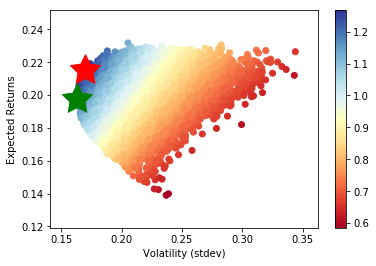

In [ ]:


print('\n\n***************Analysis of individual stock in the portfolio***************')
for i in range(0, len(port_stocks)):

    returns = adj_close_df.iloc[:, i].pct_change()

    mean_return = returns.mean()
    return_stdev = returns.std()

    annualised_return = round(mean_return * 252, 2) # 252 trading days in an year
    annualised_stdev = round(return_stdev * np.sqrt(252), 2)

    print ('\nThe annualised mean return of stock {} is {}, and the annualised volatility (standard deviation) is {}'
           .format(port_stocks[i], annualised_return, annualised_stdev))
    
    
""" Similarly, calculate the expected return and volatility (standard deviation) for 
the entire portfolio of stocks. This will capture the benefits of diversification of less than perfect correlation 
between the stocks in the portfolio. """

""" We need our first input, the weights of the stocks in the portfolio – that is, 
how much of each stock do we hold as a percentage of the entire portfolio holdings.
Lets initially assume equal weights"(0.20 in our case) for all the 5 stocks in this portfolio. """

""" We can calculate the portfolio expected return and volatility as follows: """

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set array holding portfolio weights of each stock
weights = np.array([0.20, 0.20, 0.20, 0.20, 0.20])
 
#calculate annualised portfolio return
portfolio_return = round(np.sum(mean_daily_returns * weights) * 252, 2)

#calculate annualised portfolio volatility
portfolio_std_dev = round(np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252), 2)
 
print('\n\n******************************For the entire Portfolio******************************')
print('\nPortfolio expected annualised return is {} and volatility is {}'.format(portfolio_return, portfolio_std_dev))
print('\n*************************************************************************************\n\n')    
    
"""We now know the expected return and volatility of our current portfolio. 
But what if we aren’t happy with the level of volatility of our current portfolio and would like to reduce it? 
What if we are willing to take on more risk in search of a higher expected return? 
How can we rearrange the weight of each stock in our portfolio to achieve these goals?"""


"""We can use Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks 
(obviously making sure the weights sum to 100%) and then calculate the expected return, expected volatility and Sharpe Ratio 
for each of the randomly generated portfolios."""

print('Monte Carlo simulation of 25000 runs of different randomly generated weights for the individual stocks\n')

#convert daily stock prices into daily returns
returns = adj_close_df.pct_change()
 
#calculate mean daily return and covariance of daily returns
mean_daily_returns = returns.mean()
cov_matrix = returns.cov()
 
#set number of runs of random portfolio weights
num_portfolios = 25000
 
#set up array to hold results
#We have increased the size of the array to hold the weight values for each stock
results = np.zeros((4+len(port_stocks)-1, num_portfolios))
 
for i in range(num_portfolios):
    #select random weights for portfolio holdings
    weights = np.array(np.random.random(5))
    
    #rebalance weights to sum to 1
    weights /= np.sum(weights)
    
    #calculate portfolio return and volatility
    portfolio_return = np.sum(mean_daily_returns * weights) * 252
    portfolio_std_dev = np.sqrt(np.dot(weights.T, np.dot(cov_matrix, weights))) * np.sqrt(252)
    
    #store results in results array
    results[0,i] = portfolio_return
    results[1,i] = portfolio_std_dev
    
    #store Sharpe Ratio (return / volatility) - risk free rate element excluded for simplicity
    results[2,i] = results[0,i] / results[1,i]
    
    #iterate through the weight vector and add data to results array
    for j in range(len(weights)):
        results[j+3,i] = weights[j]
 
"""convert results array to Pandas DataFrame"""
results_frame = pd.DataFrame(results.T, columns=['Returns', 'Volatility', 'Sharpe_Ratio',
                                                 port_stocks[0], port_stocks[1],
                                                 port_stocks[2], port_stocks[3], port_stocks[4]])
 
#locate position of portfolio with highest Sharpe Ratio
max_sharpe_port = results_frame.iloc[results_frame['Sharpe_Ratio'].idxmax()]
print('type(max_sharpe_port)', type(max_sharpe_port))

#locate positon of portfolio with minimum standard deviation
min_vol_port = results_frame.iloc[results_frame['Volatility'].idxmin()]
print('type(min_vol_port)', type(min_vol_port))

#create scatter plot coloured by Sharpe Ratio
plt.scatter(results_frame.Volatility, results_frame.Returns, c=results_frame.Sharpe_Ratio, cmap='RdYlBu')
plt.xlabel('Volatility (stdev)')
plt.ylabel('Expected Returns')
plt.colorbar()

#plot red star to highlight position of portfolio with highest Sharpe Ratio
plt.scatter(max_sharpe_port[1], max_sharpe_port[0], marker=(5,1,0), color='r',s=1000)

#plot green star to highlight position of minimum variance portfolio
plt.scatter(min_vol_port[1], min_vol_port[0], marker=(5,1,0), color='g', s=1000)


### Type-1: "Portfolio with Maximum Sharpe Ratio" - RED star in the above plot

In [ ]:
print('\n"Type-1: Portfolio with Maximum Sharpe Ratio"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio\n')
print(max_sharpe_port)


"Type-1: Portfolio with Maximum Sharpe Ratio"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-1 portfolio

Returns         0.215289
Volatility      0.169948
Sharpe_Ratio    1.266789
HINDALCO.NS     0.056749
INFRATEL.NS     0.149461
HDFCBANK.NS     0.657087
LUPIN.NS        0.121491
TATASTEEL.NS    0.015212
Name: 24202, dtype: float64


### Type-2: "Portfolio with Minimum Volatility" - GREEN star in the above plot

In [ ]:
print('\n"Type-2: Portfolio with Minimum Volatility (stdev)"\n')
print('Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio\n')
print(min_vol_port)


"Type-2: Portfolio with Minimum Volatility (stdev)"

Returns, Volatility(stdev), Sharpe_Ratio & calculated weights of individual stocks of Type-2 portfolio

Returns         0.197467
Volatility      0.163442
Sharpe_Ratio    1.208177
HINDALCO.NS     0.027375
INFRATEL.NS     0.180290
HDFCBANK.NS     0.506867
LUPIN.NS        0.274900
TATASTEEL.NS    0.010567
Name: 4218, dtype: float64


# Fetching data for each stock in the portfolio of stocks

In [ ]:
trading_tickers = pd.read_csv('Portfolio_stocks.csv', index_col=0)
trading_tickers

Ticker_index   Ticker_name
Cluster_No.                            
0                      19   HINDALCO.NS
1                       9   INFRATEL.NS
2                      17   HDFCBANK.NS
3                      31      LUPIN.NS
4                      42  TATASTEEL.NS

In [ ]:
tickers_for_model = trading_tickers.Ticker_name.tolist()
tickers_for_model

['HINDALCO.NS', 'INFRATEL.NS', 'HDFCBANK.NS', 'LUPIN.NS', 'TATASTEEL.NS']

### Fetching data for NIFTY 50 (^NSEI)

In [ ]:
nse =  pdr.get_data_yahoo('^NSEI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [ ]:
nse.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  5982.600098  6006.049805  5982.000000  5993.250000  5993.250000   
2013-01-03  6015.799805  6017.000000  5986.549805  6009.500000  6009.500000   
2013-01-04  6011.950195  6020.750000  5981.549805  6016.149902  6016.149902   
2013-01-07  6042.149902  6042.149902  5977.149902  5988.399902  5988.399902   
2013-01-08  5983.450195  6007.049805  5964.399902  6001.700195  6001.700195   

            Volume  
Date                
2013-01-02       0  
2013-01-03       0  
2013-01-04       0  
2013-01-07       0  
2013-01-08       0

In [ ]:
# Shifting adjusted close prices by 1 day to refelct previous day adjusted close prices

nse['Adj Close'] = nse['Adj Close'].shift(1)

In [ ]:
nse.rename(columns={'Adj Close': 'NSE'}, inplace=True)
nse.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nse.head()

NSE
Date                   
2013-01-02          NaN
2013-01-03  5993.250000
2013-01-04  6009.500000
2013-01-07  6016.149902
2013-01-08  5988.399902

### Fetching data for S&P 500 (^GSPC)

In [ ]:
spy =  pdr.get_data_yahoo('^GSPC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [ ]:
spy.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  1426.189941  1462.430054  1426.189941  1462.420044  1462.420044   
2013-01-03  1462.420044  1465.469971  1455.530029  1459.369995  1459.369995   
2013-01-04  1459.369995  1467.939941  1458.989990  1466.469971  1466.469971   
2013-01-07  1466.469971  1466.469971  1456.619995  1461.890015  1461.890015   
2013-01-08  1461.890015  1461.890015  1451.640015  1457.150024  1457.150024   

                Volume  
Date                    
2013-01-02  4202600000  
2013-01-03  3829730000  
2013-01-04  3424290000  
2013-01-07  3304970000  
2013-01-08  3601600000

In [ ]:
# Shifting adjusted close prices by 1 day to refelct previous day adjusted close prices

spy['Adj Close'] = spy['Adj Close'].shift(1)

In [ ]:
spy.rename(columns={'Adj Close': 'SPY'}, inplace=True)
spy.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
spy.head()

SPY
Date                   
2013-01-02          NaN
2013-01-03  1462.420044
2013-01-04  1459.369995
2013-01-07  1466.469971
2013-01-08  1461.890015

### Fetching data for Dow Jones Industrial Average (^DJI)

In [ ]:
dji =  pdr.get_data_yahoo('^DJI', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [ ]:
dji.head()

Open          High           Low         Close  \
Date                                                                 
2013-01-02  13104.299805  13412.709961  13104.299805  13412.549805   
2013-01-03  13413.009766  13430.599609  13358.299805  13391.360352   
2013-01-04  13391.049805  13447.110352  13376.230469  13435.209961   
2013-01-07  13436.129883  13436.129883  13343.320313  13384.290039   
2013-01-08  13377.419922  13377.419922  13293.129883  13328.849609   

               Adj Close     Volume  
Date                                 
2013-01-02  13412.549805  161430000  
2013-01-03  13391.360352  129630000  
2013-01-04  13435.209961  107590000  
2013-01-07  13384.290039  113120000  
2013-01-08  13328.849609  129570000

In [ ]:
# Shifting adjusted close prices by 1 day to refelct previous day adjusted close prices

dji['Adj Close'] = dji['Adj Close'].shift(1)

In [ ]:
dji.rename(columns={'Adj Close': 'DJ'}, inplace=True)
dji.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
dji.head()

DJ
Date                    
2013-01-02           NaN
2013-01-03  13412.549805
2013-01-04  13391.360352
2013-01-07  13435.209961
2013-01-08  13384.290039

### Fetching data for NASDAQ Composite (^IXIC)

In [ ]:
nasdaq =  pdr.get_data_yahoo('^IXIC', start_date, end_date)

[*********************100%***********************]  1 of 1 downloaded


In [ ]:
nasdaq.head()

Open         High          Low        Close    Adj Close  \
Date                                                                          
2013-01-02  3091.330078  3112.649902  3083.489990  3112.260010  3112.260010   
2013-01-03  3108.489990  3118.179932  3092.280029  3100.570068  3100.570068   
2013-01-04  3100.879883  3108.439941  3090.810059  3101.659912  3101.659912   
2013-01-07  3089.169922  3102.350098  3083.879883  3098.810059  3098.810059   
2013-01-08  3098.459961  3103.389893  3076.600098  3091.810059  3091.810059   

                Volume  
Date                    
2013-01-02  2111300000  
2013-01-03  1769420000  
2013-01-04  1745140000  
2013-01-07  1702540000  
2013-01-08  1744380000

In [ ]:
# Shifting adjusted close prices by 1 day to refelct previous day adjusted close prices

nasdaq['Adj Close'] = nasdaq['Adj Close'].shift(1)

In [ ]:
nasdaq.rename(columns={'Adj Close': 'NASDAQ'}, inplace=True)
nasdaq.drop (['Open','Close','High','Low','Volume'] , axis =1 , inplace = True)
nasdaq.head()

NASDAQ
Date                   
2013-01-02          NaN
2013-01-03  3112.260010
2013-01-04  3100.570068
2013-01-07  3101.659912
2013-01-08  3098.810059

### Fetching data for individual stocks from the portfolio of stocks

### Fetching data for Stock-1

In [ ]:
print('Fetching historic stock data for {}'.format(tickers_for_model[0]))

Fetching historic stock data for HINDALCO.NS


In [ ]:
stock1_df =  pdr.get_data_yahoo(tickers_for_model[0], start_date, end_date)
stock1_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  131.500000  134.699997  131.500000  134.149994  128.415146   
2013-01-02  136.449997  137.100006  134.500000  135.000000  129.228821   
2013-01-03  135.649994  136.000000  133.100006  134.399994  128.654480   
2013-01-04  133.050003  133.800003  130.800003  132.550003  126.883568   
2013-01-07  133.000000  136.000000  132.250000  134.399994  128.654480   

             Volume  
Date                 
2013-01-01  7134099  
2013-01-02  6934542  
2013-01-03  4968022  
2013-01-04  5798690  
2013-01-07  5957987

In [ ]:
# Fetching 'VWAP' from nsepy package for the same stock

stock1 = tickers_for_model[0].split('.')[0]
stock1

'HINDALCO'

In [ ]:
# Date format for nsepy package 'yyyy,mm,dd'

data = get_history(symbol=stock1, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    133.49
2013-01-02    136.12
2013-01-03    134.52
2013-01-04    132.20
2013-01-07    134.55
Name: VWAP, dtype: float64

In [ ]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock1_df = stock1_df.join(data['VWAP'])
stock1_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  131.500000  134.699997  131.500000  134.149994  128.415146   
2013-01-02  136.449997  137.100006  134.500000  135.000000  129.228821   
2013-01-03  135.649994  136.000000  133.100006  134.399994  128.654480   
2013-01-04  133.050003  133.800003  130.800003  132.550003  126.883568   
2013-01-07  133.000000  136.000000  132.250000  134.399994  128.654480   

             Volume    VWAP  
Date                         
2013-01-01  7134099  133.49  
2013-01-02  6934542  136.12  
2013-01-03  4968022  134.52  
2013-01-04  5798690  132.20  
2013-01-07  5957987  134.55

### Joining individual stock data with nse, spy, dji, nasdaq data

In [ ]:
stock1_df = stock1_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock1_df = stock1_df.fillna(method='ffill')

# Backward fill
stock1_df = stock1_df.fillna(method = 'bfill')

stock1_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  131.500000  134.699997  131.500000  134.149994  128.415146   
2013-01-02  136.449997  137.100006  134.500000  135.000000  129.228821   
2013-01-03  135.649994  136.000000  133.100006  134.399994  128.654480   
2013-01-04  133.050003  133.800003  130.800003  132.550003  126.883568   
2013-01-07  133.000000  136.000000  132.250000  134.399994  128.654480   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  7134099  133.49  5993.250000  1462.420044  13412.549805   
2013-01-02  6934542  136.12  5993.250000  1462.420044  13412.549805   
2013-01-03  4968022  134.52  5993.250000  1462.420044  13412.549805   
2013-01-04  5798690  132.20  6009.500000  1459.369995  13391.360352   
2013-01-07  5957987  134.55  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3112.260010  
2013-01-04  3100.570068  
2013-01-07  3101.659912

### Fetching data for Stock-2

In [ ]:
print('Fetching historic stock data for {}'.format(tickers_for_model[1]))

Fetching historic stock data for INFRATEL.NS


In [ ]:
stock2_df =  pdr.get_data_yahoo(tickers_for_model[1], start_date, end_date)
stock2_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume  
Date                 
2013-01-01  2619486  
2013-01-02  5470399  
2013-01-03  3626134  
2013-01-04  4188477  
2013-01-07  2632614

In [ ]:
# Fetching 'VWAP' from nsepy package

stock2 = tickers_for_model[1].split('.')[0]
stock2

'INFRATEL'

In [ ]:
data = get_history(symbol=stock2, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    197.64
2013-01-02    200.96
2013-01-03    204.11
2013-01-04    207.22
2013-01-07    207.99
Name: VWAP, dtype: float64

In [ ]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock2_df = stock2_df.join(data['VWAP'])
stock2_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume    VWAP  
Date                         
2013-01-01  2619486  197.64  
2013-01-02  5470399  200.96  
2013-01-03  3626134  204.11  
2013-01-04  4188477  207.22  
2013-01-07  2632614  207.99

### Joining individual stock data with nse, spy, dji, nasdaq data

In [ ]:
stock2_df = stock2_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock2_df = stock2_df.fillna(method='ffill')

# Backward fill
stock2_df = stock2_df.fillna(method = 'bfill')

stock2_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  194.699997  199.800003  194.000000  197.750000  175.099014   
2013-01-02  198.300003  204.350006  197.000000  201.500000  178.419449   
2013-01-03  200.000000  206.500000  200.000000  204.350006  180.943008   
2013-01-04  205.000000  210.000000  202.350006  207.149994  183.422272   
2013-01-07  207.850006  209.000000  206.100006  207.399994  183.643631   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  2619486  197.64  5993.250000  1462.420044  13412.549805   
2013-01-02  5470399  200.96  5993.250000  1462.420044  13412.549805   
2013-01-03  3626134  204.11  5993.250000  1462.420044  13412.549805   
2013-01-04  4188477  207.22  6009.500000  1459.369995  13391.360352   
2013-01-07  2632614  207.99  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3112.260010  
2013-01-04  3100.570068  
2013-01-07  3101.659912

### Fetching data for Stock-3

In [ ]:
print('Fetching historic stock data for {}'.format(tickers_for_model[2]))

Fetching historic stock data for HDFCBANK.NS


In [ ]:
stock3_df =  pdr.get_data_yahoo(tickers_for_model[2], start_date, end_date)
stock3_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  682.099976  685.099976  679.650024  684.500000  654.123230   
2013-01-02  689.900024  690.000000  683.049988  687.349976  656.846680   
2013-01-03  690.000000  690.000000  680.400024  683.349976  653.024231   
2013-01-04  685.000000  685.000000  672.799988  679.349976  649.201782   
2013-01-07  683.700012  683.700012  666.000000  668.200012  638.546509   

             Volume  
Date                 
2013-01-01  1007303  
2013-01-02  2427399  
2013-01-03  2285683  
2013-01-04  2721127  
2013-01-07  2751142

In [ ]:
# Fetching 'VWAP' from nsepy package

stock3 = tickers_for_model[2].split('.')[0]
stock3

'HDFCBANK'

In [ ]:
data = get_history(symbol=stock3, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    682.68
2013-01-02    686.96
2013-01-03    684.70
2013-01-04    676.86
2013-01-07    671.03
Name: VWAP, dtype: float64

In [ ]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock3_df = stock3_df.join(data['VWAP'])
stock3_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  682.099976  685.099976  679.650024  684.500000  654.123230   
2013-01-02  689.900024  690.000000  683.049988  687.349976  656.846680   
2013-01-03  690.000000  690.000000  680.400024  683.349976  653.024231   
2013-01-04  685.000000  685.000000  672.799988  679.349976  649.201782   
2013-01-07  683.700012  683.700012  666.000000  668.200012  638.546509   

             Volume    VWAP  
Date                         
2013-01-01  1007303  682.68  
2013-01-02  2427399  686.96  
2013-01-03  2285683  684.70  
2013-01-04  2721127  676.86  
2013-01-07  2751142  671.03

### Joining individual stock data with nse, spy, dji, nasdaq data

In [ ]:
stock3_df = stock3_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock3_df = stock3_df.fillna(method='ffill')

# Backward fill
stock3_df = stock3_df.fillna(method = 'bfill')

stock3_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  682.099976  685.099976  679.650024  684.500000  654.123230   
2013-01-02  689.900024  690.000000  683.049988  687.349976  656.846680   
2013-01-03  690.000000  690.000000  680.400024  683.349976  653.024231   
2013-01-04  685.000000  685.000000  672.799988  679.349976  649.201782   
2013-01-07  683.700012  683.700012  666.000000  668.200012  638.546509   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  1007303  682.68  5993.250000  1462.420044  13412.549805   
2013-01-02  2427399  686.96  5993.250000  1462.420044  13412.549805   
2013-01-03  2285683  684.70  5993.250000  1462.420044  13412.549805   
2013-01-04  2721127  676.86  6009.500000  1459.369995  13391.360352   
2013-01-07  2751142  671.03  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3112.260010  
2013-01-04  3100.570068  
2013-01-07  3101.659912

### Fetching data for Stock-4

In [ ]:
print('Fetching historic stock data for {}'.format(tickers_for_model[3]))

Fetching historic stock data for LUPIN.NS


In [ ]:
stock4_df =  pdr.get_data_yahoo(tickers_for_model[3], start_date, end_date)
stock4_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  Volume
Date                                                                          
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557  245907
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503  381107
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141  475306
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761  522833
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463  687589

In [ ]:
# Fetching 'VWAP' from nsepy package

stock4 = tickers_for_model[3].split('.')[0]
stock4

'LUPIN'

In [ ]:
data = get_history(symbol=stock4, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    615.70
2013-01-02    616.25
2013-01-03    609.67
2013-01-04    605.92
2013-01-07    601.43
Name: VWAP, dtype: float64

In [ ]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock4_df = stock4_df.join(data['VWAP'])
stock4_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            Volume    VWAP  
Date                        
2013-01-01  245907  615.70  
2013-01-02  381107  616.25  
2013-01-03  475306  609.67  
2013-01-04  522833  605.92  
2013-01-07  687589  601.43

### Joining individual stock data with nse, spy, dji, nasdaq data

In [ ]:
stock4_df = stock4_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock4_df = stock4_df.fillna(method='ffill')

# Backward fill
stock4_df = stock4_df.fillna(method = 'bfill')

stock4_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  615.150024  621.250000  612.000000  614.700012  599.083557   
2013-01-02  616.549988  619.900024  614.000000  614.900024  599.278503   
2013-01-03  618.700012  618.700012  606.299988  608.849976  593.382141   
2013-01-04  608.000000  610.950012  602.750000  604.500000  589.142761   
2013-01-07  609.599976  609.599976  597.500000  598.799988  583.587463   

            Volume    VWAP          NSE          SPY            DJ  \
Date                                                                 
2013-01-01  245907  615.70  5993.250000  1462.420044  13412.549805   
2013-01-02  381107  616.25  5993.250000  1462.420044  13412.549805   
2013-01-03  475306  609.67  5993.250000  1462.420044  13412.549805   
2013-01-04  522833  605.92  6009.500000  1459.369995  13391.360352   
2013-01-07  687589  601.43  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3112.260010  
2013-01-04  3100.570068  
2013-01-07  3101.659912

### Fetching data for Stock-5

In [ ]:
print('Fetching historic stock data for {}'.format(tickers_for_model[4]))

Fetching historic stock data for TATASTEEL.NS


In [ ]:
stock5_df =  pdr.get_data_yahoo(tickers_for_model[4], start_date, end_date)
stock5_df.head()

[*********************100%***********************]  1 of 1 downloaded


Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume  
Date                 
2013-01-01  3258417  
2013-01-02  2725650  
2013-01-03  3446967  
2013-01-04  3825854  
2013-01-07  7192053

In [ ]:
# Fetching 'VWAP' from nsepy package

stock5 = tickers_for_model[4].split('.')[0]
stock5

'TATASTEEL'

In [ ]:
data = get_history(symbol=stock5, start=date(2013,1,1),  end=date(2018,5,1))
data['VWAP'].head()

Date
2013-01-01    436.73
2013-01-02    441.05
2013-01-03    442.04
2013-01-04    434.01
2013-01-07    439.60
Name: VWAP, dtype: float64

In [ ]:
# Joining individual stock data with 'VWAP' fetched from nsepy package

stock5_df = stock5_df.join(data['VWAP'])
stock5_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume    VWAP  
Date                         
2013-01-01  3258417  436.73  
2013-01-02  2725650  441.05  
2013-01-03  3446967  442.04  
2013-01-04  3825854  434.01  
2013-01-07  7192053  439.60

### Joining individual stock data with nse, spy, dji, nasdaq data

In [ ]:
stock5_df = stock5_df.join([nse, spy, dji, nasdaq])

# Forward fill
stock5_df = stock5_df.fillna(method='ffill')

# Backward fill
stock5_df = stock5_df.fillna(method = 'bfill')

stock5_df.head()

Open        High         Low       Close   Adj Close  \
Date                                                                     
2013-01-01  411.487000  419.204010  410.963013  417.489014  368.073029   
2013-01-02  421.585999  422.777008  416.154999  417.441986  368.031586   
2013-01-03  419.204010  423.587006  418.108002  421.394989  371.516693   
2013-01-04  420.157013  420.157013  409.677002  413.010986  364.125061   
2013-01-07  414.345001  426.825989  409.867004  420.062012  370.341492   

             Volume    VWAP          NSE          SPY            DJ  \
Date                                                                  
2013-01-01  3258417  436.73  5993.250000  1462.420044  13412.549805   
2013-01-02  2725650  441.05  5993.250000  1462.420044  13412.549805   
2013-01-03  3446967  442.04  5993.250000  1462.420044  13412.549805   
2013-01-04  3825854  434.01  6009.500000  1459.369995  13391.360352   
2013-01-07  7192053  439.60  6016.149902  1466.469971  13435.209961   

                 NASDAQ  
Date                     
2013-01-01  3112.260010  
2013-01-02  3112.260010  
2013-01-03  3112.260010  
2013-01-04  3100.570068  
2013-01-07  3101.659912

### Creating stock_df for each stock in the portfolio of stocks

In [ ]:
def add_vars_to_stock_df(tup_dfs, tickers_lst):
    """Creates dataframe for every stock in the portfolio of stocks"""    
    
    # Instantiating Technical Indicators object
    tech_ind = ti.technical_indicators()
    
    def calc_derived_vars(stk_df):
        """Creates dataframe containing derived variables for every stock in the portfolio of stocks"""
        
        # Calling functions from Technical_Indicators file

        stk_df = tech_ind.pcod(stk_df)
        stk_df = tech_ind.hld(stk_df)
        stk_df = tech_ind.stockRsi(stk_df, numOfDays=20)
        stk_df = tech_ind.bbands(stk_df, length=20, numsd=2) 
        stk_df = tech_ind.stma(stk_df, numOfDays=20) 
        stk_df = tech_ind.ltma(stk_df, numOfDays=120) 
        stk_df = tech_ind.ema(stk_df, numOfDays=20) 
        stk_df = tech_ind.scul(stk_df)
        stk_df = tech_ind.scll(stk_df)
        stk_df = tech_ind.stma_cuts_ltma(stk_df)
        stk_df = tech_ind.close_cuts_stma(stk_df)
        stk_df = tech_ind.close_cuts_ltma(stk_df)
        stk_df = tech_ind.daily_returns(stk_df)
        stk_df = tech_ind.daily_returns_NSE(stk_df)
        stk_df = tech_ind.daily_returns_SPY(stk_df)
        stk_df = tech_ind.daily_returns_DOWJONES(stk_df)
        stk_df = tech_ind.daily_returns_NASDAQ(stk_df)
        stk_df = tech_ind.price_movement(stk_df)
        stk_df = tech_ind.beta_values(stk_df)

        #time-series prediction for the stock using prophet
        stk_df.reset_index(inplace = True)
        stk_df = stk_df.rename(columns={'index':'Date'})
        stk_df, ts_data = tech_ind.TS_close_price(stk_df)
        
        # Convert date to week-of-day (Sunday, Monday...)
        stk_df['day_of_week'] = stk_df['ds'].dt.weekday_name       
        # Converting categorical 'day_of_week' variable to numeric variable
        le = LabelEncoder()
        new_name = 'le_'+'day_of_week'
        stk_df[new_name] = le.fit_transform(stk_df['day_of_week'])

        stk_df = Sdf.retype(stk_df)
        stk_df['tr'] = stk_df.get('tr') 
        stk_df['atr'] = stk_df.get('atr')
        stk_df['wr_10'] = stk_df.get('wr_10')
        stk_df['kdjk'] = stk_df.get('kdjk')
        stk_df['macd'] = stk_df.get('macd')        
        
        return stk_df
        
    all_data = pd.DataFrame()
    stk_df_lst = []
    
    for i in range(len(tup_dfs)):       
        stk_df = calc_derived_vars(tup_dfs[i])
        stk_df_lst.append(stk_df)     
        
        temp = pd.DataFrame()
        temp = stk_df.copy(deep=True)
        stock_name = tickers_lst[i].split('.')[0]
        temp['stock'] = stock_name
        all_data = pd.concat([all_data, temp])
        
        # Writing the stk_df data to .csv file
        stk_df.to_csv('{}'.format(tickers_lst[i]+'.csv'))
        #print(tickers_lst[i]+'.csv')
        
        
    # Writing the all stock data to .csv file
    all_data.to_csv('all_stock_data.csv')   
    
    tup_stock_dfs = tuple(stk_df_lst)
    return (tup_stock_dfs)    

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  134.149994
1 2013-01-02  135.000000
2 2013-01-03  134.399994
3 2013-01-04  132.550003
4 2013-01-07  134.399994


          ds      y_orig         y
0 2013-01-01  134.149994  4.898959
1 2013-01-02  135.000000  4.905275
2 2013-01-03  134.399994  4.900820
3 2013-01-04  132.550003  4.886960
4 2013-01-07  134.399994  4.900820


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  5.571079    5.499651    5.647375
1224 2017-12-19  5.570602    5.495882    5.641415
1225 2017-12-20  5.574319    5.496526    5.649171
1226 2017-12-21  5.577565    5.506429    5.653702
1227 2017-12-22  5.577271    5.500866    5.654435
1228 2017-12-26  5.580225    5.506830    5.658259
1229 2017-12-27  5.583093    5.508832    5.663005
1230 2017-12-28  5.585314    5.509990    5.660801
1231 2017-12-29  5.583845    5.507842    5.657359
1232 2018-01-01  5.583799

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  197.750000
1 2013-01-02  201.500000
2 2013-01-03  204.350006
3 2013-01-04  207.149994
4 2013-01-07  207.399994


          ds      y_orig         y
0 2013-01-01  197.750000  5.287004
1 2013-01-02  201.500000  5.305789
2 2013-01-03  204.350006  5.319834
3 2013-01-04  207.149994  5.333443
4 2013-01-07  207.399994  5.334649


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  5.955718    5.906532    6.006195
1224 2017-12-19  5.953526    5.904410    6.006567
1225 2017-12-20  5.953210    5.900607    6.003883
1226 2017-12-21  5.952387    5.903312    6.003832
1227 2017-12-22  5.949206    5.902554    5.999303
1228 2017-12-26  5.943587    5.894193    5.997190
1229 2017-12-27  5.943514    5.891314    5.992200
1230 2017-12-28  5.942989    5.895853    5.995387
1231 2017-12-29  5.940144    5.889679    5.991031
1232 2018-01-01  5.937588

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  684.500000
1 2013-01-02  687.349976
2 2013-01-03  683.349976
3 2013-01-04  679.349976
4 2013-01-07  668.200012


          ds      y_orig         y
0 2013-01-01  684.500000  6.528689
1 2013-01-02  687.349976  6.532844
2 2013-01-03  683.349976  6.527007
3 2013-01-04  679.349976  6.521136
4 2013-01-07  668.200012  6.504588


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  7.524897    7.495644    7.554304
1224 2017-12-19  7.523933    7.494771    7.553052
1225 2017-12-20  7.524766    7.497066    7.551655
1226 2017-12-21  7.526836    7.496173    7.555890
1227 2017-12-22  7.528898    7.499623    7.557759
1228 2017-12-26  7.530401    7.502732    7.557492
1229 2017-12-27  7.531858    7.502040    7.561319
1230 2017-12-28  7.534551    7.506756    7.564473
1231 2017-12-29  7.537223    7.509189    7.565222
1232 2018-01-01  7.540757

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  614.700012
1 2013-01-02  614.900024
2 2013-01-03  608.849976
3 2013-01-04  604.500000
4 2013-01-07  598.799988


          ds      y_orig         y
0 2013-01-01  614.700012  6.421134
1 2013-01-02  614.900024  6.421460
2 2013-01-03  608.849976  6.411572
3 2013-01-04  604.500000  6.404402
4 2013-01-07  598.799988  6.394928


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  6.751181    6.704692    6.802699
1224 2017-12-19  6.748691    6.700358    6.796284
1225 2017-12-20  6.749504    6.700494    6.796738
1226 2017-12-21  6.748202    6.696550    6.798148
1227 2017-12-22  6.747331    6.693561    6.796314
1228 2017-12-26  6.741102    6.690641    6.789723
1229 2017-12-27  6.741335    6.693600    6.787066
1230 2017-12-28  6.739471    6.689444    6.786233
1231 2017-12-29  6.738066    6.692188    6.784538
1232 2018-01-01  6.733556

INFO:fbprophet.forecaster:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.




0   2013-01-01
1   2013-01-02
2   2013-01-03
3   2013-01-04
4   2013-01-07
Name: ds, dtype: datetime64[ns]


          ds      y_orig
0 2013-01-01  417.489014
1 2013-01-02  417.441986
2 2013-01-03  421.394989
3 2013-01-04  413.010986
4 2013-01-07  420.062012


          ds      y_orig         y
0 2013-01-01  417.489014  6.034258
1 2013-01-02  417.441986  6.034146
2 2013-01-03  421.394989  6.043571
3 2013-01-04  413.010986  6.023474
4 2013-01-07  420.062012  6.040402


             ds      yhat  yhat_lower  yhat_upper
1223 2017-12-18  6.526154    6.456915    6.593455
1224 2017-12-19  6.524549    6.458768    6.590216
1225 2017-12-20  6.529107    6.461675    6.592918
1226 2017-12-21  6.528683    6.462174    6.591740
1227 2017-12-22  6.529609    6.460163    6.594068
1228 2017-12-26  6.534337    6.471851    6.601699
1229 2017-12-27  6.540556    6.475981    6.607938
1230 2017-12-28  6.541635    6.475779    6.607638
1231 2017-12-29  6.543870    6.479469    6.608245
1232 2018-01-01  6.550922

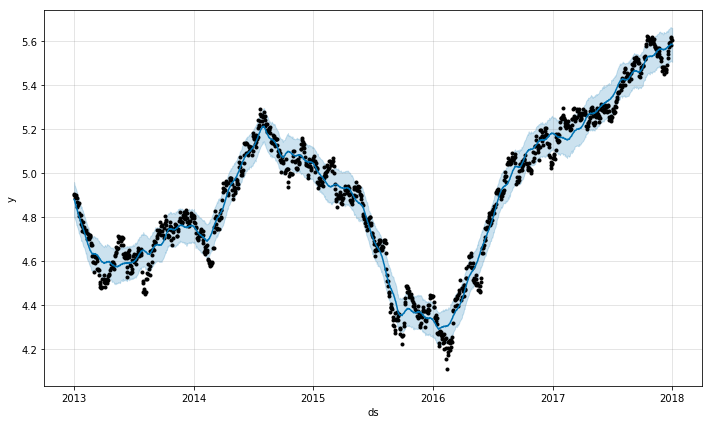

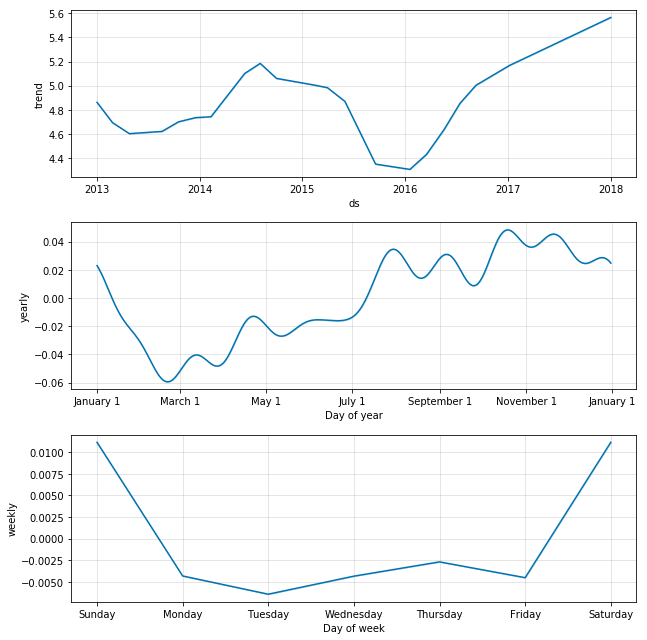

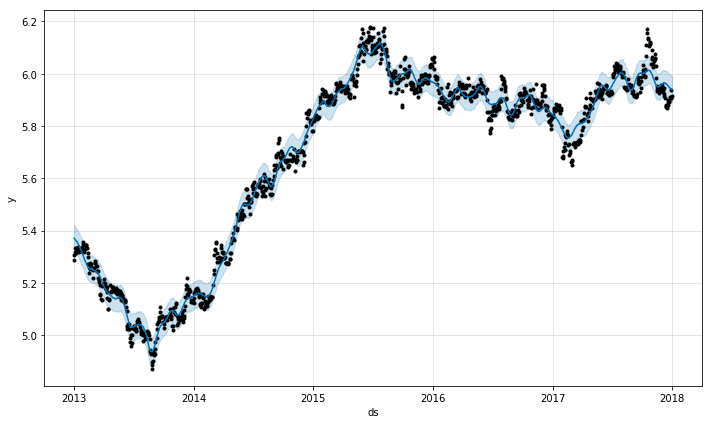

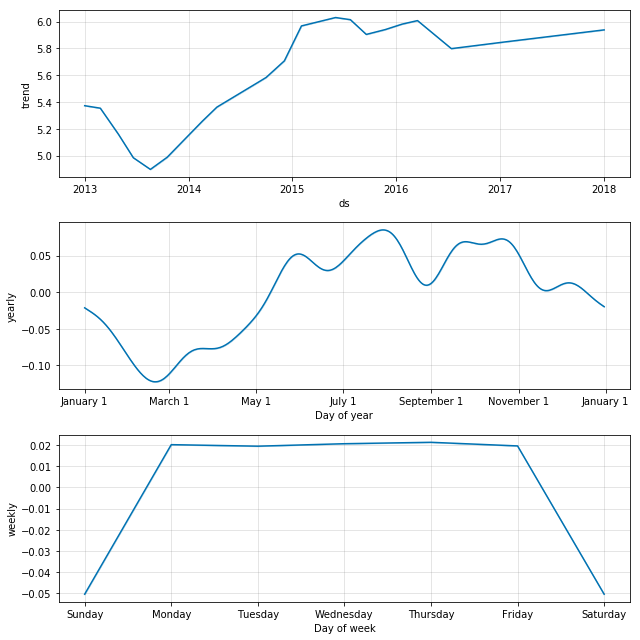

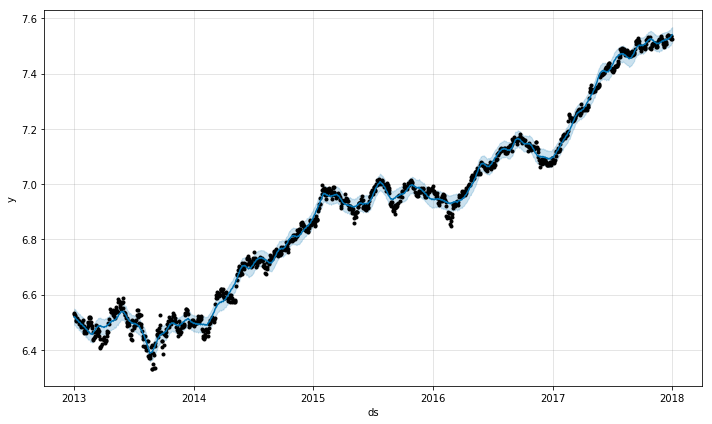

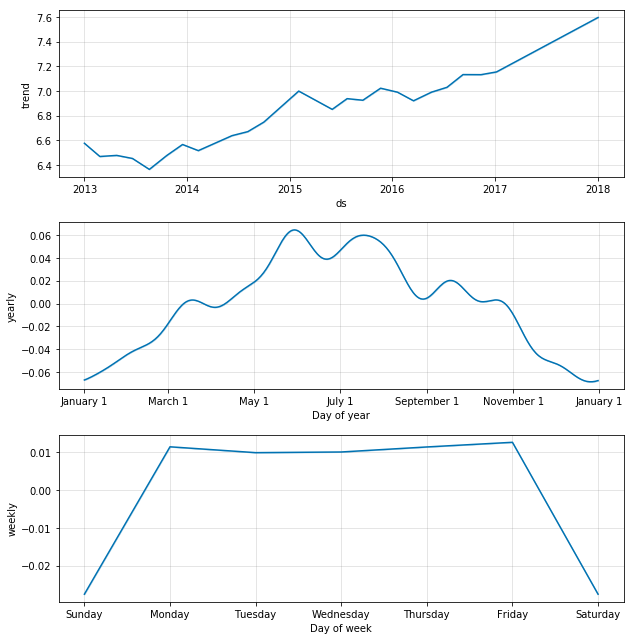

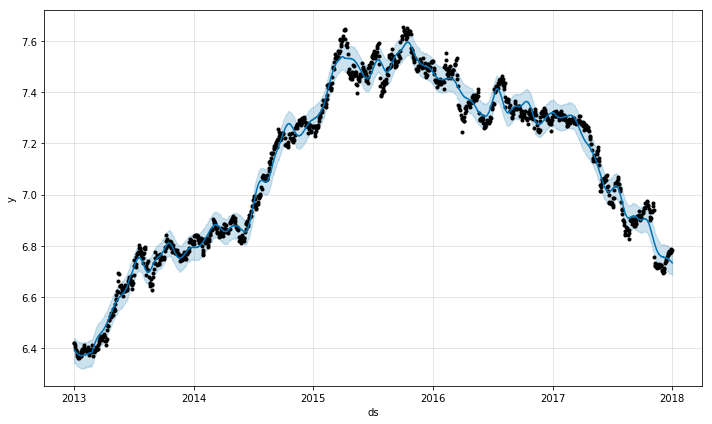

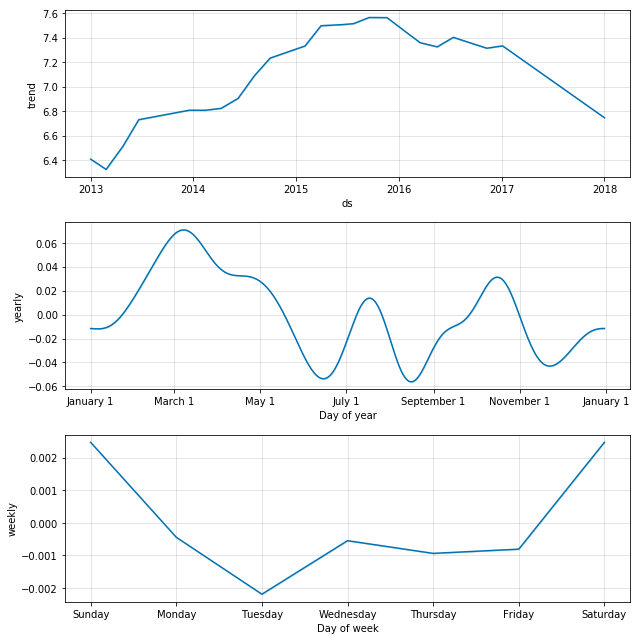

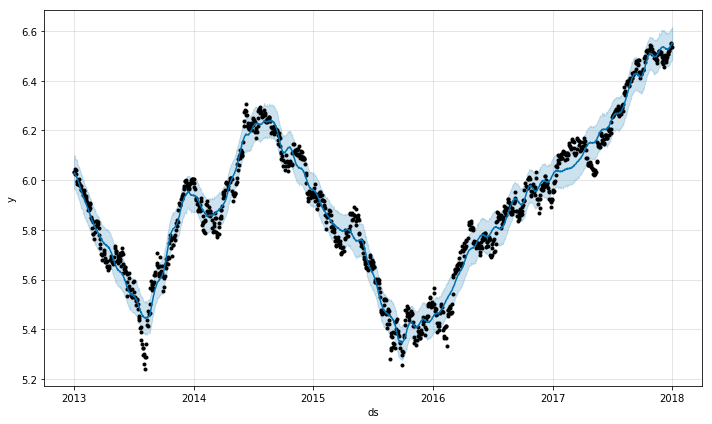

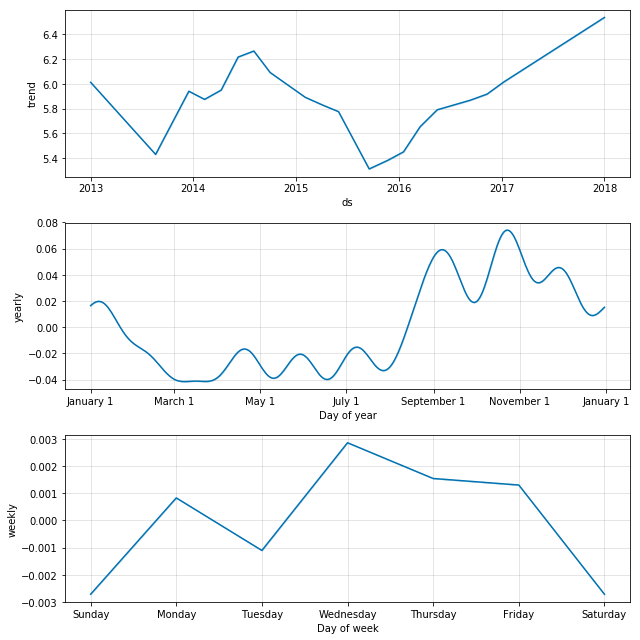

In [ ]:
# Creating tuple of stock dataframes
tup_stk_dfs = (stock1_df, stock2_df, stock3_df, stock4_df, stock5_df)

stock1_df, stock2_df, stock3_df, stock4_df, stock5_df = add_vars_to_stock_df(tup_stk_dfs, tickers_for_model)


# EDA, FEATURE SELECTION & MODEL BUILDING FOR STOCK-1

In [ ]:
stock1_df.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  131.500000  134.699997  131.500000  134.149994  128.415146   
2013-01-02  136.449997  137.100006  134.500000  135.000000  129.228821   
2013-01-03  135.649994  136.000000  133.100006  134.399994  128.654480   
2013-01-04  133.050003  133.800003  130.800003  132.550003  126.883568   
2013-01-07  133.000000  136.000000  132.250000  134.399994  128.654480   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  7134099  133.49  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  6934542  136.12  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  4968022  134.52  5993.250000  1462.420044  13412.549805    ...      
2013-01-04  5798690  132.20  6009.500000  1459.369995  13391.360352    ...      
2013-01-07  5957987  134.55  6016.149902  1466.469971  13435.209961    ...      

                 kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date                                                                
2013-01-01  60.937463  53.645821  53.645821  75.520748  75.520748   
2013-01-02  61.458287  56.249976  56.249976  71.874907  71.874907   
2013-01-03  58.234042  56.911331  56.911331  60.879462  60.879462   
2013-01-04  48.081949  53.968204  53.968204  36.309440  36.309440   
2013-01-07  51.102195  53.012868  53.012868  47.280850  47.280850   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01    134.149994    134.149994  0.000000  0.000000  0.000000  
2013-01-02    134.610414    134.591343  0.019071  0.010595  0.016952  
2013-01-03    134.528287    134.522593  0.005694  0.008586 -0.005785  
2013-01-04    133.903820    133.971143 -0.067323 -0.017128 -0.100390  
2013-01-07    134.038629    134.070596 -0.031967 -0.021543 -0.020849  

[5 rows x 54 columns]

In [ ]:
stock1_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

### EDA for Stock-1

In [ ]:
stock1_df.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  131.500000  134.699997  131.500000  134.149994  128.415146   
2013-01-02  136.449997  137.100006  134.500000  135.000000  129.228821   
2013-01-03  135.649994  136.000000  133.100006  134.399994  128.654480   
2013-01-04  133.050003  133.800003  130.800003  132.550003  126.883568   
2013-01-07  133.000000  136.000000  132.250000  134.399994  128.654480   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  7134099  133.49  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  6934542  136.12  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  4968022  134.52  5993.250000  1462.420044  13412.549805    ...      
2013-01-04  5798690  132.20  6009.500000  1459.369995  13391.360352    ...      
2013-01-07  5957987  134.55  6016.149902  1466.469971  13435.209961    ...      

                 kdjk     kdjd_9       kdjd     kdjj_9       kdjj  \
date                                                                
2013-01-01  60.937463  53.645821  53.645821  75.520748  75.520748   
2013-01-02  61.458287  56.249976  56.249976  71.874907  71.874907   
2013-01-03  58.234042  56.911331  56.911331  60.879462  60.879462   
2013-01-04  48.081949  53.968204  53.968204  36.309440  36.309440   
2013-01-07  51.102195  53.012868  53.012868  47.280850  47.280850   

            close_12_ema  close_26_ema      macd     macds     macdh  
date                                                                  
2013-01-01    134.149994    134.149994  0.000000  0.000000  0.000000  
2013-01-02    134.610414    134.591343  0.019071  0.010595  0.016952  
2013-01-03    134.528287    134.522593  0.005694  0.008586 -0.005785  
2013-01-04    133.903820    133.971143 -0.067323 -0.017128 -0.100390  
2013-01-07    134.038629    134.070596 -0.031967 -0.021543 -0.020849  

[5 rows x 54 columns]

In [ ]:
stock1_df.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ds', 'ts_close_pr', 'day_of_week',
       'le_day_of_week', 'close_-1_s', 'tr', 'atr', 'wr_10', 'rsv_9', 'kdjk_9',
       'kdjk', 'kdjd_9', 'kdjd', 'kdjj_9', 'kdjj', 'close_12_ema',
       'close_26_ema', 'macd', 'macds', 'macdh'],
      dtype='object')

In [ ]:
#stock1_df.drop(['ds', 'day_of_week', 'close_-1_s', 'rsv_9', 'kdjk_9', 'kdjd_9', 'kdjj_9', 'close_12_ema', 'close_26_ema'], axis=1, inplace=True)

In [ ]:
temp_stock1 = stock1_df[['open', 'high', 'low', 'close', 'adj close', 'volume',
                         'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'pcod', 'hld',
                         'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul',
                         'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b',
                         'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a',
                         'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
                         'beta', 'ts_close_pr','le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk',
                         'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].copy(deep=True)
temp_stock1.head()

open        high         low       close   adj close  \
date                                                                     
2013-01-01  131.500000  134.699997  131.500000  134.149994  128.415146   
2013-01-02  136.449997  137.100006  134.500000  135.000000  129.228821   
2013-01-03  135.649994  136.000000  133.100006  134.399994  128.654480   
2013-01-04  133.050003  133.800003  130.800003  132.550003  126.883568   
2013-01-07  133.000000  136.000000  132.250000  134.399994  128.654480   

             volume    vwap          nse          spy            dj    ...     \
date                                                                   ...      
2013-01-01  7134099  133.49  5993.250000  1462.420044  13412.549805    ...      
2013-01-02  6934542  136.12  5993.250000  1462.420044  13412.549805    ...      
2013-01-03  4968022  134.52  5993.250000  1462.420044  13412.549805    ...      
2013-01-04  5798690  132.20  6009.500000  1459.369995  13391.360352    ...      
2013-01-07  5957987  134.55  6016.149902  1466.469971  13435.209961    ...      

            le_day_of_week        tr       atr      wr_10       kdjk  \
date                                                                   
2013-01-01               3       NaN       NaN  17.187610  60.937463   
2013-01-02               4  2.950012  2.950012  37.500067  61.458287   
2013-01-03               2  2.899994  2.924077  48.214448  58.234042   
2013-01-04               0  3.599991  3.166269  72.222235  48.081949   
2013-01-07               1  3.750000  3.328802  42.857313  51.102195   

                 kdjd       kdjj      macd     macds     macdh  
date                                                            
2013-01-01  53.645821  75.520748  0.000000  0.000000  0.000000  
2013-01-02  56.249976  71.874907  0.019071  0.010595  0.016952  
2013-01-03  56.911331  60.879462  0.005694  0.008586 -0.005785  
2013-01-04  53.968204  36.309440 -0.067323 -0.017128 -0.100390  
2013-01-07  53.012868  47.280850 -0.031967 -0.021543 -0.020849  

[5 rows x 45 columns]

In [ ]:
# Summary statistics of numeric data

temp_stock1.describe().T

count          mean           std           min  \
open                 1233.0  1.412533e+02  4.892971e+01     62.450001   
high                 1233.0  1.436501e+02  4.950514e+01     64.849998   
low                  1233.0  1.387030e+02  4.827254e+01     58.799999   
close                1233.0  1.411345e+02  4.892772e+01     60.900002   
adj close            1233.0  1.386851e+02  4.942090e+01     60.238174   
volume               1233.0  9.309993e+06  4.757248e+06      0.000000   
vwap                 1233.0  1.412016e+02  4.887151e+01     60.840000   
nse                  1233.0  7.846945e+03  1.320167e+03   5285.000000   
spy                  1233.0  2.035234e+03  2.781516e+02   1457.150024   
dj                   1233.0  1.780870e+04  2.393866e+03  13328.849609   
nasdaq               1233.0  4.814814e+03  9.320508e+02   3091.810059   
pcod                 1232.0  2.322647e-01  1.343457e+00    -16.699997   
hld                  1233.0  4.947039e+00  2.565210e+00      0.000000   
rsi                  1214.0  5.112961e+01  1.466814e+01      9.562431   
bbul                 1214.0  1.516843e+02  5.010097e+01     72.474000   
bbll                 1214.0  1.289016e+02  4.582509e+01     57.602000   
stma                 1214.0  1.402929e+02  4.777013e+01     67.590001   
ltma                 1114.0  1.368602e+02  4.075490e+01     76.448334   
ema                  1215.0  1.403032e+02  4.758756e+01     68.368261   
scul                 1233.0  5.839416e-02  2.345824e-01      0.000000   
scll                 1233.0  5.271695e-02  2.235585e-01      0.000000   
stma_cut_ltma_b      1233.0  3.244120e-03  5.688779e-02      0.000000   
stma_cut_ltma_a      1233.0  2.433090e-03  4.928631e-02      0.000000   
close_pr_cut_stma_b  1233.0  4.785077e-02  2.135370e-01      0.000000   
close_pr_cut_stma_a  1233.0  4.703974e-02  2.118098e-01      0.000000   
close_pr_cut_ltma_b  1233.0  1.459854e-02  1.199879e-01      0.000000   
close_pr_cut_ltma_a  1233.0  1.378751e-02  1.166553e-01      0.000000   
dr_stock             1232.0  9.255871e-04  2.530442e-02     -0.096712   
dr_nse               1232.0  4.957585e-04  9.184660e-03     -0.059151   
dr_spy               1232.0  5.215536e-04  7.412119e-03     -0.039414   
dr_dj                1232.0  5.259500e-04  7.166570e-03     -0.035748   
dr_nasdaq            1232.0  6.905050e-04  8.730244e-03     -0.041152   
price_movmnt         1232.0  5.097403e-01  5.001081e-01      0.000000   
beta                 1233.0  5.571200e+00  1.389711e+02  -1009.670000   
ts_close_pr          1233.0  1.408525e+02  4.815443e+01     72.859616   
le_day_of_week       1233.0  2.021898e+00  1.412608e+00      0.000000   
tr                   1232.0  5.138879e+00  2.695119e+00      0.000000   
atr                  1232.0  5.096431e+00  1.536828e+00      2.399940   
wr_10                1233.0  4.789694e+01  2.940754e+01      1.632629   
kdjk                 1233.0  5.194665e+01  2.324353e+01      6.533189   
kdjd                 1233.0  5.188750e+01  2.067463e+01     10.240572   
kdjj                 1233.0  5.206496e+01  3.477700e+01    -14.126530   
macd                 1233.0  7.194997e-01  3.622050e+00     -7.688475   
macds                1233.0  7.112497e-01  3.406067e+00     -7.330008   
macdh                1233.0  1.649997e-02  2.199095e+00     -6.112852   

                              25%           50%           75%           max  
open                 1.032500e+02  1.349000e+02  1.706000e+02  2.770000e+02  
high                 1.053500e+02  1.368000e+02  1.743500e+02  2.788000e+02  
low                  1.014000e+02  1.321500e+02  1.672000e+02  2.732000e+02  
close                1.035500e+02  1.344000e+02  1.701000e+02  2.765000e+02  
adj close            1.000013e+02  1.312381e+02  1.671188e+02  2.765000e+02  
volume               6.134457e+06  8.349284e+06  1.135465e+07  4.349693e+07  
vwap                 1.033000e+02  1.345200e+02  1.710700e+02  2.755300e+02  
nse                  6.641750e+03  8.05

In [ ]:
temp_stock1.isnull().sum()

open                     0
high                     0
low                      0
close                    0
adj close                0
volume                   0
vwap                     0
nse                      0
spy                      0
dj                       0
nasdaq                   0
pcod                     1
hld                      0
rsi                     19
bbul                    19
bbll                    19
stma                    19
ltma                   119
ema                     18
scul                     0
scll                     0
stma_cut_ltma_b          0
stma_cut_ltma_a          0
close_pr_cut_stma_b      0
close_pr_cut_stma_a      0
close_pr_cut_ltma_b      0
close_pr_cut_ltma_a      0
dr_stock                 1
dr_nse                   1
dr_spy                   1
dr_dj                    1
dr_nasdaq                1
price_movmnt             1
beta                     0
ts_close_pr              0
le_day_of_week           0
tr                       1
a

In [ ]:
temp_stock1['ltma'].head(130)

date
2013-01-01           NaN
2013-01-02           NaN
2013-01-03           NaN
2013-01-04           NaN
2013-01-07           NaN
2013-01-08           NaN
2013-01-09           NaN
2013-01-10           NaN
2013-01-11           NaN
2013-01-14           NaN
2013-01-15           NaN
2013-01-16           NaN
2013-01-17           NaN
2013-01-18           NaN
2013-01-21           NaN
2013-01-22           NaN
2013-01-23           NaN
2013-01-24           NaN
2013-01-25           NaN
2013-01-28           NaN
2013-01-29           NaN
2013-01-30           NaN
2013-01-31           NaN
2013-02-01           NaN
2013-02-04           NaN
2013-02-05           NaN
2013-02-06           NaN
2013-02-07           NaN
2013-02-08           NaN
2013-02-11           NaN
                 ...    
2013-05-28           NaN
2013-05-29           NaN
2013-05-30           NaN
2013-05-31           NaN
2013-06-03           NaN
2013-06-04           NaN
2013-06-05           NaN
2013-06-06           NaN
2013-06-07          

In [ ]:
# Removing first 120 rows of the dataframe to drop NaNs in the first 120 rows containing 'ltma'=NaN

temp_stock1 = temp_stock1.iloc[120:]

In [ ]:
temp_stock1['ltma'].head()

date
2013-06-25    105.239584
2013-06-26    104.903750
2013-06-27    104.582084
2013-06-28    104.309167
2013-07-01    104.038334
Name: ltma, dtype: float64

In [ ]:
temp_stock1.isnull().sum()

open                   0
high                   0
low                    0
close                  0
adj close              0
volume                 0
vwap                   0
nse                    0
spy                    0
dj                     0
nasdaq                 0
pcod                   0
hld                    0
rsi                    0
bbul                   0
bbll                   0
stma                   0
ltma                   0
ema                    0
scul                   0
scll                   0
stma_cut_ltma_b        0
stma_cut_ltma_a        0
close_pr_cut_stma_b    0
close_pr_cut_stma_a    0
close_pr_cut_ltma_b    0
close_pr_cut_ltma_a    0
dr_stock               0
dr_nse                 0
dr_spy                 0
dr_dj                  0
dr_nasdaq              0
price_movmnt           0
beta                   0
ts_close_pr            0
le_day_of_week         0
tr                     0
atr                    0
wr_10                  0
kdjk                   0


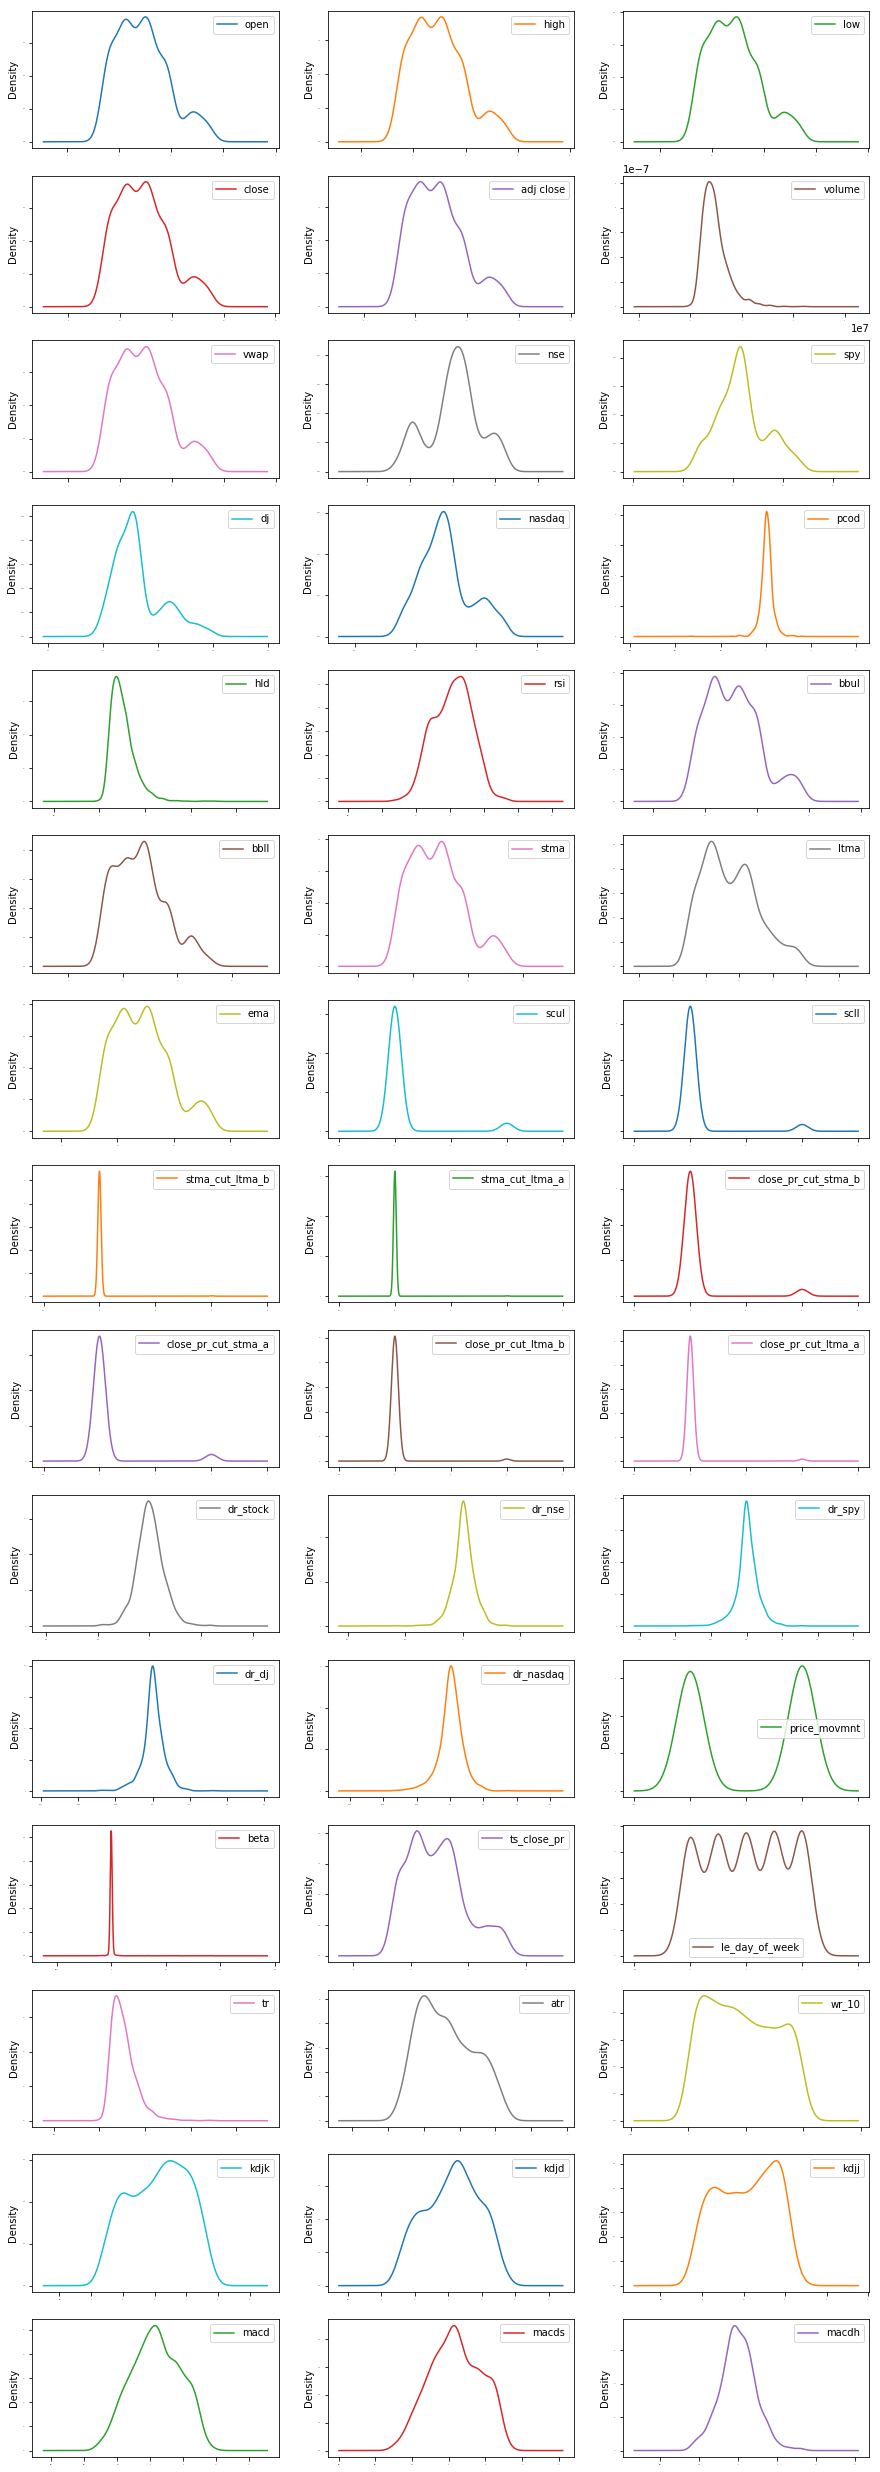

In [ ]:
# density plots

temp_stock1.plot(kind='density', subplots=True, layout=(15,3), sharex=False, fontsize=1, figsize=(15,45))
plt.show()


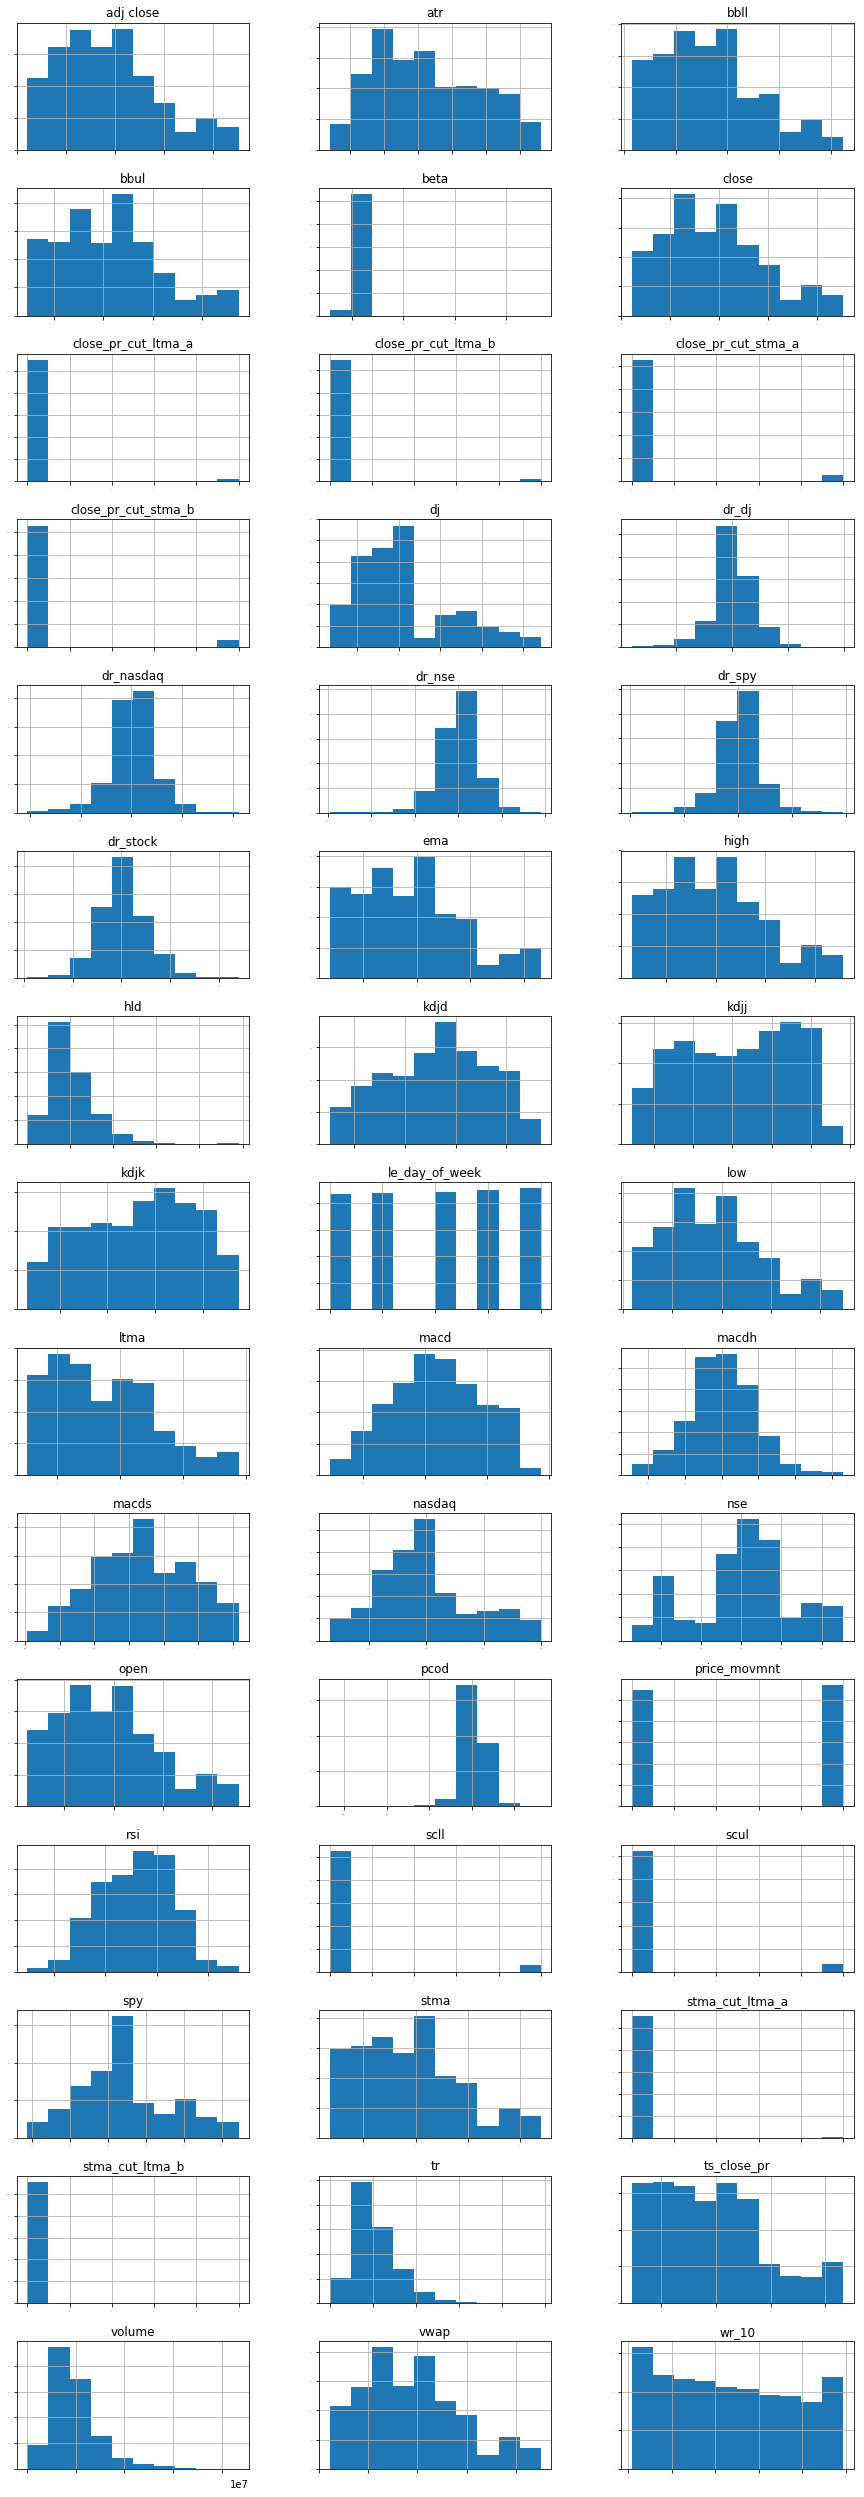

In [ ]:
# histograms

temp_stock1.hist(layout=(15,3), sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(15,45))
plt.show()


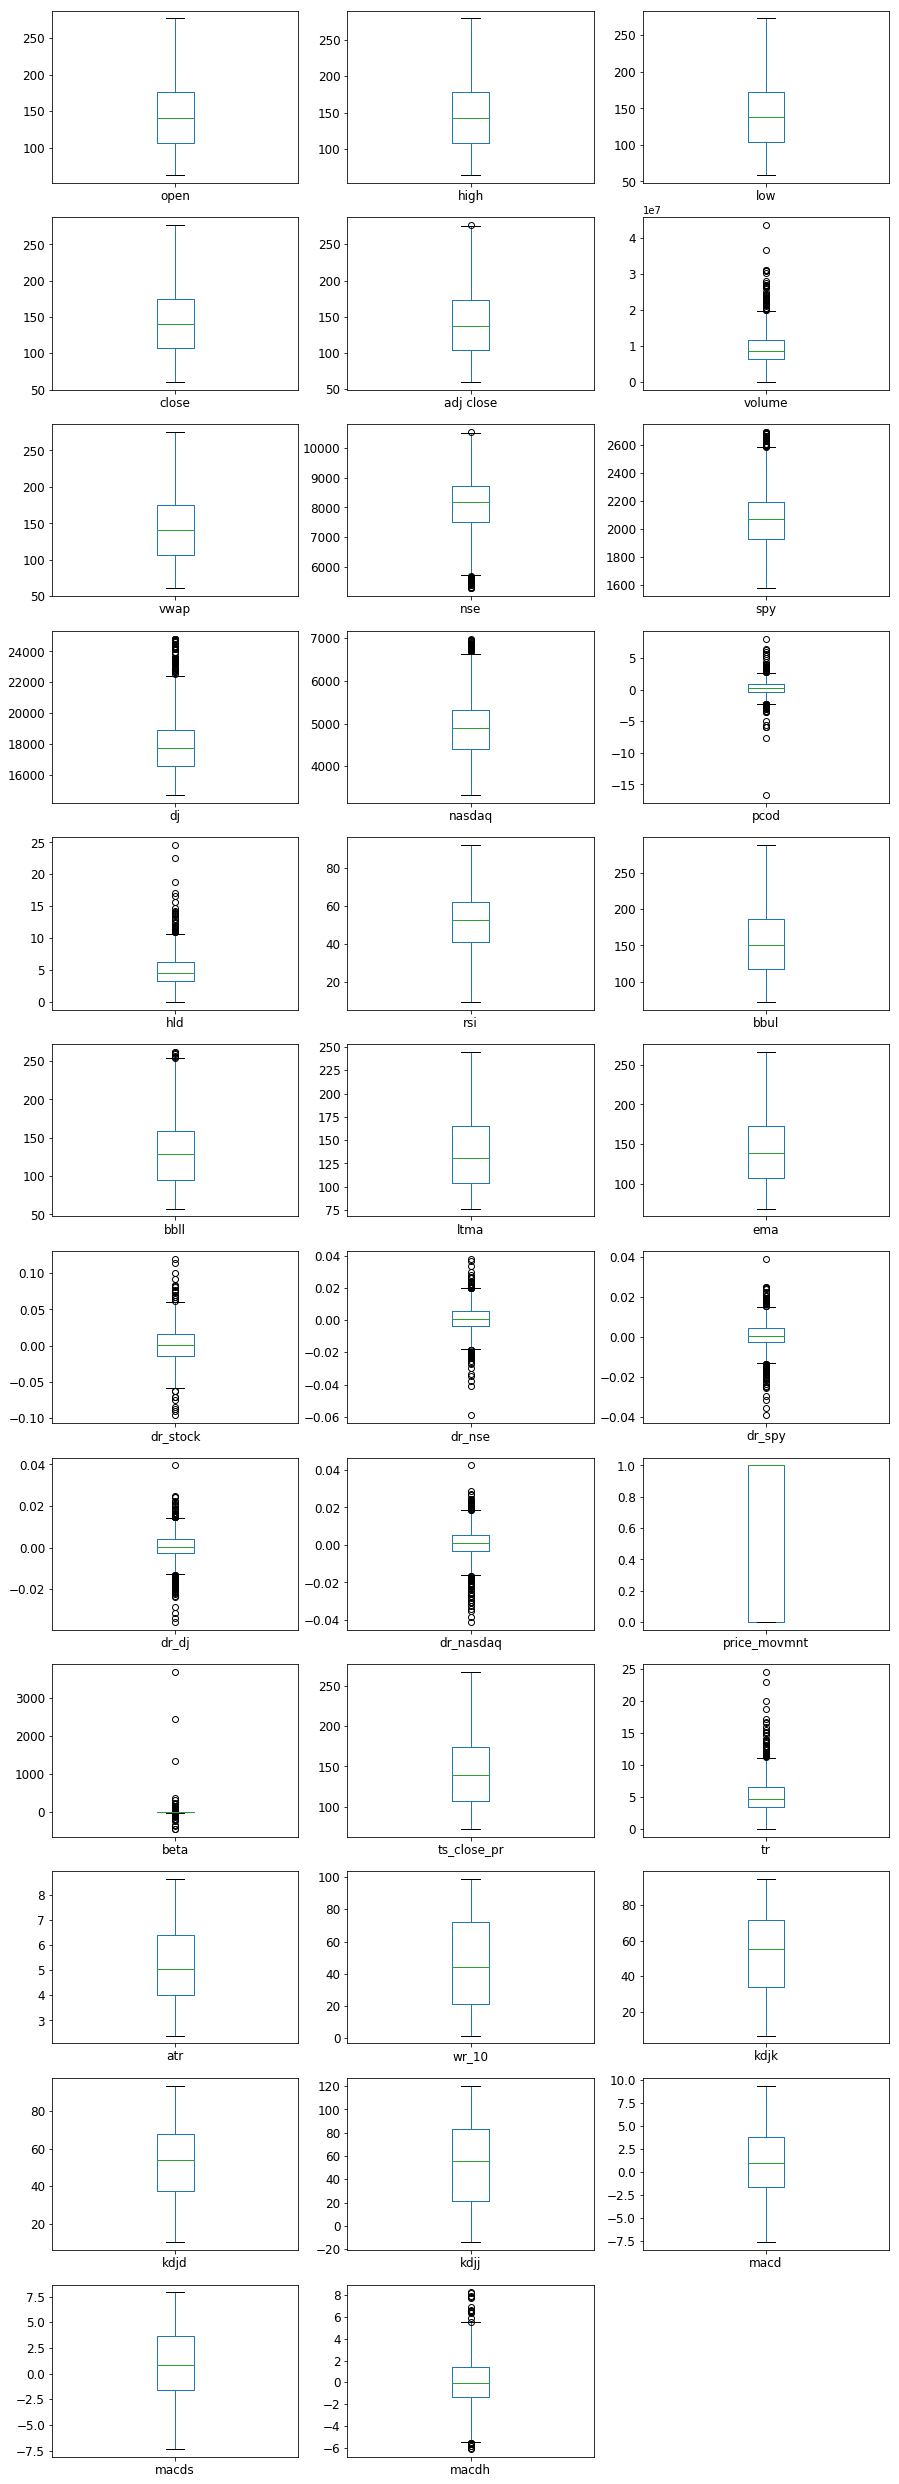

In [ ]:
# Box and whisker plots

temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'ltma',
'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt',
'beta', 'ts_close_pr', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd',
'macds', 'macdh']].plot(kind='box', subplots=True, layout=(12,3), sharex=False, sharey=False, fontsize=12, figsize=(15,45))
plt.show()


In [ ]:
temp_stock1['scul'].value_counts()

0    1046
1      67
Name: scul, dtype: int64

In [ ]:
temp_stock1['scll'].value_counts()

0    1056
1      57
Name: scll, dtype: int64

In [ ]:
temp_stock1['stma_cut_ltma_b'].value_counts()

0    1109
1       4
Name: stma_cut_ltma_b, dtype: int64

In [ ]:
temp_stock1['stma_cut_ltma_a'].value_counts()

0    1110
1       3
Name: stma_cut_ltma_a, dtype: int64

In [ ]:
temp_stock1['close_pr_cut_stma_b'].value_counts()

0    1056
1      57
Name: close_pr_cut_stma_b, dtype: int64

In [ ]:
temp_stock1['close_pr_cut_stma_a'].value_counts()

0    1057
1      56
Name: close_pr_cut_stma_a, dtype: int64

In [ ]:
temp_stock1['close_pr_cut_ltma_b'].value_counts()

0    1095
1      18
Name: close_pr_cut_ltma_b, dtype: int64

In [ ]:
temp_stock1['close_pr_cut_ltma_a'].value_counts()

0    1096
1      17
Name: close_pr_cut_ltma_a, dtype: int64

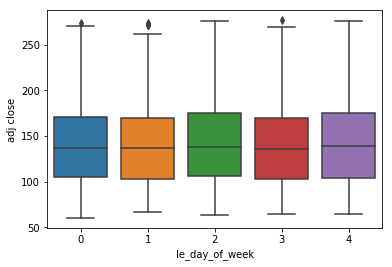

In [ ]:
sns.boxplot(x="le_day_of_week", y="adj close", data=temp_stock1)

In [ ]:
temp_stock1['price_movmnt'].value_counts()

1.0    569
0.0    544
Name: price_movmnt, dtype: int64

In [ ]:
temp1 = temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'price_movmnt']] 
temp2 = temp_stock1[['volume', 'vwap', 'nse', 'spy', 'dj', 'price_movmnt']] 
temp3 = temp_stock1[['nasdaq', 'pcod', 'hld', 'rsi', 'stma', 'price_movmnt']] 
temp4 = temp_stock1[['ltma', 'ema', 'dr_stock', 'dr_nse', 'dr_spy', 'price_movmnt']]  
temp5 = temp_stock1[['dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week', 'price_movmnt']] 
temp6 = temp_stock1[['tr', 'atr','wr_10', 'kdjk', 'kdjd', 'price_movmnt']]  
temp7 = temp_stock1[['kdjj', 'macd', 'macds', 'macdh', 'price_movmnt']] 

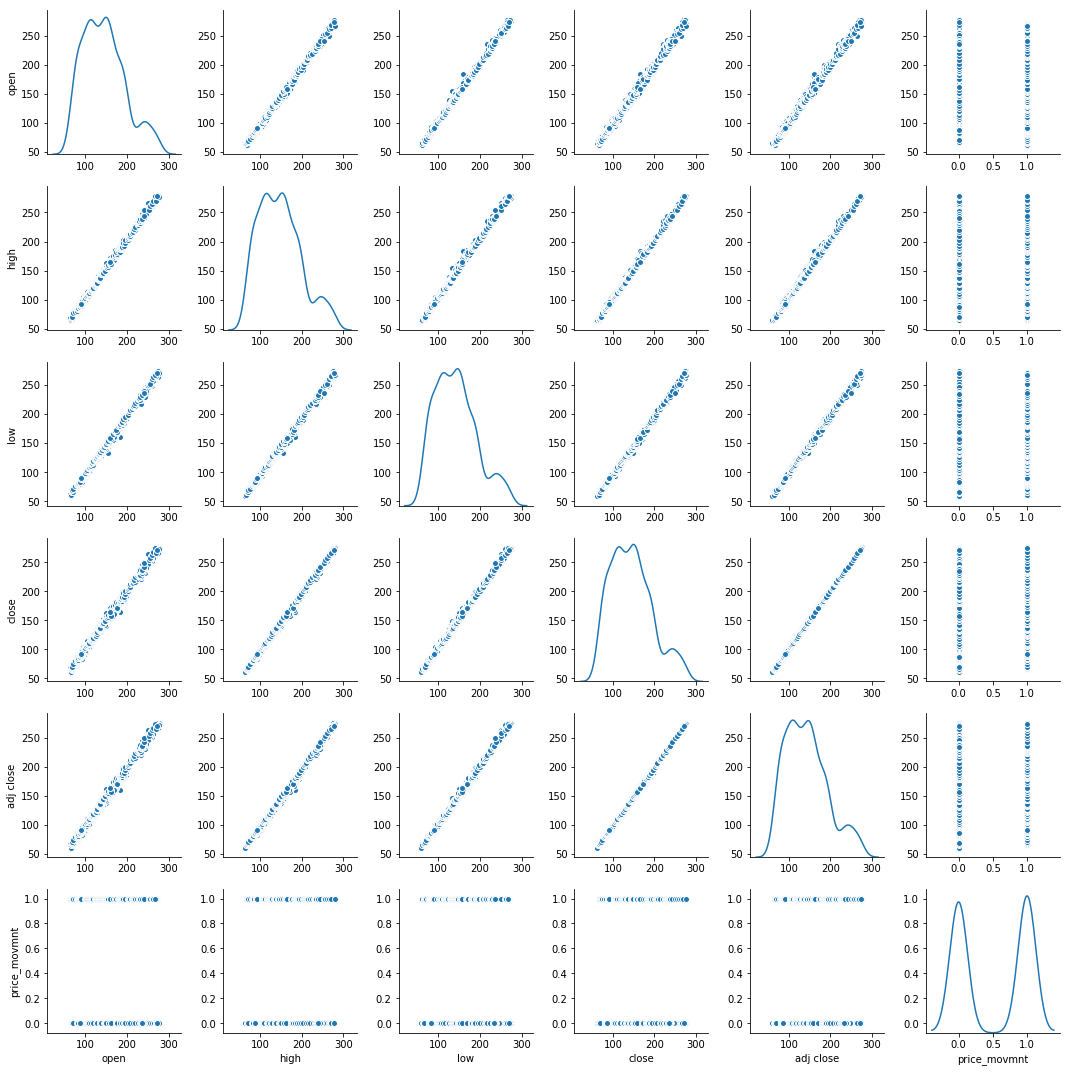

In [ ]:
sns.pairplot(temp1, diag_kind='kde')

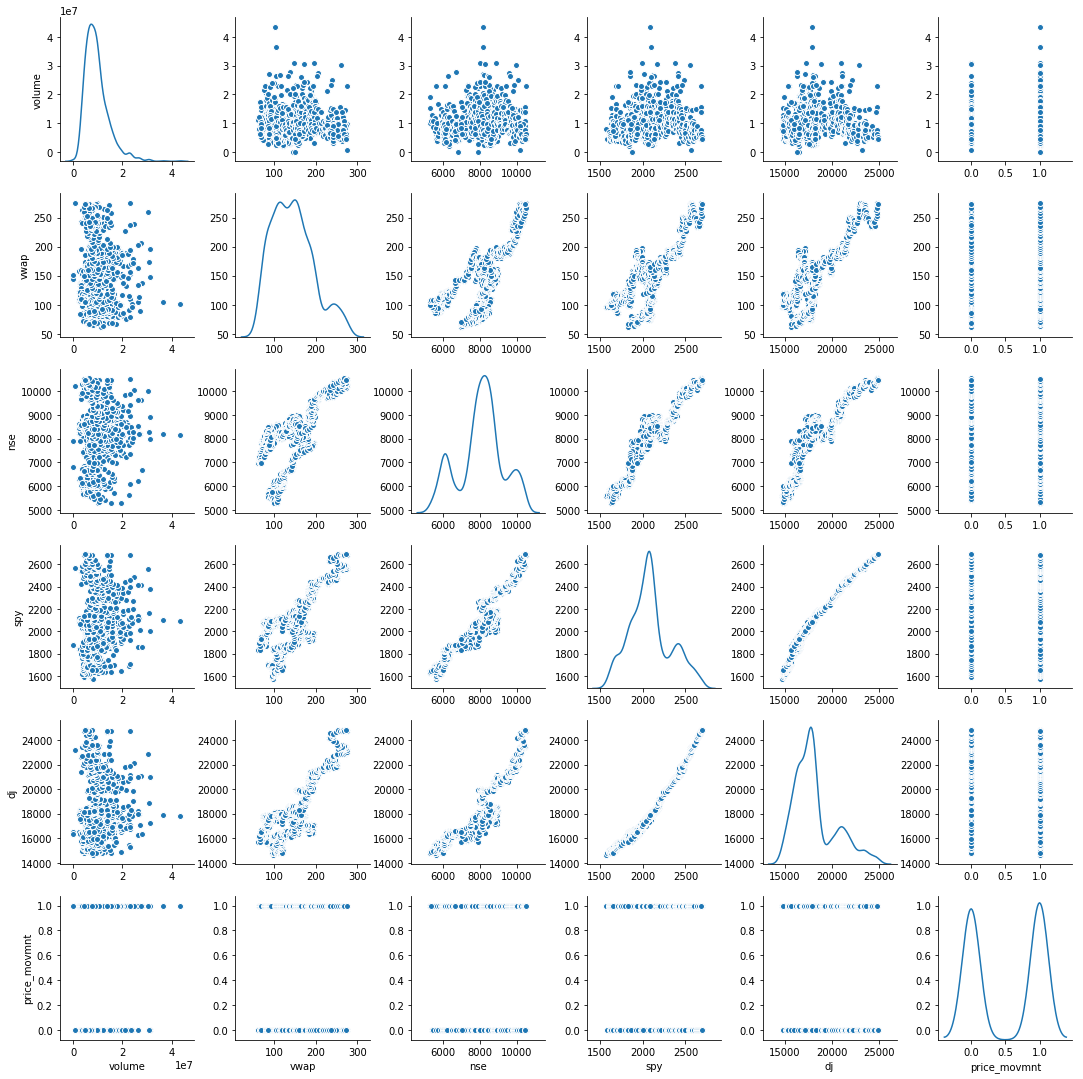

In [ ]:
sns.pairplot(temp2, diag_kind='kde')

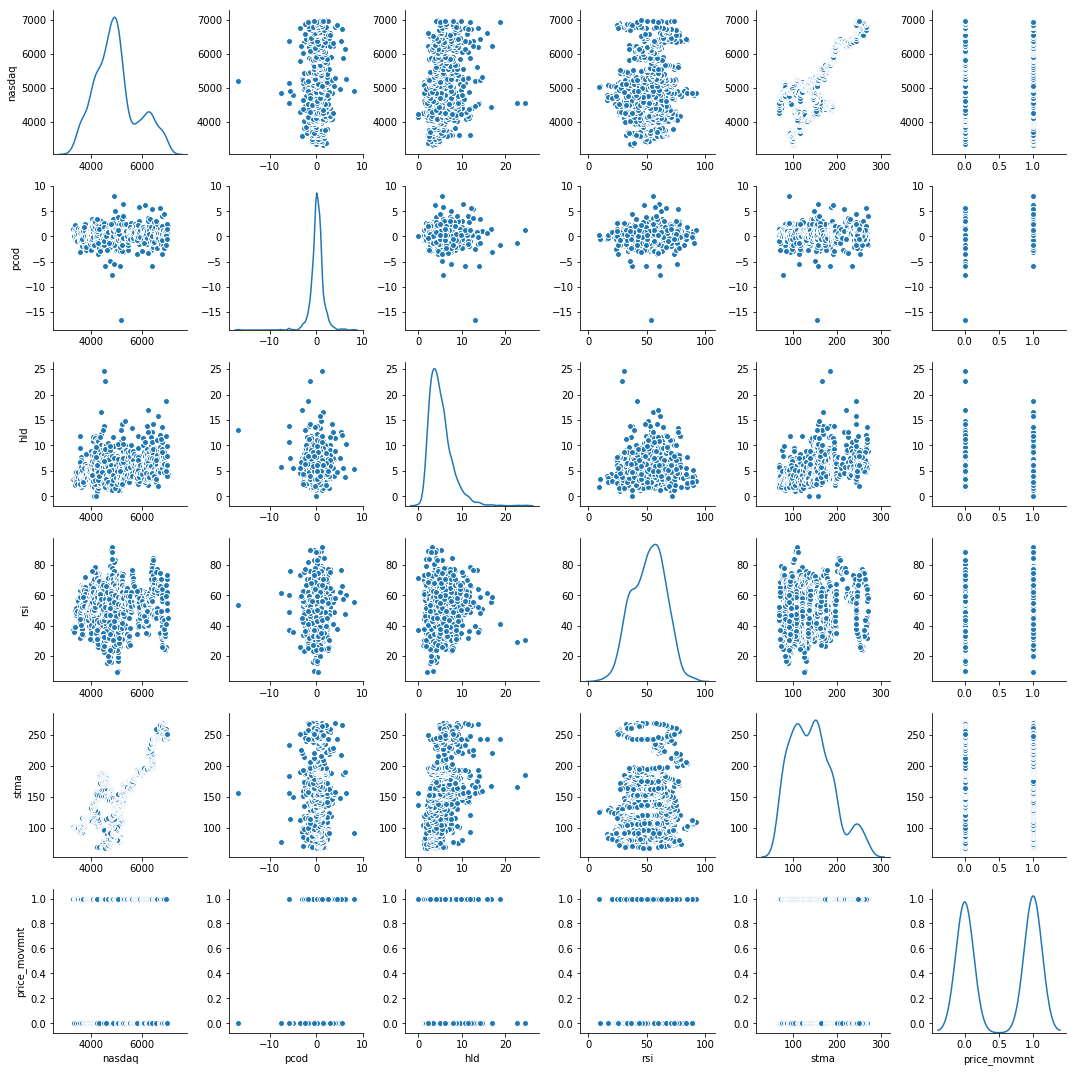

In [ ]:
sns.pairplot(temp3, diag_kind='kde')

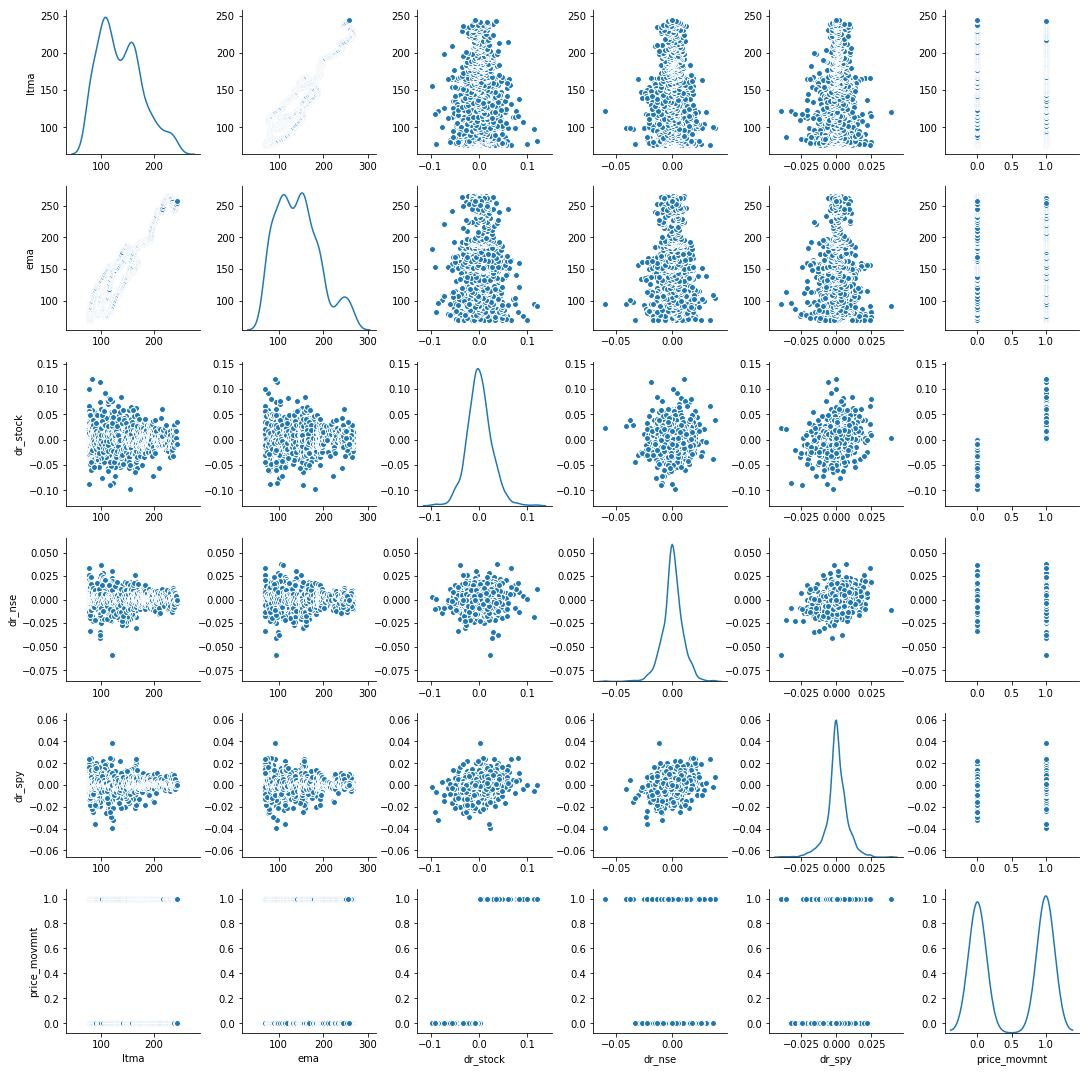

In [ ]:
sns.pairplot(temp4, diag_kind='kde')

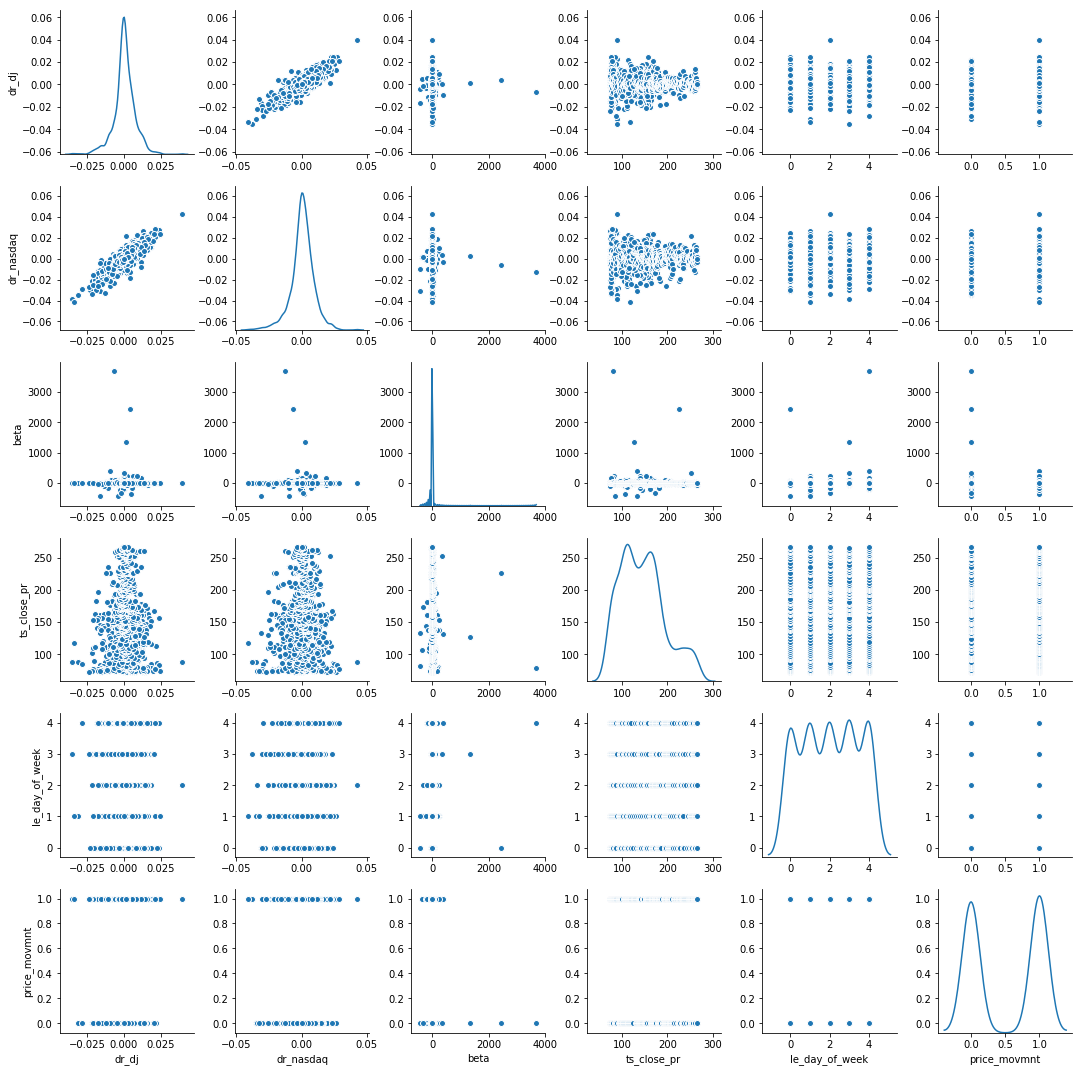

In [ ]:
sns.pairplot(temp5, diag_kind='kde')

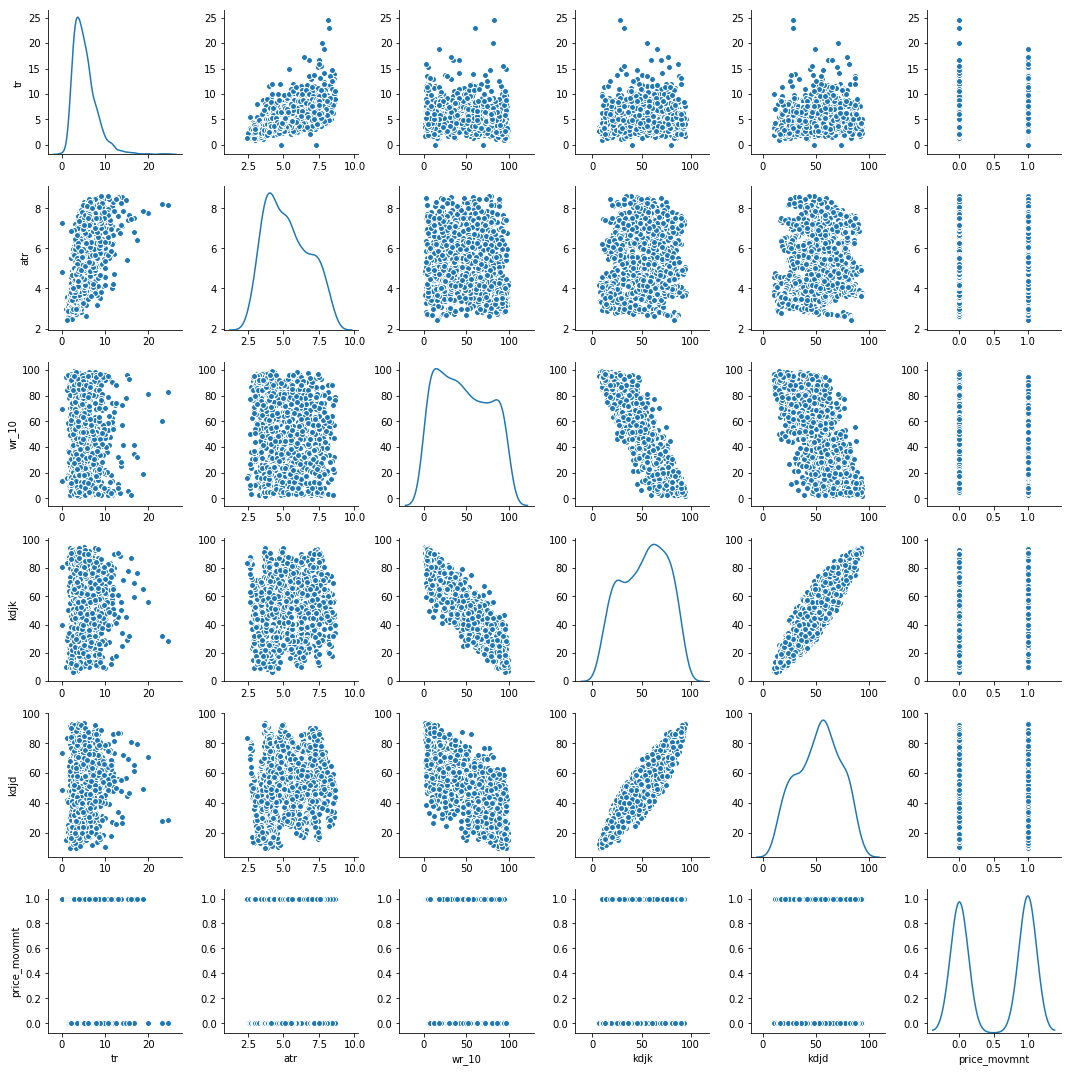

In [ ]:
sns.pairplot(temp6, diag_kind='kde')

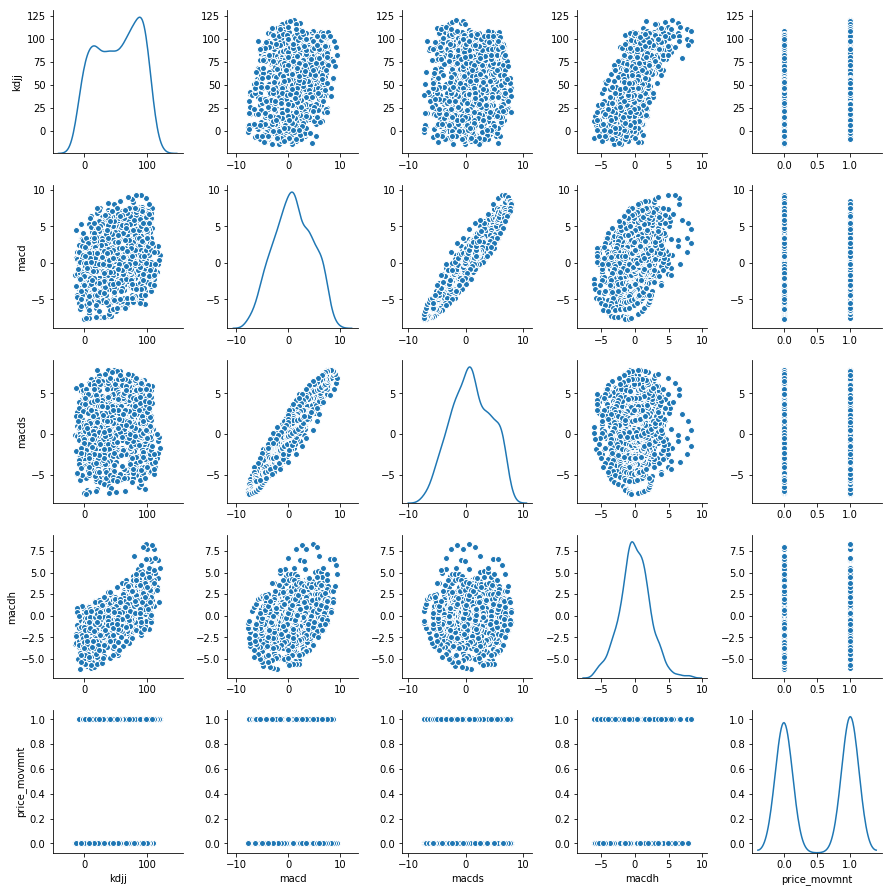

In [ ]:
sns.pairplot(temp7, diag_kind='kde')

In [ ]:
temp_stock1.head()

open        high        low       close  adj close   volume  \
date                                                                           
2013-06-25  95.599998   98.150002  94.750000   97.050003  92.901176  7980824   
2013-06-26  97.099998   97.800003  94.099998   94.699997  90.651627  4472739   
2013-06-27  96.900002   97.000000  94.800003   95.800003  91.704605  6247947   
2013-06-28  97.099998  100.650002  96.599998   99.800003  95.533607  6716298   
2013-07-01  99.000000  102.900002  98.150002  101.900002  97.543831  5796204   

              vwap          nse          spy            dj    ...     \
date                                                          ...      
2013-06-25   96.74  5590.250000  1573.089966  14659.559570    ...      
2013-06-26   95.35  5609.100098  1588.030029  14760.309570    ...      
2013-06-27   95.83  5588.700195  1603.260010  14910.139648    ...      
2013-06-28   99.08  5682.350098  1613.199951  15024.490234    ...      
2013-07-01  100.98  5842.200195  1606.280029  14909.599609    ...      

            le_day_of_week        tr       atr      wr_10       kdjk  \
date                                                                   
2013-06-25               3  4.050004  4.759410  57.986096  40.606569   
2013-06-26               4  3.700005  4.683728  74.305580  35.375128   
2013-06-27               2  2.300003  4.513442  67.368414  34.460614   
2013-06-28               0  4.849999  4.537485  39.298239  43.207663   
2013-07-01               1  4.750000  4.552666  24.561404  53.951308   

                 kdjd       kdjj      macd     macds     macdh  
date                                                            
2013-06-25  46.612194  28.595321 -1.777242 -1.161831 -1.230822  
2013-06-26  42.866505  20.392374 -1.961514 -1.321768 -1.279492  
2013-06-27  40.064541  23.252759 -1.995789 -1.456572 -1.078434  
2013-06-28  41.112249  47.398492 -1.680831 -1.501424 -0.358815  
2013-07-01  45.391935  71.070053 -1.247404 -1.450620  0.406432  

[5 rows x 45 columns]

In [ ]:
temp_stock1.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

In [ ]:
temp_stock1[['pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'scul', 'scll']].head(50)

pcod        hld        rsi     bbul    bbll        stma  \
date                                                                      
2013-06-25  1.500000   3.400002  37.500000  109.510  91.205  100.357500   
2013-06-26  0.049995   3.700005  35.760366  107.819  91.351   99.585000   
2013-06-27  2.200005   2.199997  39.385214  106.676  91.389   99.032500   
2013-06-28  1.299995   4.050004  47.480622  106.392  91.413   98.902500   
2013-07-01 -0.800003   4.750000  50.474383  106.455  91.400   98.927500   
2013-07-02 -0.099999   3.299995  51.518025  106.654  91.361   99.007500   
2013-07-03 -0.899994   4.000000  46.703298  106.296  91.360   98.827500   
2013-07-04  0.449996   2.800004  47.377937  105.931  91.434   98.682500   
2013-07-05  1.100006   4.700005  48.161765  105.695  91.470   98.582500   
2013-07-08 -0.899994   4.250000  49.577469  105.649  91.471   98.560001   
2013-07-09  0.849998   2.449997  56.813418  105.753  92.017   98.885001   
2013-07-10  0.400002   3.800003  56.107654  105.326  93.034   99.180000   
2013-07-11  1.700005   4.700005  56.198346  105.722  93.238   99.480000   
2013-07-12  0.299995   2.800003  47.826089  105.421  93.354   99.387500   
2013-07-15 -0.200005   5.949997  53.820226  106.073  93.042   99.557500   
2013-07-16 -2.900002   2.400002  52.869756  106.449  92.926   99.687500   
2013-07-17 -0.200005   3.650002  47.291196  106.064  93.071   99.567500   
2013-07-18  0.500000   3.199996  58.260871  106.679  93.121   99.900000   
2013-07-19 -0.200005   1.900002  62.953021  106.755  94.010  100.382501   
2013-07-22 -0.349999   3.250000  63.540289  106.770  95.020  100.895001   
2013-07-23  0.650002   2.250000  61.344535  107.175  95.425  101.300001   
2013-07-24 -0.700005   3.450005  62.127664  106.765  96.690  101.727501   
2013-07-25 -0.250000   2.399994  59.090902  106.243  97.852  102.047500   
2013-07-26  0.100006   9.399994  43.132212  107.108  96.452  101.780000   
2013-07-29  1.050003   6.199996  36.162359  108.507  93.928  101.217500   
2013-07-30  0.400001   6.450005  31.977404  110.204  90.636  100.420000   
2013-07-31  0.000000   6.300003  40.067716  110.790  89.170   99.980000   
2013-08-01  0.900002   5.599998  36.423124  111.524  87.191   99.357500   
2013-08-02  0.599998   4.449997  35.798502  112.105  85.285   98.695000   
2013-08-05  0.300003   2.700005  35.218783  112.483  83.522   98.002500   
2013-08-06 -1.000000   2.400002  33.688705  112.670  81.805   97.237500   
2013-08-07 -0.050003   4.750000  37.057525  112.802  80.503   96.652501   
2013-08-08  0.000000   6.200005  37.882086  112.120  80.075   96.097500   
2013-08-12  1.100006   4.849998  41.781547  111.525  79.895   95.710000   
2013-08-13 -2.050003   4.200005  34.848484  110.248  79.772   95.010000   
2013-08-14  0.750000   7.250000  44.466014  109.468  79.982   94.725000   
2013-08-16 -0.849999   5.750000  42.289934  108.663  79.952   94.307500   
2013-08-19 -0.550003   5.950005  42.289934  107.475  80.305   93.890000   
2013-08-20 -3.050003   6.399994  44.241311  106.482  80.668   93.575000   
2013-08-21  1.650002   7.800004  40.482344  104.892  81.153   93.022500   
2013-08-22  1.449997  11.750000  49.153788  104.596  81.334   92.965000   
2013-08-23  0.300003   4.750000  50.415097  104.728  81.257   92.992500   
2013-08-26  0.099999   5.000000  51.671737  105.236  80.969   93.102501   
2013-08-27 -2.000000   6.800003  53.712486  105.759  80.916   93.337501   
2013-08-28 -0.800004   6.750000  59.167336  106.855  80.965   93.910001   
2013-08-29  0.900002   6.400002  66.271730  108.657  81.223   94.940000   
2013-08-30 -0.699996   7.199997  62.105275  109.914  81.461   95.687501   
2013-09-02 -0.050003   4.800003  67.010319  111.608  81.912   96.760001   
2013-09-03  0.450005   6.650002  63.248517  112.073  83.217   97.645001   
2013-09-04  0.349998   5.650002  65.768968  112.931  84.584   98.757501   

                  ltma         ema  scul  scll  
date                                            
2013-06-25  105.2

In [ ]:
temp_stock1[['stma_cut_ltma_b', 'stma_cut_ltma_a', 'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].head(50)

stma_cut_ltma_b  stma_cut_ltma_a  close_pr_cut_stma_b  \
date                                                                
2013-06-25                0                0                    0   
2013-06-26                0                0                    0   
2013-06-27                0                0                    0   
2013-06-28                0                0                    1   
2013-07-01                0                0                    0   
2013-07-02                0                0                    0   
2013-07-03                0                0                    0   
2013-07-04                0                0                    0   
2013-07-05                0                0                    0   
2013-07-08                0                0                    0   
2013-07-09                0                0                    0   
2013-07-10                0                0                    0   
2013-07-11                0                0                    1   
2013-07-12                0                0                    0   
2013-07-15                0                0                    0   
2013-07-16                0                0                    0   
2013-07-17                0                0                    0   
2013-07-18                0                0                    0   
2013-07-19                0                0                    0   
2013-07-22                0                0                    0   
2013-07-23                1                0                    0   
2013-07-24                0                0                    0   
2013-07-25                0                0                    0   
2013-07-26                0                0                    0   
2013-07-29                0                0                    0   
2013-07-30                0                1                    0   
2013-07-31                0                0                    0   
2013-08-01                0                0                    0   
2013-08-02                0                0                    0   
2013-08-05                0                0                    0   
2013-08-06                0                0                    0   
2013-08-07                0                0                    0   
2013-08-08                0                0                    0   
2013-08-12                0                0                    0   
2013-08-13                0                0                    0   
2013-08-14                0                0                    1   
2013-08-16                0                0                    0   
2013-08-19                0                0                    1   
2013-08-20                0                0                    0   
2013-08-21                0                0                    0   
2013-08-22                0                0                    0   
2013-08-23                0                0                    0   
2013-08-26                0                0                    0   
2013-08-27                0                0                    0   
2013-08-28                0                0                    0   
2013-08-29                0                0                    0   
2013-08-30                0                0                    0   
2013-09-02                0                0                    0   
2013-09-03                0                0                    0   
2013-09-04                1                0                    0   

            close_pr_cut_stma_a  close_pr_cut_ltma_b  close_pr_cut_ltma_a  
date                                                                       
2013-06-25                    0                    0                    0  
2013-06-26                    0                    0                    0  
2013-06-27                    0                    0                    0  
2013-06-28                    0            

In [ ]:
temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr']].head(50)

dr_stock    dr_nse    dr_spy     dr_dj  dr_nasdaq  price_movmnt  \
date                                                                          
2013-06-25  0.031350 -0.013656 -0.012145 -0.009449  -0.010869           1.0   
2013-06-26 -0.024214  0.003372  0.009497  0.006873   0.008170           0.0   
2013-06-27  0.011616 -0.003637  0.009590  0.010151   0.008462           1.0   
2013-06-28  0.041754  0.016757  0.006200  0.007669   0.007594           1.0   
2013-07-01  0.021042  0.028131 -0.004290 -0.007647   0.000409           1.0   
2013-07-02  0.005397  0.009697  0.005404  0.004384   0.009179           1.0   
2013-07-03 -0.034651 -0.007001 -0.000545 -0.002841  -0.000317           0.0   
2013-07-04  0.010617 -0.014793  0.000000  0.000000   0.000000           1.0   
2013-07-05  0.000000  0.011445  0.000824  0.003748   0.002991           1.0   
2013-07-08  0.002001  0.005302  0.010202  0.009839   0.010370           1.0   
2013-07-09  0.006990 -0.009603  0.005252  0.005870   0.001566           1.0   
2013-07-10 -0.026277  0.008165  0.007230  0.004969   0.005576           0.0   
2013-07-11  0.046843 -0.007220  0.000182 -0.000567   0.004709           1.0   
2013-07-12 -0.009728  0.020355  0.013554  0.011069   0.016343           0.0   
2013-07-15  0.035363  0.012451  0.003086  0.000219   0.006087           1.0   
2013-07-16 -0.014231  0.003628  0.001375  0.001291   0.002058           0.0   
2013-07-17 -0.019249 -0.012527 -0.003709 -0.002093  -0.002492           0.0   
2013-07-18  0.024534  0.003031  0.002774  0.001208   0.003196           1.0   
2013-07-19 -0.007184  0.010840  0.005033  0.005043   0.000355           0.0   
2013-07-22  0.006753 -0.001466  0.001610 -0.000309  -0.006554           1.0   
2013-07-23  0.007667  0.000431  0.002033  0.000116   0.003562           1.0   
2013-07-24 -0.018069  0.007626 -0.001852  0.001427  -0.005866           0.0   
2013-07-25 -0.010169 -0.014364 -0.003811 -0.001638   0.000092           0.0   
2013-07-26 -0.075832 -0.013855  0.002556  0.000860   0.007149           0.0   
2013-07-29 -0.040233 -0.003606  0.000828  0.000207   0.002211           0.0   
2013-07-30 -0.045780 -0.009267 -0.003736 -0.002369  -0.003880           0.0   
2013-07-31  0.041618 -0.013135  0.000374 -0.000089   0.004815           1.0   
2013-08-01 -0.028857 -0.002268 -0.000136 -0.001356   0.002738           0.0   
2013-08-02 -0.009143 -0.002464  0.012541  0.008289   0.013614           0.0   
2013-08-05 -0.004614 -0.008721  0.001640  0.001941   0.003768           0.0   
2013-08-06 -0.008691  0.001321 -0.001480 -0.002952   0.000911           0.0   
2013-08-07  0.011105 -0.025179 -0.005723 -0.005982  -0.007360           1.0   
2013-08-08  0.060116 -0.004177 -0.003806 -0.003098  -0.003208           1.0   
2013-08-12  0.025627  0.008434  0.000302 -0.002919   0.001669           1.0   
2013-08-13 -0.028177  0.008400 -0.001153 -0.000378   0.002688           0.0   
2013-08-14  0.074398  0.015484  0.002776  0.002032   0.003948           1.0   
2013-08-16 -0.047352  0.007545 -0.019384 -0.021929  -0.021257           0.0   
2013-08-19  0.026724 -0.040829 -0.003305 -0.002033  -0.000926           1.0   
2013-08-20  0.013535 -0.016903 -0.005900 -0.004690  -0.003800           1.0   
2013-08-21 -0.041602 -0.002456  0.003821 -0.000516   0.006826           0.0   
2013-08-22  0.114684 -0.018310 -0.005780 -0.007028  -0.003819           1.0   
2013-08-23 -0.001923  0.019972  0.008619  0.004443   0.010812           0.0   
2013-08-26  0.005780  0.011704  0.003947  0.003126   0.005244           1.0   
2013-08-27 -0.050287  0.000868 -0.004040 -0.004267  -0.000060           0.0   
2013-08-28  0.029753 -0.034520 -0.015874 -0.011396  -0.021613           1.0   
2013-08-29  0.048972 -0.000463  0.002748  0.003274   0.004144           1.0   
2013-08-30 -0.006149  0.023472  0.001963  0.001109   0.007500           0.0   
2013-09-02  0.037125  0.011601  0.000000  0.000000   0.000000           1.0   
2013-09-03 -0.041762  0.014429 -0.003174 -0.002065  -0.008405 

In [ ]:
temp_stock1[['le_day_of_week', 'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].head(50)

le_day_of_week         tr       atr      wr_10       kdjk  \
date                                                                    
2013-06-25               3   4.050004  4.759410  57.986096  40.606569   
2013-06-26               4   3.700005  4.683728  74.305580  35.375128   
2013-06-27               2   2.300003  4.513442  67.368414  34.460614   
2013-06-28               0   4.849999  4.537485  39.298239  43.207663   
2013-07-01               1   4.750000  4.552666  24.561404  53.951308   
2013-07-02               3   3.299995  4.463181  20.701789  64.502888   
2013-07-03               4   4.899994  4.494384  41.287861  62.572638   
2013-07-04               2   2.800004  4.373347  33.333351  62.512806   
2013-07-05               0   4.700005  4.396682  37.606859  60.699591   
2013-07-08               1   4.250000  4.386204  40.975571  60.141204   
2013-07-09               3   2.449997  4.247894  34.146341  61.211058   
2013-07-10               4   3.800003  4.215900  64.397950  47.689088   
2013-07-11               2   6.200005  4.357630  20.512797  58.154387   
2013-07-12               0   2.800003  4.246365  33.986906  60.773956   
2013-07-15               1   5.949997  4.368059   8.465558  71.027451   
2013-07-16               3   3.400002  4.298909  24.338579  72.572108   
2013-07-17               4   3.650002  4.252556  45.502607  66.547203   
2013-07-18               2   3.699996  4.213086  19.047572  71.348945   
2013-07-19               0   1.900002  4.047860  26.984083  70.899316   
2013-07-22               1   3.250000  3.990868  21.764694  73.344646   
2013-07-23               3   2.250000  3.866516  12.352882  76.845174   
2013-07-24               4   3.550004  3.843908  45.384569  68.036847   
2013-07-25               2   2.399994  3.740768  67.226925  56.282257   
2013-07-26               0   9.399994  4.145009  94.758110  39.275874   
2013-07-29               1   6.199996  4.291797  92.537313  28.671478   
2013-07-30               3   6.450005  4.445958  93.794737  21.182740   
2013-07-31               4   6.300003  4.578392  74.133961  22.743840   
2013-08-01               2   5.599998  4.651366  86.143188  19.781497   
2013-08-02               0   4.449997  4.636982  89.838352  16.598513   
2013-08-05               1   2.700005  4.498624  91.627893  13.985388   
2013-08-06               3   2.400002  4.348720  94.890497  11.146514   
2013-08-07               4   4.750000  4.377384  83.495135  13.069487   
2013-08-08               2   6.200005  4.507573  57.213933  31.646322   
2013-08-12               1   4.849998  4.532032  12.399960  52.161392   
2013-08-13               3   4.350006  4.519030  29.361668  58.320372   
2013-08-14               4   7.400001  4.724816   3.821693  70.939684   
2013-08-16               0   6.149994  4.826615  33.439480  69.479963   
2013-08-19               1   5.950005  4.906858  17.515918  73.814669   
2013-08-20               3   6.399994  5.013511   9.235698  79.464547   
2013-08-21               4   7.800004  5.212548  39.285699  73.214465   
2013-08-22               2  12.000000  5.697369   5.855868  79.874211   
2013-08-23               0   4.750000  5.629700   9.043925  82.902472   
2013-08-26               1   5.000000  5.584721  17.415716  82.796409   
2013-08-27               3   6.800003  5.671527  46.910093  71.963486   
2013-08-28               4   6.750000  5.748561  32.142863  70.594703   
2013-08-29               2   6.400002  5.795093   7.865178  77.774743   
2013-08-30               0   7.199997  5.895444  21.584680  77.392242   
2013-09-02               1   4.800003  5.817198   3.160936  83.874516   
2013-09-03               3   6.650002  5.876684  32.786878  77.380240   
2013-09-04               4   5.650002  5.860492  10.979223  80.451565   

                 kdjd        kdjj      macd     macds     macdh  
date                                                             
2013-06-25  46.612194   28.595321 -1.777242 -1.161831 -1.230822  
2013-06-26  42.86

In [ ]:
# Variables for outliers treatment
vars_outlier_trtmnt = ['volume', 'pcod', 'hld', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
                       'dr_nasdaq', 'beta', 'tr', 'atr','macd', 'macds', 'macdh']

# Variables which can possibly take negative values
# 'pcod', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta','macd', 'macds', 'macdh'

### Outliers treatment for Stock-1

In [ ]:
# Outliers treatment 

def outliers_treatment(name, df):
    print('\nIndependent variable =', name)
    print('Possible LOWER and UPPER boudaries for "{}" variable (below or above which are capped and floored to the statistical boundaries)'.format(name))
    
    temp_set = set(df[name])
    # Using the feature 'nan != nan' to remove 'nan' from the set
    temp_set = {x for x in temp_set if x==x}        
    minimum = min(temp_set)
    maximum = max(temp_set)
    print('minimum value other than "nan" = ', minimum)
    print('maximum value other than "nan" = ', maximum)
    
    # 'nan' will be replaced by next 'minimum' value(other than 'nan')
    df[name].fillna(minimum, inplace=True)
    
    q95, q75, q25, q5 = np.percentile(df[name], [95, 75, 25, 5])
    print('q95, q75, q25, q5 values:', q95, q75, q25, q5)
    iqr = q75 - q25
    stat_min_val = q25 - 1.5 * iqr
    stat_max_val = q75 + 1.5 * iqr   
  
    # Capping and Flooring
     
    if (stat_min_val < q5): # capping to 5th percentile value
        stat_min_val = q5 
        
    if (stat_max_val > q95): # flooring to 95th percentile value 
        stat_max_val = q95          
    
    # To handle negative values in the variables
    if (name == 'pcod' or name == 'dr_stock' or name == 'dr_nse' or name == 'dr_spy' or name == 'dr_dj' 
        or name == 'dr_nasdaq' or name == 'beta' or name == 'macd' or name == 'macds' or name == 'macdh'):    
        if (stat_min_val < 0):           
            pass            
    else: # for other variables which cannot take negative values
        if (stat_min_val < 0):
            if (q5 > 0):
                stat_min_val = q5
            else:
                stat_min_val = 0
            
    print('stat_min_val =', stat_min_val)
    print('stat_max_val =', stat_max_val, '\n')       
    
    new_col = pd.DataFrame()
    new_col = df[[name]]
    new_col[new_col[name] > stat_max_val] = stat_max_val
    new_col[new_col[name] < stat_min_val] = stat_min_val
    df[name] = new_col[name]
       
    return df 

name = ''   
#for idx, name in enumerate(vars_outlier_trtmnt):
    #new_df = pd.DataFrame()
    #new_df = outliers_treatment(name, temp_stock1)    
    #temp_stock1 = new_df


### Feature Selection for Stock-1

In [ ]:
temp_stock1.columns

Index(['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse',
       'spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma',
       'ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a',
       'close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b',
       'close_pr_cut_ltma_a', 'dr_stock', 'dr_nse', 'dr_spy', 'dr_dj',
       'dr_nasdaq', 'price_movmnt', 'beta', 'ts_close_pr', 'le_day_of_week',
       'tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'],
      dtype='object')

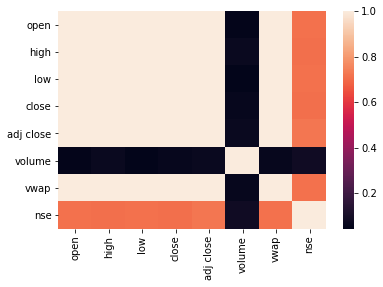

In [ ]:
sns.heatmap(temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr())

In [ ]:
abs(temp_stock1[['open', 'high', 'low', 'close', 'adj close', 'volume', 'vwap', 'nse']].corr()) > 0.7

open   high    low  close  adj close  volume   vwap    nse
open        True   True   True   True       True   False   True   True
high        True   True   True   True       True   False   True   True
low         True   True   True   True       True   False   True   True
close       True   True   True   True       True   False   True   True
adj close   True   True   True   True       True   False   True   True
volume     False  False  False  False      False    True  False  False
vwap        True   True   True   True       True   False   True   True
nse         True   True   True   True       True   False   True   True

##### There is very high multi-collinearity among the variables 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse'. So these are the candidates for PCA.

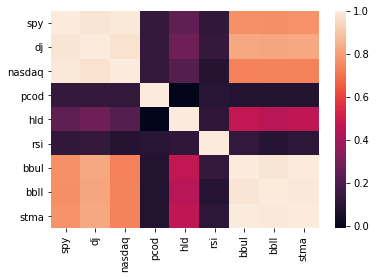

In [ ]:
sns.heatmap(temp_stock1[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr())

In [ ]:
abs(temp_stock1[['spy', 'dj', 'nasdaq', 'pcod', 'hld', 'rsi', 'bbul', 'bbll', 'stma']].corr()) > 0.7

spy     dj  nasdaq   pcod    hld    rsi   bbul   bbll   stma
spy      True   True    True  False  False  False   True   True   True
dj       True   True    True  False  False  False   True   True   True
nasdaq   True   True    True  False  False  False   True   True   True
pcod    False  False   False   True  False  False  False  False  False
hld     False  False   False  False   True  False  False  False  False
rsi     False  False   False  False  False   True  False  False  False
bbul     True   True    True  False  False  False   True   True   True
bbll     True   True    True  False  False  False   True   True   True
stma     True   True    True  False  False  False   True   True   True

##### There is very high multi-collinearity among the variables 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma'.  So these are the candidates for PCA.

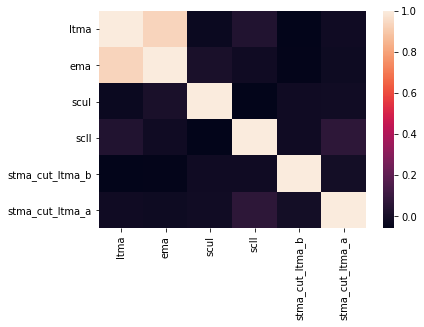

In [ ]:
sns.heatmap(temp_stock1[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr())

In [ ]:
abs(temp_stock1[['ltma', 'ema', 'scul', 'scll', 'stma_cut_ltma_b', 'stma_cut_ltma_a']].corr()) > 0.7

ltma    ema   scul   scll  stma_cut_ltma_b  stma_cut_ltma_a
ltma              True   True  False  False            False            False
ema               True   True  False  False            False            False
scul             False  False   True  False            False            False
scll             False  False  False   True            False            False
stma_cut_ltma_b  False  False  False  False             True            False
stma_cut_ltma_a  False  False  False  False            False             True

##### There is very high multi-collinearity among the variables 'ltma', 'ema'.  So these are the candidates for PCA.

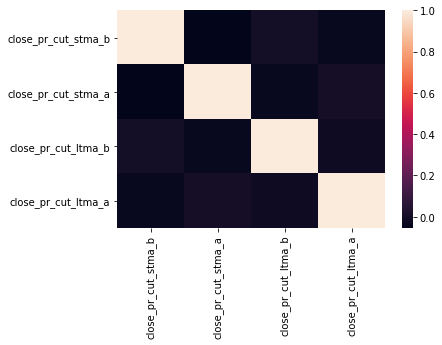

In [ ]:
sns.heatmap(temp_stock1[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr())

In [ ]:
abs(temp_stock1[['close_pr_cut_stma_b', 'close_pr_cut_stma_a', 'close_pr_cut_ltma_b', 'close_pr_cut_ltma_a']].corr()) > 0.7

close_pr_cut_stma_b  close_pr_cut_stma_a  \
close_pr_cut_stma_b                 True                False   
close_pr_cut_stma_a                False                 True   
close_pr_cut_ltma_b                False                False   
close_pr_cut_ltma_a                False                False   

                     close_pr_cut_ltma_b  close_pr_cut_ltma_a  
close_pr_cut_stma_b                False                False  
close_pr_cut_stma_a                False                False  
close_pr_cut_ltma_b                 True                False  
close_pr_cut_ltma_a                False                 True

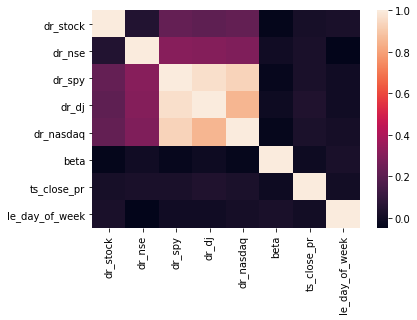

In [ ]:
sns.heatmap(temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr())

In [ ]:
abs(temp_stock1[['dr_stock', 'dr_nse', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'beta', 'ts_close_pr', 'le_day_of_week']].corr()) > 0.7

dr_stock  dr_nse  dr_spy  dr_dj  dr_nasdaq   beta  \
dr_stock            True   False   False  False      False  False   
dr_nse             False    True   False  False      False  False   
dr_spy             False   False    True   True       True  False   
dr_dj              False   False    True   True       True  False   
dr_nasdaq          False   False    True   True       True  False   
beta               False   False   False  False      False   True   
ts_close_pr        False   False   False  False      False  False   
le_day_of_week     False   False   False  False      False  False   

                ts_close_pr  le_day_of_week  
dr_stock              False           False  
dr_nse                False           False  
dr_spy                False           False  
dr_dj                 False           False  
dr_nasdaq             False           False  
beta                  False           False  
ts_close_pr            True           False  
le_day_of_week        False            True

##### There is very high multi-collinearity among the variables 'dr_spy', 'dr_dj', 'dr_nasdaq'.  So these are the candidates for PCA.

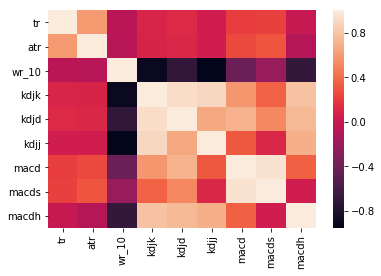

In [ ]:
sns.heatmap(temp_stock1[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr())

In [ ]:
abs(temp_stock1[['tr', 'atr', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']].corr()) > 0.7

tr    atr  wr_10   kdjk   kdjd   kdjj   macd  macds  macdh
tr      True  False  False  False  False  False  False  False  False
atr    False   True  False  False  False  False  False  False  False
wr_10  False  False   True   True  False   True  False  False  False
kdjk   False  False   True   True   True   True  False  False   True
kdjd   False  False  False   True   True  False   True  False   True
kdjj   False  False   True   True  False   True  False  False   True
macd   False  False  False  False   True  False   True   True  False
macds  False  False  False  False  False  False   True   True  False
macdh  False  False  False   True   True   True  False  False   True

##### There is very high multi-collinearity among the variables 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'. So these are the candidates for PCA.

### Data preparation for PCA
Variables for PCA: 'open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse', 'spy', 'dj', 'nasdaq', 'bbul', 'bbll', 'stma',
'ltma', 'ema', 'dr_spy', 'dr_dj', 'dr_nasdaq', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh'

In [ ]:
y = temp_stock1['price_movmnt']
X = temp_stock1.drop(['price_movmnt'], axis=1)

In [ ]:
vars_pca = ['open', 'high', 'low', 'close', 'adj close', 'vwap', 'nse', 'spy', 'dj',         
         'nasdaq', 'bbul', 'bbll', 'stma', 'ltma', 'ema', 'dr_spy', 'dr_dj', 
         'dr_nasdaq', 'wr_10', 'kdjk', 'kdjd', 'kdjj', 'macd', 'macds', 'macdh']

In [ ]:
pca_X = temp_stock1[vars_pca]
print('pca_X.shape', pca_X.shape)
pca_X.head()


pca_X.shape (1113, 25)


open        high        low       close  adj close    vwap  \
date                                                                          
2013-06-25  95.599998   98.150002  94.750000   97.050003  92.901176   96.74   
2013-06-26  97.099998   97.800003  94.099998   94.699997  90.651627   95.35   
2013-06-27  96.900002   97.000000  94.800003   95.800003  91.704605   95.83   
2013-06-28  97.099998  100.650002  96.599998   99.800003  95.533607   99.08   
2013-07-01  99.000000  102.900002  98.150002  101.900002  97.543831  100.98   

                    nse          spy            dj       nasdaq    ...     \
date                                                               ...      
2013-06-25  5590.250000  1573.089966  14659.559570  3320.760010    ...      
2013-06-26  5609.100098  1588.030029  14760.309570  3347.889893    ...      
2013-06-27  5588.700195  1603.260010  14910.139648  3376.219971    ...      
2013-06-28  5682.350098  1613.199951  15024.490234  3401.860107    ...      
2013-07-01  5842.200195  1606.280029  14909.599609  3403.250000    ...      

              dr_spy     dr_dj  dr_nasdaq      wr_10       kdjk       kdjd  \
date                                                                         
2013-06-25 -0.012145 -0.009449  -0.010869  57.986096  40.606569  46.612194   
2013-06-26  0.009497  0.006873   0.008170  74.305580  35.375128  42.866505   
2013-06-27  0.009590  0.010151   0.008462  67.368414  34.460614  40.064541   
2013-06-28  0.006200  0.007669   0.007594  39.298239  43.207663  41.112249   
2013-07-01 -0.004290 -0.007647   0.000409  24.561404  53.951308  45.391935   

                 kdjj      macd     macds     macdh  
date                                                 
2013-06-25  28.595321 -1.777242 -1.161831 -1.230822  
2013-06-26  20.392374 -1.961514 -1.321768 -1.279492  
2013-06-27  23.252759 -1.995789 -1.456572 -1.078434  
2013-06-28  47.398492 -1.680831 -1.501424 -0.358815  
2013-07-01  71.070053 -1.247404 -1.450620  0.406432  

[5 rows x 25 columns]

In [ ]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

pca_X_std = StandardScaler().fit_transform(pca_X)
print(pca_X_std.shape)
pca_X_std


(1113, 25)


array([[-0.99255376, -0.98014791, -0.96983346, ..., -0.74546168,
        -0.61120229, -0.55509528],
       [-0.96245815, -0.98709202, -0.98304901, ..., -0.79593914,
        -0.6578925 , -0.57661567],
       [-0.96647082, -1.00296437, -0.96881682, ..., -0.80532811,
        -0.69724586, -0.48771475],
       ...,
       [ 2.44637055,  2.60401396,  2.53227692, ...,  1.02421189,
        -0.11065786,  3.64168902],
       [ 2.64199197,  2.56334144,  2.60750392, ...,  1.24846723,
         0.17829243,  3.49035081],
       [ 2.56675296,  2.58615775,  2.59327158, ...,  1.35454656,
         0.43206265,  3.06407281]])

In [ ]:
other_X = X.drop(pca_X.columns.tolist(), axis=1)
print('other_X.shape', other_X.shape)
other_X.head()


other_X.shape (1113, 19)


volume      pcod       hld        rsi  scul  scll  \
date                                                             
2013-06-25  7980824  1.500000  3.400002  37.500000     0     0   
2013-06-26  4472739  0.049995  3.700005  35.760366     0     0   
2013-06-27  6247947  2.200005  2.199997  39.385214     0     0   
2013-06-28  6716298  1.299995  4.050004  47.480622     0     0   
2013-07-01  5796204 -0.800003  4.750000  50.474383     0     0   

            stma_cut_ltma_b  stma_cut_ltma_a  close_pr_cut_stma_b  \
date                                                                
2013-06-25                0                0                    0   
2013-06-26                0                0                    0   
2013-06-27                0                0                    0   
2013-06-28                0                0                    1   
2013-07-01                0                0                    0   

            close_pr_cut_stma_a  close_pr_cut_ltma_b  close_pr_cut_ltma_a  \
date                                                                        
2013-06-25                    0                    0                    0   
2013-06-26                    0                    0                    0   
2013-06-27                    0                    0                    0   
2013-06-28                    0                    0                    0   
2013-07-01                    0                    0                    0   

            dr_stock    dr_nse  beta  ts_close_pr  le_day_of_week        tr  \
date                                                                          
2013-06-25  0.031350 -0.013656 -2.30    98.471551               3  4.050004   
2013-06-26 -0.024214  0.003372 -7.18    98.712156               4  3.700005   
2013-06-27  0.011616 -0.003637 -3.19    98.916141               2  2.300003   
2013-06-28  0.041754  0.016757  2.49    98.783949               0  4.849999   
2013-07-01  0.021042  0.028131  0.75    99.001775               1  4.750000   

                 atr  
date                  
2013-06-25  4.759410  
2013-06-26  4.683728  
2013-06-27  4.513442  
2013-06-28  4.537485  
2013-07-01  4.552666

In [ ]:
# Standardise the data of independent variables and then create PCA dimensions on this distribution

other_X_std = StandardScaler().fit_transform(other_X)
print(other_X_std.shape)
other_X_std


(1113, 19)


array([[-0.31594104,  0.89702087, -0.65056462, ...,  0.68833569,
        -0.45677283, -0.33997418],
       [-1.03543032, -0.15015061, -0.53581236, ...,  1.39508627,
        -0.58427982, -0.39015228],
       [-0.67134475,  1.40255379, -1.10957101, ..., -0.01841488,
        -1.09430994, -0.50305505],
       ...,
       [ 2.75178437,  0.71647468,  2.56246133, ..., -0.01841488,
         2.82198176,  1.54661093],
       [-0.92569938,  0.89702087,  0.3630649 , ..., -1.43191604,
         0.27183477,  1.47297456],
       [-1.00637416, -0.58344917,  1.07069909, ..., -0.72516546,
         0.94580437,  1.49221123]])

### Feature Extraction for PCA

In [ ]:
# Transpose the 'pca_X_std' and then calculate covariance matrix

cov_matrix = np.cov(pca_X_std.T)
print(cov_matrix.shape)

print('\nCovariance Matrix for independent variables \n\n%s', cov_matrix)


(25, 25)

Covariance Matrix for independent variables 

%s [[ 1.00089928  0.99987324  0.99976251  0.99860115  0.99820413  0.99964685
   0.71559091  0.77176354  0.82706599  0.73667764  0.98820992  0.9803777
   0.98854962  0.90691831  0.99249134  0.02644114  0.04764784  0.02920819
  -0.12512813  0.17294426  0.198676    0.11061748  0.37799674  0.40050162
   0.0070696 ]
 [ 0.99987324  1.00089928  0.99981882  1.00008875  0.99951407  1.00059313
   0.71142363  0.76803966  0.82359449  0.73254657  0.98778322  0.97935037
   0.98783254  0.90530653  0.99187986  0.0281726   0.04888682  0.03122132
  -0.14194755  0.18112296  0.20245273  0.12234781  0.3808206   0.40127324
   0.0138485 ]
 [ 0.99976251  0.99981882  1.00089928  1.00001744  0.99970199  1.00047998
   0.71612316  0.77426764  0.82958804  0.73943293  0.98716973  0.97964654
   0.98765361  0.90635823  0.99171359  0.0307473   0.05141288  0.0332621
  -0.14315661  0.18084665  0.20095891  0.12353179  0.3787166   0.39886795
   0.01434237]
 [ 0.99860

In [ ]:
# Decompose the covariance matrix into eigen-values and eigen-vectors

eig_vals, eig_vecs = np.linalg.eig(cov_matrix)


In [ ]:
# Eigen-value is the magnitude(measure of signal) of each vector(independent variable)
# Here magnitude(measure of signal) refers to the variance captured by each dimension(independent variable) in mathematical space

print(eig_vals.shape)
eig_vals


(25,)


array([ 1.37587601e+01,  4.71659360e+00,  2.81417666e+00,  1.66188856e+00,
        1.09473175e+00,  4.39356213e-01,  1.59114998e-01,  1.45615101e-01,
        1.03778456e-01,  4.91368529e-02,  2.90152185e-02,  1.66473568e-02,
        1.55723032e-02,  9.96532873e-03,  3.81494176e-03,  1.57184091e-03,
        1.29255363e-03,  9.33224847e-04,  2.97490006e-04,  1.15107323e-04,
        5.60265548e-05,  4.83685104e-05,  1.87828513e-13,  4.61589320e-17,
       -3.23405750e-16])

In [ ]:
# eigenvectors of the covariance matrix represent the principal components(the directions of maximum variance)
# Eigen-vector consists of cosine values of each independent variable on every other dimension

print(eig_vecs.shape)
eig_vecs


(25, 25)


array([[ 2.66317540e-01,  3.85422880e-03,  1.01414198e-02,
        -5.99956572e-02,  1.20593333e-01, -4.43892022e-02,
         1.89817626e-02, -3.64242544e-03,  7.36786407e-03,
         1.23857466e-01,  6.20132591e-02,  3.49017723e-03,
         1.31152339e-02,  1.72916095e-02, -3.32602324e-02,
        -6.25350688e-01,  4.78199703e-01,  1.08313775e-01,
        -4.77856789e-01, -6.16189343e-02, -1.33609751e-01,
        -7.85820637e-02,  4.84836342e-08,  5.30657841e-11,
        -8.83867351e-12],
       [ 2.66197960e-01,  8.46726028e-03,  9.92397823e-03,
        -5.77961760e-02,  1.28360570e-01, -2.95305301e-02,
         4.32566142e-02,  5.88690491e-05,  2.08830442e-02,
         5.35150831e-02,  1.00918751e-01,  7.53136390e-04,
         1.86853876e-02,  2.71763466e-03,  2.98442367e-03,
        -7.37963441e-02, -8.32836155e-03,  7.39361003e-01,
         3.29605351e-01, -9.46846668e-04,  3.06811430e-01,
         3.70963727e-01, -1.22687624e-06, -1.35478888e-09,
         2.29873037e-10],
    

In [ ]:
print("Eigen Values:")
pd.DataFrame(eig_vals).T

Eigen Values:


0         1         2         3         4         5         6   \
0  13.75876  4.716594  2.814177  1.661889  1.094732  0.439356  0.159115   

         7         8         9       ...             15        16        17  \
0  0.145615  0.103778  0.049137      ...       0.001572  0.001293  0.000933   

         18        19        20        21            22            23  \
0  0.000297  0.000115  0.000056  0.000048  1.878285e-13  4.615893e-17   

             24  
0 -3.234058e-16  

[1 rows x 25 columns]

In [ ]:
tot = sum(eig_vals)
var_exp = [( i /tot ) * 100 for i in sorted(eig_vals, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print('\nCumulative Variance Explained\n\n', cum_var_exp)


Cumulative Variance Explained

 [ 54.98559276  73.83501625  85.08160906  91.72319063  96.0981833
  97.85402916  98.48991731  99.07185439  99.48659524  99.68296606
  99.79892266  99.86545225  99.9276855   99.967511    99.98275706
  99.98903877  99.99420434  99.99793389  99.99912278  99.99958279
  99.9998067  100.         100.         100.         100.        ]


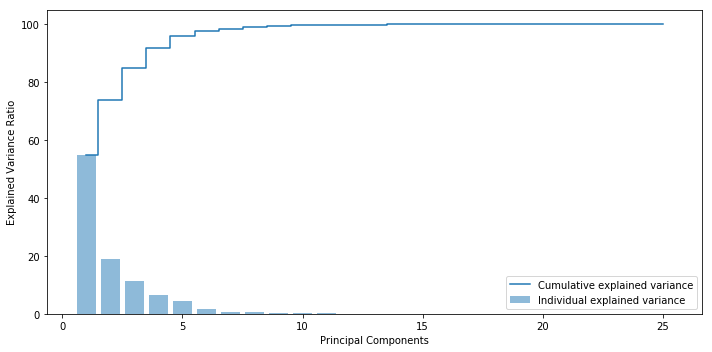

In [ ]:
# Ploting 
plt.figure(figsize=(10 , 5))
plt.bar(range(1, eig_vals.size + 1), var_exp, alpha = 0.5, align = 'center', label = 'Individual explained variance')
plt.step(range(1, eig_vals.size + 1), cum_var_exp, where='mid', label = 'Cumulative explained variance')
plt.ylabel('Explained Variance Ratio')
plt.xlabel('Principal Components')
plt.legend(loc = 'best')
plt.tight_layout()
plt.show()


### Observation:
Here the first 5 principal components capture 94.23% of the explained cumulative variance among all the independent variables. Choosing 5 PCs will help to maximize the signal of the data, while preserving the low-dimensionality.

After 5 PCs the the difference between consecutive cumulative variances are getting converged, so k=5 would be preferable.

#### Select k eigenvectors that correspond to the k largest eigenvalues, where k is the dimensionality of the new feature subspace( k≤d )

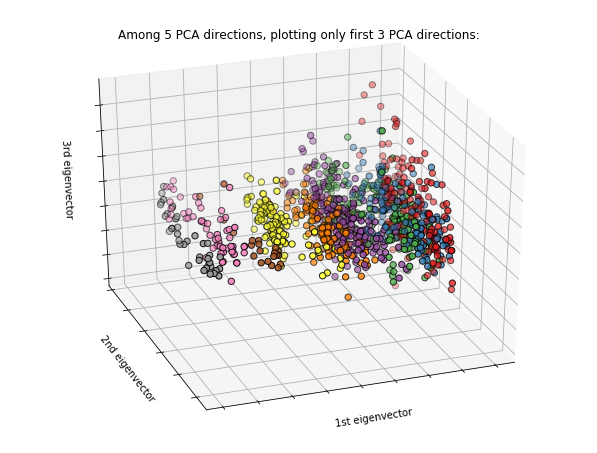

In [ ]:
# Here k = 5 from the above observation

from mpl_toolkits.mplot3d import Axes3D
from sklearn.decomposition import PCA

fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=110)

# Build PCA on the entire dataset(all IVs)
X_reduced = PCA(n_components=5).fit_transform(pca_X_std)

# Plotting only first 3 PCA dimensions  
ax.scatter(X_reduced[:, 0], X_reduced[:, 1], X_reduced[:, 2], c=pca_X.iloc[:,0].values,
           cmap=plt.cm.Set1, edgecolor='k', s=40)

ax.set_title("Among 5 PCA directions, plotting only first 3 PCA directions:")

ax.set_xlabel("1st eigenvector")
ax.w_xaxis.set_ticklabels([])

ax.set_ylabel("2nd eigenvector")
ax.w_yaxis.set_ticklabels([])

ax.set_zlabel("3rd eigenvector")
ax.w_zaxis.set_ticklabels([])

plt.show()

### Construct a projection matrix W from the "top" k eigenvectors.

In [ ]:
#Sort the eigen-pairs by descending order of the eigen-values

eigen_pairs = [(np.abs(eig_vals[i]), eig_vecs[:,i]) for i in range(len(eig_vals))]
eigen_pairs.sort(reverse=True)
eigen_pairs

[(13.758760058960483,
  array([ 0.26631754,  0.26619796,  0.26657086,  0.26633505,  0.26726618,
          0.26643395,  0.21631003,  0.23134336,  0.24222662,  0.22328943,
          0.26335525,  0.26140266,  0.2635105 ,  0.24550673,  0.26455843,
          0.00975389,  0.01586624,  0.010108  , -0.03658893,  0.04613424,
          0.05092665,  0.03190439,  0.0974326 ,  0.10264371,  0.0036088 ])),
 (4.716593602497414,
  array([ 0.00385423,  0.00846726,  0.00817635,  0.01166668,  0.0104102 ,
          0.00939773, -0.06628595, -0.04998916, -0.04487592, -0.06055118,
         -0.04890088, -0.06880466, -0.05866811, -0.10435879, -0.04697997,
          0.09701329,  0.09848546,  0.08741838, -0.40566455,  0.44074376,
          0.41032051,  0.39294544,  0.28994642,  0.18736688,  0.36845559])),
 (2.8141766622085096,
  array([ 0.01014142,  0.00992398,  0.00807693,  0.00765604,  0.00721642,
          0.00862672, -0.00742011, -0.02440156, -0.0235032 , -0.02361387,
          0.00294696, -0.00455888, -0.000

In [ ]:
#Collect five eigen-vectors that correspond to the five largest values to capture about 94.23% of the variance 

W = np.hstack((eigen_pairs[0][1][:, np.newaxis],
               eigen_pairs[1][1][:, np.newaxis],
               eigen_pairs[2][1][:, np.newaxis],
               eigen_pairs[3][1][:, np.newaxis],
               eigen_pairs[4][1][:, np.newaxis]))

# W is 25*5 dimensional projection matrix from the top five eigen-vectors
print('Shape of W = ', W.shape)
print('\nProjection matrix W:\n\n', W)


Shape of W =  (25, 5)

Projection matrix W:

 [[ 0.26631754  0.00385423  0.01014142 -0.05999566  0.12059333]
 [ 0.26619796  0.00846726  0.00992398 -0.05779618  0.12836057]
 [ 0.26657086  0.00817635  0.00807693 -0.05314818  0.12141566]
 [ 0.26633505  0.01166668  0.00765604 -0.05130638  0.12887792]
 [ 0.26726618  0.0104102   0.00721642 -0.0436127   0.10653598]
 [ 0.26643395  0.00939773  0.00862672 -0.05395961  0.12624759]
 [ 0.21631003 -0.06628595 -0.00742011  0.23929451 -0.39251991]
 [ 0.23134336 -0.04998916 -0.02440156  0.19548124 -0.4061211 ]
 [ 0.24222662 -0.04487592 -0.0235032   0.16252272 -0.31247274]
 [ 0.22328943 -0.06055118 -0.02361387  0.22436608 -0.42516445]
 [ 0.26335525 -0.04890088  0.00294696 -0.04929086  0.14616153]
 [ 0.26140266 -0.06880466 -0.00455888 -0.05054295  0.14911947]
 [ 0.2635105  -0.05866811 -0.00064751 -0.05009718  0.14818974]
 [ 0.24550673 -0.10435879 -0.02628548  0.1523483   0.18859872]
 [ 0.26455843 -0.04697997  0.00211517 -0.04316363  0.14668718]
 [ 0.0097

In [ ]:
"""Using the projection matrix W transform the entire (1707, 25) dimensional dataset(pca_X_std) onto 
the five principal components by calculating the matrix dot product"""

pca_X_trnsfrmd = pca_X_std.dot(W)
print(pca_X_trnsfrmd.shape)
pca_X_trnsfrmd


(1113, 5)


array([[-4.72728146, -1.08127219,  2.34431028, -0.71053358,  1.92612726],
       [-4.70940601, -0.92273083, -1.84695254, -1.33420691,  1.63562032],
       [-4.66904336, -0.80102161, -2.14884304, -1.21169092,  1.62678527],
       ...,
       [ 9.67095627,  2.94705107,  0.41515145,  2.43631757, -0.03747409],
       [ 9.80052077,  2.93442151,  0.20383478,  2.01447654, -0.2091737 ],
       [ 9.78589201,  2.3995575 ,  0.62855234,  1.58035569, -0.37372053]])

### Data preparation for model building

In [ ]:
# Combining all the independent variables (PCA variables and other variables) for model building
X = np.hstack((pca_X_trnsfrmd, other_X_std))
print('X.shape', X.shape)
X

X.shape (1113, 24)


array([[-4.72728146, -1.08127219,  2.34431028, ...,  0.68833569,
        -0.45677283, -0.33997418],
       [-4.70940601, -0.92273083, -1.84695254, ...,  1.39508627,
        -0.58427982, -0.39015228],
       [-4.66904336, -0.80102161, -2.14884304, ..., -0.01841488,
        -1.09430994, -0.50305505],
       ...,
       [ 9.67095627,  2.94705107,  0.41515145, ..., -0.01841488,
         2.82198176,  1.54661093],
       [ 9.80052077,  2.93442151,  0.20383478, ..., -1.43191604,
         0.27183477,  1.47297456],
       [ 9.78589201,  2.3995575 ,  0.62855234, ..., -0.72516546,
         0.94580437,  1.49221123]])

### Model building

In [ ]:
# Import suite of algorithms

from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression, RidgeClassifier

from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis, QuadraticDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, BaggingClassifier, GradientBoostingClassifier
from sklearn.calibration import CalibratedClassifierCV
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import GridSearchCV

In [ ]:
# Create objects of required models

models = []
models.append(("LR", LogisticRegression()))
models.append(("GNB", GaussianNB()))
models.append(("KNN", KNeighborsClassifier()))
models.append(("DecisionTree", DecisionTreeClassifier()))
models.append(("AdaBoost", AdaBoostClassifier()))
models.append(("SVM Linear", SVC(kernel="linear")))
models.append(("SVM RBF", SVC(kernel="rbf")))
models.append(("Random Forest",  RandomForestClassifier()))
models.append(("Bagging", BaggingClassifier()))
models.append(("GradientBoosting", GradientBoostingClassifier()))
models.append(("LinearSVC", LinearSVC()))
models.append(("Ridge", RidgeClassifier()))
models.append(("MLP", MLPClassifier()))

#models

### Time-Series-Split 

### Models - with Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

num_splits = 10

tscv = TimeSeriesSplit(n_splits = num_splits)
print(tscv)  

k=1
grid_result = []
accuracies = []
    
for name, model in models:
    
    if name=='KNN':
        print('Model name: ', name)
        k_values = np.array([1,3,5,7,9,11,13,15,17,19,21,23,25,27,29])        
        param_grid = dict(n_neighbors=k_values)
        grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring="accuracy", cv=None)

        for train_index, test_index in tscv.split(X): 

            print("\n\n----------------------- Split-{} -----------------------".format(k))    
            print("\nTRAIN-set:", train_index, "\n\nTEST-set:", test_index)
            X_train, X_test = X[train_index], X[test_index]
            y_train, y_test = y[train_index], y[test_index]
            #print(model.get_params().keys())
            grid_result = grid.fit(X_train, y_train)           

            # print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
            print('\ngrid_result.best_score_', grid_result.best_score_)
            print('\ngrid_result.best_params_', grid_result.best_params_)
            means = grid_result.cv_results_['mean_test_score']
            stds = grid_result.cv_results_['std_test_score']
            params = grid_result.cv_results_['params']
            print('\n')
            for mean, stdev, param in zip(means, stds, params):
                print("%f (%f) with: %r" % (mean, stdev, param))
            
            print("\n\n*************** KNN accuracy ***************") 
            knn = KNeighborsClassifier(n_neighbors=int(grid_result.best_params_['n_neighbors']))
            knn.fit(X_train, y_train)
            knn_accuracy = round(knn.score(X_test, y_test),2)
            print("\nknn_accuracy for Split-{} = {}".format(k, knn_accuracy))
            accuracies.append(knn_accuracy)
                    
            k+=1
        print("\nAverage KNN accuracy for {} Time-Series-Split = {}".format(num_splits, round(sum(accuracies)/len(accuracies),2)))
       
            


TimeSeriesSplit(max_train_size=None, n_splits=10)
Model name:  KNN


----------------------- Split-1 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102] 

TEST-set: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203]

grid_result.best_sco


grid_result.best_score_ 0.7807881773399015

grid_result.best_params_ {'n_neighbors': 21}


0.733990 (0.027186) with: {'n_neighbors': 1}
0.756158 (0.016275) with: {'n_neighbors': 3}
0.768473 (0.035263) with: {'n_neighbors': 5}
0.775862 (0.018322) with: {'n_neighbors': 7}
0.768473 (0.024810) with: {'n_neighbors': 9}
0.766010 (0.024002) with: {'n_neighbors': 11}
0.753695 (0.035659) with: {'n_neighbors': 13}
0.748768 (0.017338) with: {'n_neighbors': 15}
0.766010 (0.019135) with: {'n_neighbors': 17}
0.766010 (0.013554) with: {'n_neighbors': 19}
0.780788 (0.033535) with: {'n_neighbors': 21}
0.778325 (0.021308) with: {'n_neighbors': 23}
0.766010 (0.017647) with: {'n_neighbors': 25}
0.773399 (0.016607) with: {'n_neighbors': 27}
0.780788 (0.017695) with: {'n_neighbors': 29}


*************** KNN accuracy ***************

knn_accuracy for Split-4 = 0.76


----------------------- Split-5 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17



grid_result.best_score_ 0.7968970380818053

grid_result.best_params_ {'n_neighbors': 29}


0.765867 (0.005638) with: {'n_neighbors': 1}
0.765867 (0.018605) with: {'n_neighbors': 3}
0.788434 (0.005787) with: {'n_neighbors': 5}
0.789845 (0.022377) with: {'n_neighbors': 7}
0.791255 (0.014343) with: {'n_neighbors': 9}
0.794076 (0.015941) with: {'n_neighbors': 11}
0.795487 (0.009780) with: {'n_neighbors': 13}
0.795487 (0.013979) with: {'n_neighbors': 15}
0.782793 (0.012185) with: {'n_neighbors': 17}
0.787024 (0.009772) with: {'n_neighbors': 19}
0.778561 (0.001552) with: {'n_neighbors': 21}
0.787024 (0.004875) with: {'n_neighbors': 23}
0.788434 (0.024541) with: {'n_neighbors': 25}
0.792666 (0.027810) with: {'n_neighbors': 27}
0.796897 (0.024568) with: {'n_neighbors': 29}


*************** KNN accuracy ***************

knn_accuracy for Split-7 = 0.7


----------------------- Split-8 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
 


grid_result.best_score_ 0.7947310647639956

grid_result.best_params_ {'n_neighbors': 9}


0.720088 (0.017222) with: {'n_neighbors': 1}
0.743139 (0.018815) with: {'n_neighbors': 3}
0.762898 (0.016538) with: {'n_neighbors': 5}
0.783754 (0.010606) with: {'n_neighbors': 7}
0.794731 (0.002788) with: {'n_neighbors': 9}
0.793633 (0.001735) with: {'n_neighbors': 11}
0.787047 (0.014618) with: {'n_neighbors': 13}
0.792536 (0.007791) with: {'n_neighbors': 15}
0.785950 (0.013804) with: {'n_neighbors': 17}
0.771679 (0.024833) with: {'n_neighbors': 19}
0.771679 (0.023401) with: {'n_neighbors': 21}
0.769484 (0.021746) with: {'n_neighbors': 23}
0.770582 (0.013251) with: {'n_neighbors': 25}
0.776070 (0.020841) with: {'n_neighbors': 27}
0.776070 (0.024699) with: {'n_neighbors': 29}


*************** KNN accuracy ***************

knn_accuracy for Split-9 = 0.63


----------------------- Split-10 -----------------------

TRAIN-set: [   0    1    2 ... 1009 1010 1011] 

TEST-set: [1012 1013 1014 1015 1016

### Models - without Hyper-parameter tuning

In [ ]:
from sklearn.model_selection import TimeSeriesSplit

tscv = TimeSeriesSplit(n_splits=10)
print(tscv)  
TimeSeriesSplit(max_train_size=None, n_splits=3)

k=1
for train_index, test_index in tscv.split(X): 
    
    print("\n\n----------------------- Split-{} -----------------------".format(k))   
    print("\nTRAIN-set:", train_index, "\n\nTEST-set:", test_index)
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    
    print("\n\n\n*************** {}-fold validation ***************\n".format(k))
    # Find accuracy of models
    results = []
    for name, model in models:
        cv_result = cross_val_score(model, X_train, y_train, scoring = "accuracy")
        results.append(tuple([name, cv_result.mean(), cv_result.std()]))
        
    results.sort(key=lambda x: x[1], reverse = True)    
    for i in range(len(results)):
        print('{:20s} {:2.2f} (+/-) {:2.2f} '.format(results[i][0] , results[i][1] * 100, results[i][2] * 100))
        
    k+=1
    
    


TimeSeriesSplit(max_train_size=None, n_splits=10)


----------------------- Split-1 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102] 

TEST-set: [103 104 105 106 107 108 109 110 111 112 113 114 115 116 117 118 119 120
 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137 138
 139 140 141 142 143 144 145 146 147 148 149 150 151 152 153 154 155 156
 157 158 159 160 161 162 163 164 165 166 167 168 169 170 171 172 173 174
 175 176 177 178 179 180 181 182 183 184 185 186 187 188 189 190 191 192
 193 194 195 196 197 198 199 200 201 202 203]



*************** 1-fold validation *

DecisionTree         100.00 (+/-) 0.00 
AdaBoost             100.00 (+/-) 0.00 
Bagging              100.00 (+/-) 0.00 
GradientBoosting     100.00 (+/-) 0.00 
Random Forest        97.63 (+/-) 2.21 
LR                   95.86 (+/-) 0.98 
LinearSVC            95.65 (+/-) 2.98 
SVM Linear           94.07 (+/-) 3.19 
MLP                  93.29 (+/-) 1.12 
SVM RBF              88.36 (+/-) 1.25 
Ridge                87.74 (+/-) 6.94 
KNN                  76.91 (+/-) 2.80 
GNB                  67.27 (+/-) 5.72 


----------------------- Split-6 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 1

DecisionTree         100.00 (+/-) 0.00 
AdaBoost             100.00 (+/-) 0.00 
Bagging              100.00 (+/-) 0.00 
GradientBoosting     100.00 (+/-) 0.00 
Random Forest        99.75 (+/-) 0.17 
SVM Linear           98.14 (+/-) 1.33 
LinearSVC            98.02 (+/-) 0.47 
LR                   97.04 (+/-) 1.60 
Ridge                91.49 (+/-) 5.57 
MLP                  91.24 (+/-) 0.75 
SVM RBF              89.87 (+/-) 2.76 
GNB                  81.74 (+/-) 4.32 
KNN                  74.20 (+/-) 3.51 


----------------------- Split-9 -----------------------

TRAIN-set: [  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 1